In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
product = pd.read_csv('product.csv', on_bad_lines='skip')
click_stream = pd.read_csv('new_session_id.csv', on_bad_lines='skip')
customer = pd.read_csv('customer.csv')
transaction = pd.read_csv('transaction_new.csv')

In [46]:
# # session_id 확인용
# click_stream.session_id.nunique()
# click_stream.groupby('session_id').count()
# click_stream.session_id.str.countains('00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd')

In [4]:
#2020.08.01부터 2022.07.31까지의 데이터만 필터링
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
start_date = pd.to_datetime('2020-08-01', utc=True).tz_convert('UTC')
end_date = pd.to_datetime('2022-07-31', utc=True).tz_convert('UTC')
click_stream = click_stream[(click_stream['event_time'] >= start_date) & (click_stream['event_time'] <= end_date)]

#정렬변경
df = click_stream.sort_values(['session_id', 'event_time'])

### Product 기본 EDA

In [ ]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
product.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,44424.0,NaN,NaN,NaN,29696.334301,17049.490518,1163.0,14768.75,28618.5,44683.25,60000.0
gender,44424,5,Men,22147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
masterCategory,44424,7,Apparel,21397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subCategory,44424,45,Topwear,15402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
articleType,44424,143,Tshirts,7067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseColour,44409,46,Black,9728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,44403,4,Summer,21472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,44423.0,NaN,NaN,NaN,2012.806497,2.12648,2007.0,2011.0,2012.0,2015.0,2019.0
usage,44107,8,Casual,34406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productDisplayName,44417,31121,Lucera Women Silver Earrings,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
# basecolor 결측치는 display이름으로 채우기 가능
product[product['baseColour'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [ ]:
# 지우는게 낫지 않을까? display name조차 모르는걸,,,? 그런 경우 다른 컬럼에도 nan값임
product[product['productDisplayName'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [ ]:
transaction.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526


In [ ]:
product_rename = product.rename(columns={'id': 'product_id'})

In [ ]:
# product_id로 product와 transaction 합치기
merged_pro_trans = transaction.merge(product_rename, on='product_id', how='left')

In [ ]:
merged_pro_trans.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater


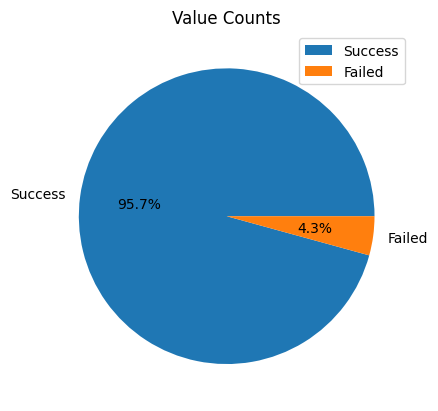

In [ ]:
# 결제 성공 여부
counts = merged_pro_trans['payment_status'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.ylabel('')

plt.show()

#### 거래 성공 기준

In [ ]:
# 거래에 성공한 것 기준
success_transaction = merged_pro_trans[merged_pro_trans['payment_status']=='Success']


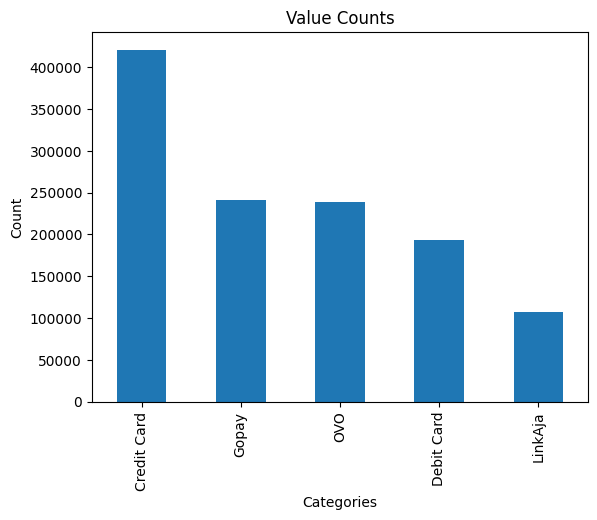

In [ ]:
# 거래 성공 > 결제수단
counts = success_transaction['payment_method'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

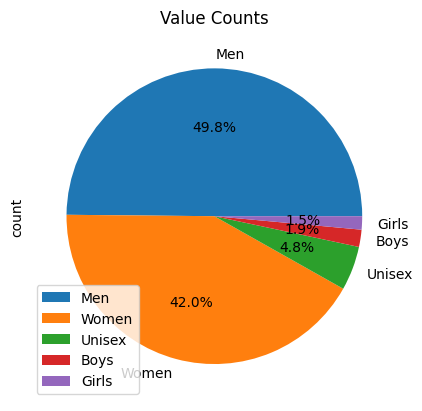

In [ ]:
counts = success_transaction['gender'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.show()

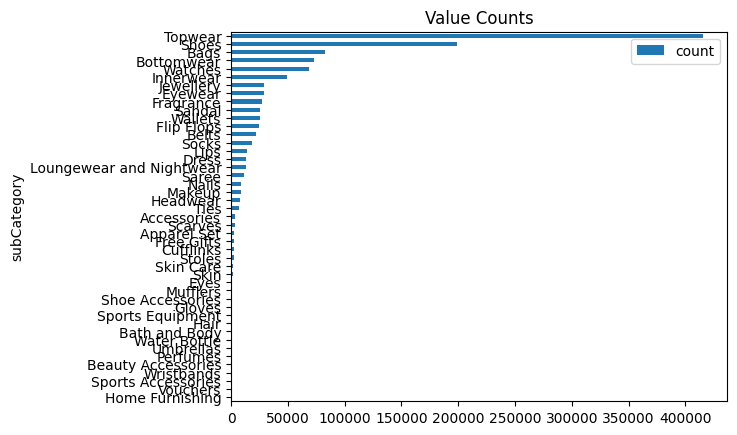

In [ ]:
counts = success_transaction['subCategory'].value_counts().sort_values(ascending=True)
counts.plot(kind='barh')

plt.title('Value Counts')
plt.legend()

plt.show()

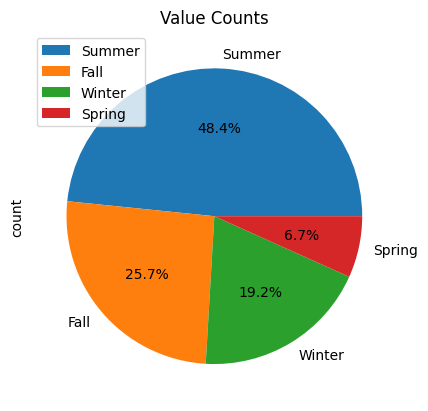

In [ ]:
counts = success_transaction['season'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()

plt.show()

#### 거래 실패 기준

In [ ]:
# 거래에 실패한 것 기준
failed_transaction = merged_pro_trans[merged_pro_trans['payment_status']=='Failed']

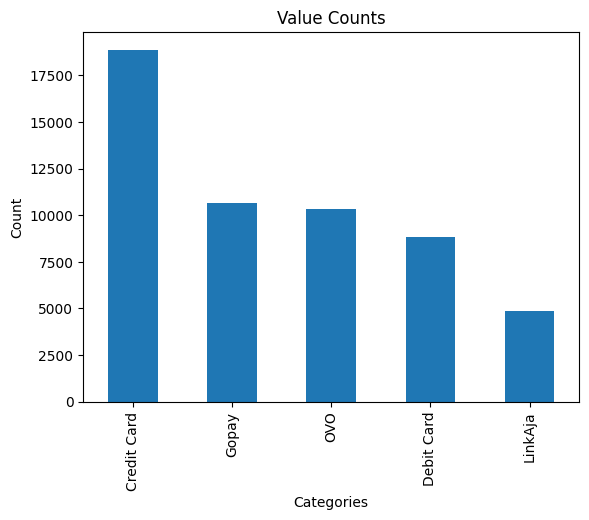

In [ ]:
# 거래 실패 > 결제수단
counts = failed_transaction['payment_method'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

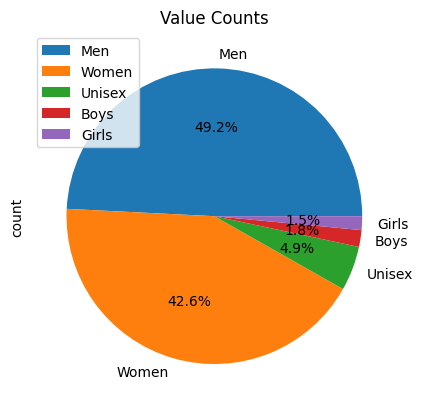

In [ ]:
counts = failed_transaction['gender'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.show()

In [ ]:
product_new=product.copy()

In [ ]:
# prodcut연도 비어있는 부분 0으로 일단 처리
product_new['year'] = product_new['year'].fillna(0).astype('int').replace({0: np.nan})

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
product['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.,   nan])

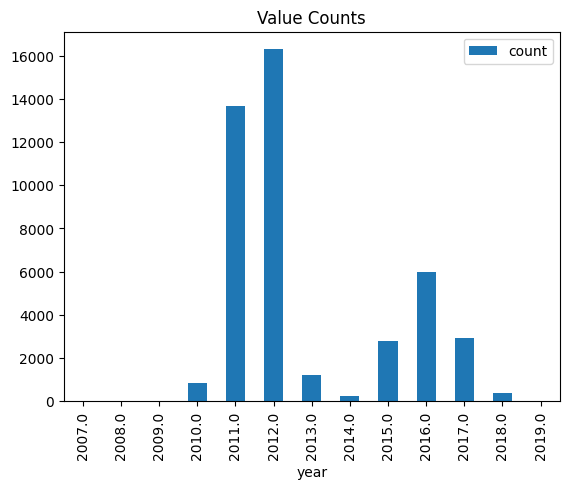

In [ ]:
# 'year' 열을 날짜형으로 변경
# product['year'] = pd.to_datetime(product['year'], format='%YYYY')

# 'year' 열을 기준으로 값 세기 및 정렬
counts = product['year'].value_counts().sort_index()

counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

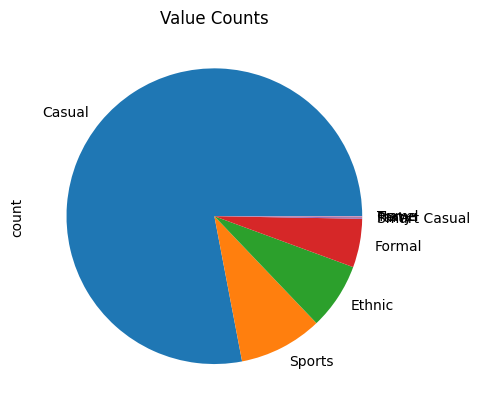

In [ ]:
# 상품의 용도에 따른 상품 개수
counts = product['usage'].value_counts()
counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

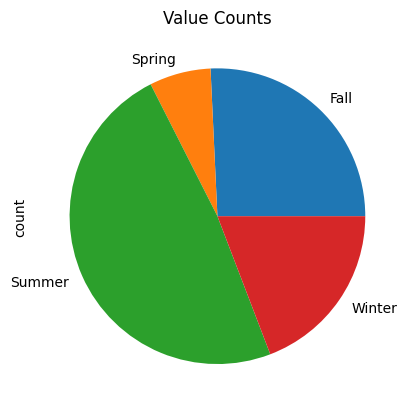

In [ ]:
# 계절에 따른 상품 개수
counts = product['season'].value_counts().sort_index()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

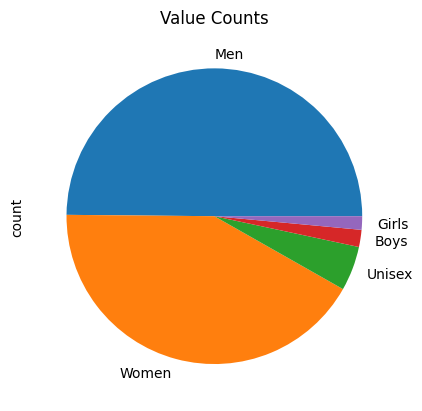

In [ ]:
# 성별에 따른 상품 개수
counts = product['gender'].value_counts()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

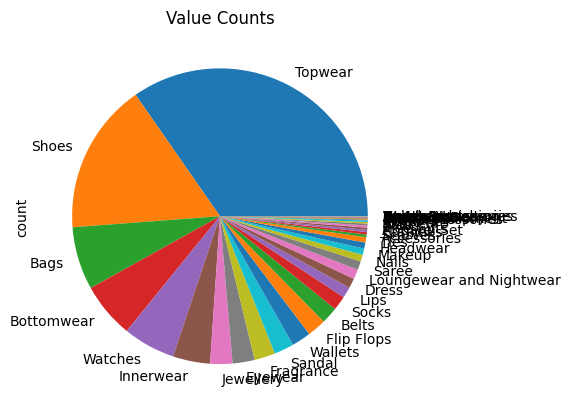

In [ ]:
# 세부 카테고리별 상품 개수
counts = product['subCategory'].value_counts()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

In [ ]:
# 중복되는행 없음
product[product.duplicated()==True]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName


In [ ]:
# merged_pro_trans : product + transaction
merged_pro_trans['created_at']

0          2018-07-29T15:22:01.458193Z
1          2018-07-30T12:40:22.365620Z
2          2018-09-15T11:51:17.365620Z
3          2018-11-01T11:23:48.365620Z
4          2018-12-18T11:20:30.365620Z
                      ...             
1254580    2021-09-21T22:10:05.074873Z
1254581    2021-12-09T07:35:18.222046Z
1254582    2021-12-11T01:20:36.944593Z
1254583    2019-12-18T11:01:09.623382Z
1254584    2019-12-19T12:47:14.701215Z
Name: created_at, Length: 1254585, dtype: object

In [ ]:
# 날짜와 시간 분리 위함
merged_pro_trans['created_at'][0].split('T')

['2018-07-29', '15:22:01.458193Z']

In [ ]:
merged_pro_trans

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,135174,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,271012,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,198753,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,...,113410,Men,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,...,354213,Men,Apparel,Topwear,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,...,288835,Men,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Numero Uno Men White Casual Shoes
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,...,188646,Men,Apparel,Bottomwear,Trousers,Beige,Fall,2011.0,Casual,Scullers Men Rugged Chinos Beige Trousers


In [ ]:
# created_at 기준으로 날짜,시간 분리
merged_pro_trans['date_str'], merged_pro_trans['time_str'] = merged_pro_trans['created_at'].split('T')

length = len(merged_pro_trans)
merged_pro_trans['date_str'] = 0
merged_pro_trans['time_str'] = 0

for i in range (length) :
    date_time = merged_pro_trans['created_at'][i]
    merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2185411309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2185411309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')


In [ ]:
# 확인
merged_pro_trans['date_str'][3][:4]

'2018'

In [ ]:
# 연도만 분리
length = len(merged_pro_trans)
merged_pro_trans['date_year'] = 0

for i in range (length) :
    year = merged_pro_trans['date_str'][i][:4]
    merged_pro_trans['date_year'][i] = year
    #merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')
    #print(year)

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2964797028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_year'][i] = year


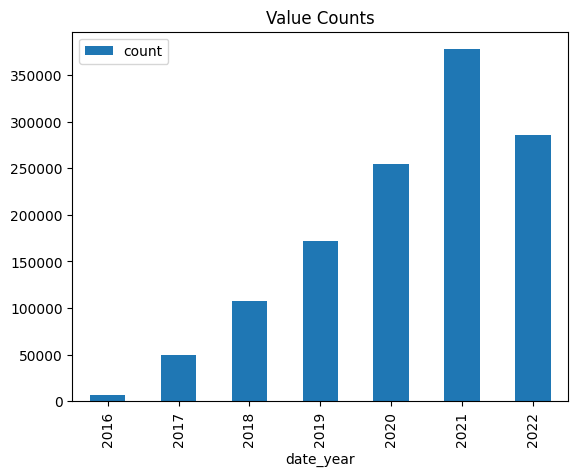

In [ ]:
# 연도별 
counts = merged_pro_trans['date_year'].value_counts().sort_index()
counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [ ]:
# 년도별 개수
merged_pro_trans.groupby('date_year').size()

date_year
2016      7039
2017     50171
2018    107789
2019    171472
2020    254983
2021    377427
2022    285704
dtype: int64

In [ ]:
merged_pro_trans[merged_pro_trans['date_year']=='2021']

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,subCategory,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year
31,2021-01-08T11:24:54.365620Z,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,2021-01-11T18:15:58.746308Z,...,Topwear,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,2021-01-08,11:24:54.365620Z,2021
32,2021-02-24T10:35:41.365620Z,4774,3e8d1505-80ad-4438-a82b-2a017e0c551e,57b6d108-9ec4-48ef-8d66-cdd17c4942ba,Gopay,Success,3855,BUYMORE,10000,2021-02-28T20:19:37.594671Z,...,Topwear,Kurtas,Green,Summer,2011.0,Ethnic,W Women Printed Green Kurtas,2021-02-24,10:35:41.365620Z,2021
33,2021-04-12T11:07:35.365620Z,4774,19748870-3690-4fc3-8713-ffb4bca16c94,e8665111-3196-4edf-9a30-d1f2a4945b41,Credit Card,Success,0,NaN,0,2021-04-14T11:49:09.838274Z,...,Shoes,Heels,Red,Winter,2015.0,Casual,Catwalk Women Red Flats,2021-04-12,11:07:35.365620Z,2021
34,2021-05-29T10:59:02.365620Z,4774,e4a15e0c-8848-49c4-8648-8e5e7bf8e9a0,a4ad7fb7-6a09-450b-aa8d-97e28c0cda20,Credit Card,Success,0,NaN,10000,2021-06-03T18:15:49.265999Z,...,Topwear,Tshirts,Black,Summer,2011.0,Sports,Nike Men's Challenger Logo Black T-shirt,2021-05-29,10:59:02.365620Z,2021
35,2021-07-15T11:06:17.365620Z,4774,57b61173-4837-449a-a5fb-22b0cd07d56d,b0ab036c-5c29-417b-9c2e-1a41d872028a,LinkAja,Success,6325,AZ2022,10000,2021-07-17T19:21:39.314719Z,...,Loungewear and Nightwear,Lounge Pants,Black,Summer,2011.0,Sports,Puma Women Black Essential Skinny Capris,2021-07-15,11:06:17.365620Z,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254570,2021-09-10T14:58:05.098790Z,37287,cecf50f2-ab2f-4523-971d-c701df7c28ff,f86dad5c-f2ad-45ff-ab16-2afba8fae58d,OVO,Success,5060,AZ2022,10000,2021-09-15T06:56:55.468310Z,...,Topwear,Tshirts,Blue,Summer,2012.0,Casual,Mark Taylor Men Printed Blue T-shirt,2021-09-10,14:58:05.098790Z,2021
1254571,2021-12-27T20:11:09.098790Z,37287,7a6ecaf3-316d-40b2-b366-8f670d669c30,8d9f019f-600c-439e-b302-0779540e0561,OVO,Success,2603,XX2022,25000,2022-01-01T20:00:54.420462Z,...,Topwear,Sweaters,Purple,Summer,2011.0,Casual,United Colors of Benetton Men Solid Purple Swe...,2021-12-27,20:11:09.098790Z,2021
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,...,Topwear,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,2021-09-21,22:10:05.074873Z,2021
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,...,Topwear,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,2021-12-09,07:35:18.222046Z,2021


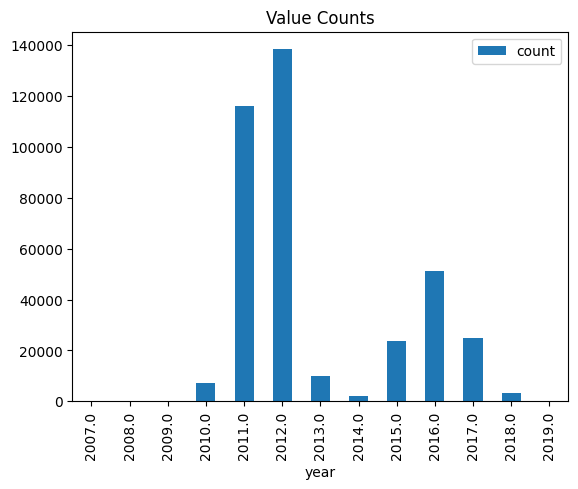

In [ ]:
sale_2021 = merged_pro_trans[merged_pro_trans['date_year']=='2021']
counts = sale_2021['year'].value_counts().sort_index()

counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [ ]:
merged_pro_trans.head(5).T

,0,1,2,3,4
created_at,2018-07-29T15:22:01.458193Z,2018-07-30T12:40:22.365620Z,2018-09-15T11:51:17.365620Z,2018-11-01T11:23:48.365620Z,2018-12-18T11:20:30.365620Z
customer_id,5868,4774,4774,4774,4774
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,caadb57b-e808-4f94-9e96-8a7d4c9898db,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,f5e530a7-4350-4cd1-a3bc-525b5037bcab,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2ee5ead1-f13e-4759-92df-7ff48475e970,93325fb6-eb00-4268-bb0e-6471795a0ad0,bcad5a61-1b67-448d-8ff4-781d67bc56e4,df1042ab-13e6-4072-b9d2-64a81974c51a
payment_method,Debit Card,Credit Card,OVO,Credit Card,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
promo_code,WEEKENDSERU,NaN,NaN,NaN,NaN
shipment_fee,10000,10000,10000,0,0
shipment_date_limit,2018-08-03T05:07:24.812676Z,2018-08-03T01:29:03.415705Z,2018-09-18T08:41:49.422380Z,2018-11-05T17:42:27.954235Z,2018-12-23T17:24:07.361785Z


In [ ]:
merged_pro_trans['date_str'][2][5:7]

'09'

In [ ]:
# 월만 분리
length = len(merged_pro_trans)
merged_pro_trans['date_month'] = 0

for i in range (length) :
    month = merged_pro_trans['date_str'][i][5:7]
    merged_pro_trans['date_month'][i] = month

C:\Users\user\AppData\Local\Temp\ipykernel_2944\263881431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_month'][i] = month


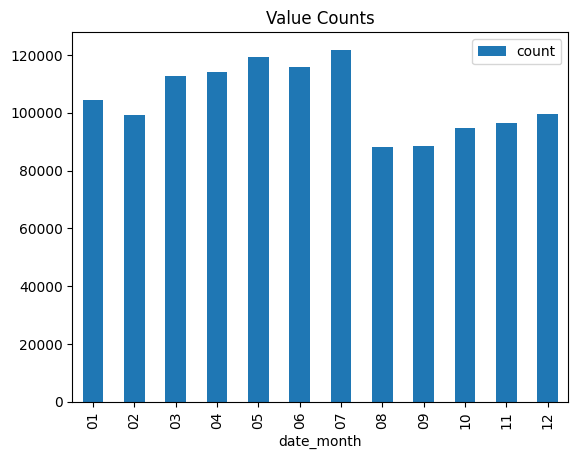

In [ ]:
# 주문 month
counts = merged_pro_trans['date_month'].value_counts().sort_index()
counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [ ]:
# 거래 성공, 실패 기준 df 나누기
success_merged_pro_trans = merged_pro_trans[merged_pro_trans['payment_status']=='Success']
failed_merged_pro_trans = merged_pro_trans[merged_pro_trans['payment_status']=='Failed']

In [ ]:
# 중복 개수
merged_pro_trans['customer_id'].duplicated().sum()

1203880

In [ ]:
# 상품을 조회한 사용자 수 (중복제거)
unique_customers = merged_pro_trans.drop_duplicates(subset='customer_id')
customer_check_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_check_counts

subCategory
Topwear                     17581
Shoes                        8284
Bags                         3494
Bottomwear                   3069
Watches                      2947
Innerwear                    2050
Jewellery                    1216
Eyewear                      1197
Fragrance                    1165
Sandal                       1113
Wallets                      1107
Flip Flops                   1050
Belts                         906
Socks                         779
Lips                          621
Dress                         564
Loungewear and Nightwear      531
Saree                         482
Nails                         377
Makeup                        340
Headwear                      322
Ties                          309
Accessories                   159
Scarves                       155
Free Gifts                    122
Cufflinks                     119
Apparel Set                   119
Stoles                        107
Skin Care                      84
Sk

In [ ]:
#pd.set_option('display.max_columns', None)

In [ ]:
# customer_id가 4774인 경우 겹치는 행이 많음을 확인 -> 팀회의
success_merged_pro_trans[success_merged_pro_trans['customer_id'] == 4774]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater,2018-07-30,12:40:22.365620Z,2018,07
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag,2018-09-15,11:51:17.365620Z,2018,09
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater,2018-11-01,11:23:48.365620Z,2018,11
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018-12-18,11:20:30.365620Z,2018,12
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,...,Sarees,Green,Summer,2012.0,Ethnic,FNF Green & Black Wedding Collection Sari,2019-02-03,11:25:55.365620Z,2019,02
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,...,Heels,Black,Winter,2015.0,Casual,Catwalk Women Black Heels,2019-03-22,11:53:02.365620Z,2019,03
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,...,Cufflinks,Steel,Fall,2011.0,Formal,Belmonte Men Bright Assorted Steel Cufflinks,2019-05-08,11:29:21.365620Z,2019,05
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,...,Shirts,Green,Fall,2011.0,Formal,Genesis Men Green & Purple Striped Shirt,2019-06-24,12:08:52.365620Z,2019,06
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sarees,Maroon,Fall,2012.0,Ethnic,FNF Maroon Printed Sari,2019-08-10,12:14:24.365620Z,2019,08
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Shirts,Burgundy,Summer,2012.0,Casual,Locomotive Men Burgundy Stripe Shirt,2019-08-10,12:14:24.365620Z,2019,08


In [ ]:
# 세션아이디 중복 개수
success_merged_pro_trans['session_id'].duplicated().sum()

385071

In [ ]:
success_merged_pro_trans[success_merged_pro_trans.session_id.duplicated()]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Shirts,Burgundy,Summer,2012.0,Casual,Locomotive Men Burgundy Stripe Shirt,2019-08-10,12:14:24.365620Z,2019,08
11,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sandals,Navy Blue,Summer,2011.0,Casual,Crocs Kids Navy Clogs,2019-08-10,12:14:24.365620Z,2019,08
12,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sports Shoes,Black,Summer,2012.0,Sports,Puma Men Kevler Runner Black Sports Shoes,2019-08-10,12:14:24.365620Z,2019,08
13,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Casual Shoes,Khaki,Summer,2012.0,Casual,Woodland Men Khaki Casual Shoes,2019-08-10,12:14:24.365620Z,2019,08
14,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Night suits,Grey Melange,Summer,2016.0,Casual,SDL by Sweet Dreams Men Grey & Blue Pyjama Set,2019-08-10,12:14:24.365620Z,2019,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254550,2019-10-14T11:54:11.214122Z,37956,59dd4a7b-b9b5-4205-974f-0640062dc827,e25c40d6-f68c-47fd-97b8-cc6f5ab2ccfa,OVO,Success,0,NaN,10000,2019-10-18T12:45:42.891527Z,...,Flip Flops,Black,Fall,2015.0,Casual,Gliders by Liberty Men Red & Black Econew Flip...,2019-10-14,11:54:11.214122Z,2019,10
1254559,2020-05-13T19:17:26.359304Z,64772,9003bf28-afba-4881-8edd-b05f2ce0d652,e46d55c9-032c-4bfc-b469-8caa3ff499d2,OVO,Success,3981,BUYMORE,0,2020-05-19T09:40:17.878411Z,...,Kurtas,Red,Summer,2012.0,Ethnic,Fabindia Men Printed Red Kurta,2020-05-13,19:17:26.359304Z,2020,05
1254561,2020-12-02T00:10:25.359304Z,64772,98206a95-8095-45ec-90fe-701df7b1b654,2b726afb-7a89-4dbc-94c5-342c77b5fd10,OVO,Success,0,NaN,10000,2020-12-07T15:49:19.440041Z,...,Tops,Olive,Summer,2011.0,Casual,United Colors of Benetton Women Solid Olive Top,2020-12-02,00:10:25.359304Z,2020,12
1254566,2016-11-22T13:02:52.112855Z,24508,bb64c193-bc69-4190-bc36-cb601651e506,54406cb9-261b-4ecd-af1b-b345cbc8172c,OVO,Success,10327,STARTUP,0,2016-11-26T13:02:57.693302Z,...,Tshirts,Blue,Summer,2011.0,Casual,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,2016-11-22,13:02:52.112855Z,2016,11


In [ ]:
# 상품을 구매한 사용자 수 (중복제거)
unique_customers = success_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts

subCategory
Topwear                     17460
Shoes                        8207
Bags                         3450
Bottomwear                   3048
Watches                      2924
Innerwear                    2028
Jewellery                    1205
Eyewear                      1175
Fragrance                    1154
Sandal                       1098
Wallets                      1093
Flip Flops                   1039
Belts                         892
Socks                         772
Lips                          613
Dress                         555
Loungewear and Nightwear      518
Saree                         484
Nails                         374
Makeup                        332
Headwear                      321
Ties                          316
Accessories                   161
Scarves                       149
Free Gifts                    120
Apparel Set                   117
Cufflinks                     117
Stoles                        108
Skin Care                      81
Sk

In [ ]:
# 상품별 구매 전환율
((customer_buy_counts / customer_check_counts) * 100).sort_values(ascending=False)

subCategory
Hair                        117.647059
Ties                        102.265372
Skin                        101.333333
Accessories                 101.257862
Stoles                      100.934579
Saree                       100.414938
Gloves                      100.000000
Water Bottle                100.000000
Vouchers                    100.000000
Umbrellas                   100.000000
Sports Equipment            100.000000
Sports Accessories          100.000000
Perfumes                    100.000000
Wristbands                  100.000000
Beauty Accessories          100.000000
Headwear                     99.689441
Bottomwear                   99.315738
Topwear                      99.311757
Watches                      99.219545
Nails                        99.204244
Socks                        99.101412
Jewellery                    99.095395
Shoes                        99.070497
Fragrance                    99.055794
Flip Flops                   98.952381
Innerwear    

In [ ]:
# 상품을 구매에 실패한 사용자 수 (중복제거)
unique_customers = failed_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts_fail = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts_fail

subCategory
Topwear                     4280
Shoes                       2164
Bags                         893
Bottomwear                   781
Watches                      698
Innerwear                    542
Eyewear                      353
Jewellery                    315
Wallets                      298
Fragrance                    268
Flip Flops                   259
Sandal                       253
Belts                        245
Socks                        213
Lips                         162
Dress                        149
Loungewear and Nightwear     132
Saree                        122
Nails                        104
Headwear                      91
Makeup                        80
Ties                          62
Scarves                       48
Accessories                   37
Free Gifts                    34
Apparel Set                   33
Cufflinks                     29
Stoles                        24
Skin Care                     21
Skin                          1

In [ ]:
# 상품별 실패 전환율
((customer_buy_counts_fail / customer_check_counts) * 100).sort_values(ascending=False)

subCategory
Home Furnishing             200.000000
Sports Equipment             42.857143
Mufflers                     34.146341
Umbrellas                    33.333333
Scarves                      30.967742
Bath and Body                30.000000
Eyewear                      29.490393
Headwear                     28.260870
Free Gifts                   27.868852
Apparel Set                  27.731092
Nails                        27.586207
Socks                        27.342747
Belts                        27.041943
Wallets                      26.919603
Innerwear                    26.439024
Dress                        26.418440
Shoes                        26.122646
Lips                         26.086957
Jewellery                    25.904605
Bags                         25.558100
Bottomwear                   25.448029
Saree                        25.311203
Skin Care                    25.000000
Water Bottle                 25.000000
Loungewear and Nightwear     24.858757
Flip Flops   

#### 상품 가격

In [ ]:
# id가 같아도 가격은 다를 수 있음을 확인
merged_pro_trans[merged_pro_trans['product_id']==16193].head(5).T

,1,825,3632,60843,77262
Unnamed: 0,1,825,3632,60843,77262
created_at,2018-07-30T12:40:22.365620Z,2018-11-15T17:09:53.327643Z,2021-10-09T15:37:14.647740Z,2022-05-04T04:02:24.581307Z,2022-03-14T03:42:10.375777Z
customer_id,4774,84366,7007,86902,9371
booking_id,caadb57b-e808-4f94-9e96-8a7d4c9898db,8c8bb222-6c13-47d6-8387-35f9f8dc232b,e0de3088-9e2a-4b9c-9b32-91e080086470,8bb37c59-6b8c-4c6b-9dbe-57d175a223b9,33ad6ced-d45c-4897-a61d-72de5186cd6d
session_id,2ee5ead1-f13e-4759-92df-7ff48475e970,e14d8e05-b351-4fba-9331-940d67ed2ea8,2d2c842f-e85c-45bc-aded-8b3edaf440bc,4d3c1010-4eeb-4972-91fc-ea4348fb9021,b5a3f8ca-5fcc-4915-8a7f-962b7a9d727d
payment_method,Credit Card,Credit Card,Gopay,LinkAja,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,0,0,0,5405,5870
promo_code,NaN,NaN,NaN,AZ2022,BUYMORE
shipment_fee,10000,10000,10000,10000,10000


In [ ]:
# 상품을 구매한 사용자 수 (중복제거)
unique_customers = success_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts

In [ ]:
# 상품을 조회한 전체 사용자 수 (중복X)
unique_customers = merged_pro_trans.drop_duplicates(subset='Unnamed: 0')
customer_check_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_check_counts

subCategory
Topwear                     434193
Shoes                       207622
Bags                         86187
Bottomwear                   76364
Watches                      71391
Innerwear                    51263
Jewellery                    30403
Eyewear                      30370
Fragrance                    28555
Sandal                       26878
Wallets                      26313
Flip Flops                   25888
Belts                        22982
Socks                        19720
Lips                         14904
Dress                        13538
Loungewear and Nightwear     13320
Saree                        12194
Nails                         9358
Makeup                        8774
Headwear                      8231
Ties                          7120
Accessories                   3647
Scarves                       3374
Apparel Set                   2969
Free Gifts                    2956
Cufflinks                     2948
Stoles                        2580
Skin Car

In [ ]:
# 'session_id'로 그룹화하여 각 그룹에서 'booking' 이벤트가 없는 세션 필터링
click_strem.groupby('session_id').filter(lambda x: 'BOOKING' not in x['event_name'].values)


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,ff04523c-e029-4194-8f6f-bd322057bc72,HOMEPAGE,2017-03-07T18:26:51.676270Z,5cf4483e-7e16-4561-a947-b9bfb3c4c608,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:28:39.676270Z,98053185-6772-4aa7-9c54-b3d02346a4ae,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399,ff04523c-e029-4194-8f6f-bd322057bc72,SCROLL,2017-03-07T18:30:08.676270Z,8ad81fcb-229f-4893-a75c-bf1386109650,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833261,4a3a58c6-4ff5-417d-9d80-e1a9a2fd7cf9,SCROLL,2021-09-04T00:24:14.693223Z,b7e31929-38ef-44fc-a719-2f76857bada0,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833290,2f51f07f-2b5e-49da-bbd6-5ca6c193418b,HOMEPAGE,2021-04-29T12:30:07.155099Z,16a6613b-cda9-413a-b62c-91ce9d471d50,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833291,2f51f07f-2b5e-49da-bbd6-5ca6c193418b,HOMEPAGE,2021-04-29T12:35:58.155099Z,1d338f5b-8761-4bff-a3f8-265b08f4ab0f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833436,9790b1e5-20ea-45bb-af1c-990d939145fb,HOMEPAGE,2017-01-17T15:24:48.281542Z,de91aa68-33b4-4f43-b86e-18d412ee7c75,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 상품 개수
product['subCategory'].value_counts().sort_values(ascending=False).head(10)

subCategory
Topwear       15402
Shoes          7343
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal          963
Name: count, dtype: int64

#### 프로모션 사용 구매

In [ ]:
# 프로모션 사용해서 구매한 경우
promo_yes = merged_pro_trans[pd.notna(merged_pro_trans['promo_code'])]

In [ ]:
promo_yes.groupby('subCategory').size().sort_values(ascending=False)

subCategory
Topwear                     166179
Shoes                        80098
Bags                         32975
Bottomwear                   29344
Watches                      27584
Innerwear                    19691
Eyewear                      11637
Jewellery                    11464
Fragrance                    11061
Sandal                       10227
Wallets                      10012
Flip Flops                    9861
Belts                         8852
Socks                         7490
Lips                          5693
Dress                         5147
Loungewear and Nightwear      5079
Saree                         4649
Nails                         3634
Makeup                        3426
Headwear                      3171
Ties                          2764
Accessories                   1391
Scarves                       1281
Apparel Set                   1142
Cufflinks                     1139
Free Gifts                    1101
Stoles                         972
Skin Car

In [ ]:
# 프로모코드 사용한 경우의 df
promocode = merged_pro_trans[merged_pro_trans.promo_code.notna()]

In [ ]:
promocode.reset_index(inplace=True)

In [ ]:
promocode.groupby('customer_id')

In [ ]:
# 프로모션 코드 사용 여부
customer['promocode_use'] = customer['customer_id'].isin(promocode['customer_id']).astype(int)

In [ ]:
merged_pro_trans['date_str'] = merged_pro_trans['date_str'].str.replace('-','')

In [ ]:
# 캐글로 진행
'''
from datetime import datetime

# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = merged_pro_trans.sort_values(by=['customer_id', 'created_at'])

# 재구매 여부를 판별하여 재구매로 판별된 고객 및 구매 기록 추출
repeated_customers = []
repeated_transactions = []

for i in range(1, len(customer_transactions)):
    current_transaction = customer_transactions.iloc[i]
    previous_transaction = customer_transactions.iloc[i-1]
    
    # 이전 구매와 현재 구매의 customer_id가 동일한 경우
    if current_transaction['customer_id'] == previous_transaction['customer_id']:
        # 이전 구매와 현재 구매의 날짜 간격 계산
        current = datetime.strptime(current_transaction['date_str'],"%Y%m%d")
        previous = datetime.strptime(previous_transaction['date_str'],"%Y%m%d")

        #days_between = (current_transaction['date_str'] - previous_transaction['date_str']).days
        days_between = (current-previous).days
        
        # 특정 기간(예: 30일) 이내에 재구매한 경우
        if days_between <= 30:
            repeated_customers.append(current_transaction['customer_id'])
            repeated_transactions.append(current_transaction)

# 재구매로 판별된 고객 및 구매 기록 출력
repeated_customers_df = pd.DataFrame(repeated_customers, columns=['customer_id'])
repeated_transactions_df = pd.DataFrame(repeated_transactions)

print("Repeated Customers:")
print(repeated_customers_df)

print("Repeated Transactions:")
print(repeated_transactions_df)
'''


In [ ]:
customer['repeated_buy'] = customer['customer_id'].isin(repeated_customers_df['customer_id']).astype(int)

In [ ]:
not_repeat = customer[(customer['promocode_use']==1) & (customer['repeated_buy']==0)]['customer_id'].nunique()
yes_repeat = customer[(customer['promocode_use']==1) & (customer['repeated_buy']==1)]['customer_id'].nunique()
customer_num = customer['customer_id'].nunique()
not_promo = customer[(customer['promocode_use']==0) & (customer['repeated_buy']==1)]['customer_id'].nunique()
not_buy = customer[(customer['promocode_use']==0) & (customer['repeated_buy']==0)]['customer_id'].nunique()

print(f'총 고객 수 : {customer_num} \n재구매한 고객 수 : {yes_repeat} \n재구매안한 고객 수 : {not_repeat} \n프로모션 안쓰고 재구매한 고객 수 : {not_promo} \n프로모션도 안쓰고 재구매도 안한 고객 수 : {not_buy}')

총 고객 수 : 100000 
재구매한 고객 수 : 29003 
재구매안한 고객 수 : 9877 
프로모션 안쓰고 재구매한 고객 수 : 3695 
프로모션도 안쓰고 재구매도 안한 고객 수 : 57425


In [ ]:
# 전체 기간 구매한 고객 수
merged_pro_trans['customer_id'].nunique()

50705

In [ ]:
# 재구매한 고객 수 나누기 전체기간 구매 고객수
yes_repeat / 50705

0.5719948723005621

In [ ]:
customer_renew = customer[['customer_id','gender','birthdate','first_join_date','promocode_use','repeated_buy']]

In [ ]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy
0,2870,F,1996-06-14,2019-07-21,0,0
1,8193,F,1993-08-16,2017-07-16,0,0
2,7279,M,1989-01-23,2020-08-23,1,1
3,88813,M,1991-01-05,2021-10-03,0,0
4,82542,M,2000-07-15,2021-04-11,0,0
...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1
99996,72065,M,1998-03-30,2017-11-25,1,1
99997,32818,F,1993-01-12,2018-09-01,1,1
99998,75597,M,2000-09-13,2020-05-31,0,0


In [ ]:
customer_transactions[customer_renew['customer_id'][14] == customer_transactions['customer_id']]['date_str'].nunique()

68

In [ ]:
# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = merged_pro_trans.sort_values(by=['customer_id', 'created_at'])

for i in range(len(customer_renew)):
    if customer_renew['customer_id'][i] in customer_transactions['customer_id'].values:
        customer_id = customer_renew['customer_id'][i]
        customer_transactions_filtered = customer_transactions[customer_transactions['customer_id'] == customer_id]
        customer_renew.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
        customer_renew.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
        customer_renew.loc[i, 'buy_count'] = customer_transactions_filtered['date_str'].nunique()

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:10: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
merged_pro_trans.to_csv('merged_pro_trans.csv')

In [ ]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy,first_buy,last_buy,buy_count
0,2870,F,1996-06-14,2019-07-21,0,0,NaN,NaN,NaN
1,8193,F,1993-08-16,2017-07-16,0,0,NaN,NaN,NaN
2,7279,M,1989-01-23,2020-08-23,1,1,20200823,20220729,89.0
3,88813,M,1991-01-05,2021-10-03,0,0,NaN,NaN,NaN
4,82542,M,2000-07-15,2021-04-11,0,0,20210416,20210416,1.0
...,...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1,20201017,20220727,37.0
99996,72065,M,1998-03-30,2017-11-25,1,1,20171125,20220629,44.0
99997,32818,F,1993-01-12,2018-09-01,1,1,20180902,20220729,96.0
99998,75597,M,2000-09-13,2020-05-31,0,0,NaN,NaN,NaN


In [ ]:
customer_renew.to_csv('customer_renew.csv')

In [ ]:
for i in range(len(customer_renew)):
    if customer_renew['buy_count'][i] > 1:
        customer_renew.loc[i, 'buy_repeated'] = 1
    else: customer_renew.loc[i, 'buy_repeated'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2313586623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: customer_renew.loc[i, 'buy_repeated'] = 0


In [ ]:
customer_renew['buy_count'] = customer_renew['buy_count'].fillna(0).astype('int')
customer_renew['buy_repeated']= customer_renew['buy_repeated'].astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2493843344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['buy_count'] = customer_renew['buy_count'].fillna(0).astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2493843344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['buy_repeated']= customer_renew['buy_repeated'].astype('int')


In [ ]:
# 구매주기일 공식
# 최근 구매일 - 최초 구매일 / 구매횟수-1

for i in range(len(customer_renew)):

    if (not pd.isnull(customer_renew['first_buy'][i])) and (not pd.isnull(customer_renew['last_buy'][i])):

        date_str_first = str(customer_renew['first_buy'][i])
        date_str_last = str(customer_renew['last_buy'][i])

    
        first = datetime.strptime(date_str_first,"%Y%m%d")
        last = datetime.strptime(date_str_last,"%Y%m%d")

        if (customer_renew['buy_count'][i]-1) != 0:
            customer_renew.loc[i, '구매주기'] = (last - first) / (customer_renew['buy_count'][i]-1)
        else: customer_renew.loc[i, '구매주기'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2371339912.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, '구매주기'] = (last - first) / (customer_renew['buy_count'][i]-1)


In [ ]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy,first_buy,last_buy,buy_count,buy_repeated,구매주기
0,2870,F,1996-06-14,2019-07-21,0,0,NaN,NaN,0,0,NaT
1,8193,F,1993-08-16,2017-07-16,0,0,NaN,NaN,0,0,NaT
2,7279,M,1989-01-23,2020-08-23,1,1,20200823,20220729,89,1,8 days 00:16:21.818182
3,88813,M,1991-01-05,2021-10-03,0,0,NaN,NaN,0,0,NaT
4,82542,M,2000-07-15,2021-04-11,0,0,20210416,20210416,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1,20201017,20220727,37,1,"18 days, 0:00:00"
99996,72065,M,1998-03-30,2017-11-25,1,1,20171125,20220629,44,1,"39 days, 0:00:00"
99997,32818,F,1993-01-12,2018-09-01,1,1,20180902,20220729,96,1,"15 days, 0:15:09.473684"
99998,75597,M,2000-09-13,2020-05-31,0,0,NaN,NaN,0,0,NaT


In [ ]:
customer_renew.to_csv('customer_renew.csv')

In [ ]:
customer_renew['구매주기'] = customer_renew['구매주기'].fillna(0).astype('str')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\1148055641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['구매주기'] = customer_renew['구매주기'].fillna(0).astype('str')


In [ ]:
# 구글 코랩으로 처리
# for i in range(len(customer_renew)):
#     if customer_renew['구매주기'][i] != 0:
#         split_string = customer_renew['구매주기'][i].split()
#         days = split_string[0]

#         customer_renew['구매주기'][i] = days

### 상품확인 후 최근2년 처리

In [45]:
# 겨울 상품 개수 확인
product[product['season'] == 'Winter']['id'].count()

8517

In [41]:
# 겨울 상품 비율
product[product['season'] == 'Winter']['subCategory'].value_counts()

subCategory
Watches                     2474
Shoes                       1932
Eyewear                     1039
Bags                         997
Innerwear                    373
Wallets                      318
Jewellery                    305
Topwear                      228
Loungewear and Nightwear     171
Belts                        157
Flip Flops                   145
Sandal                       130
Bottomwear                    81
Free Gifts                    56
Accessories                   44
Scarves                       20
Dress                         15
Headwear                      13
Socks                         12
Sports Equipment               2
Apparel Set                    2
Saree                          1
Makeup                         1
Shoe Accessories               1
Name: count, dtype: int64

In [48]:
# 상품 종류와 개수확인
product['subCategory'].value_counts()

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

In [5]:
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [6]:
#2020.08.01부터 2022.07.31까지의 데이터만 필터링
merged_pro_trans['created_at'] = pd.to_datetime(merged_pro_trans['created_at'])
start_date = pd.to_datetime('2020-08-01', utc=True).tz_convert('UTC')
end_date = pd.to_datetime('2022-07-31', utc=True).tz_convert('UTC')
merged_pro_trans_2years = merged_pro_trans[(merged_pro_trans['created_at'] >= start_date) & (merged_pro_trans['created_at'] <= end_date)]

In [7]:
merged_pro_trans_2years.drop(columns='Unnamed: 0', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15416\3946084973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans_2years.drop(columns='Unnamed: 0', axis=1, inplace=True)


In [8]:
merged_pro_trans_2years= merged_pro_trans_2years.reset_index()

In [9]:
merged_pro_trans_2years.head(5).T

,0,1,2,3,4
index,27,28,29,30,31
created_at,2020-08-20 11:41:15.365620+00:00,2020-10-06 11:51:47.365620+00:00,2020-11-22 11:43:41.365620+00:00,2020-11-22 11:43:41.365620+00:00,2021-01-08 11:24:54.365620+00:00
customer_id,4774,4774,4774,4774,4774
booking_id,784746bd-9adb-4c82-98f1-b51eeff756dc,dc3db6d2-20e7-4408-9fc7-37f6541da2fe,878f079d-93d8-428e-8f29-c4fd339d8309,878f079d-93d8-428e-8f29-c4fd339d8309,752e6f17-216a-4801-b0b4-68908857f584
session_id,e1a22441-74b7-409a-87eb-85b3192e5bed,31dc3335-0759-428f-963a-80b8684c1fe5,5fc7f66d-d6d5-4245-9b05-72f39ae75640,5fc7f66d-d6d5-4245-9b05-72f39ae75640,8f3c25e3-6529-469f-9b47-2acac609d93a
payment_method,Credit Card,Credit Card,Credit Card,Credit Card,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,0,0,0,0,0
promo_code,NaN,NaN,NaN,NaN,NaN
shipment_fee,10000,10000,5000,5000,0


In [65]:
# subCategory가 더 세부적이므로 subCategory기준으로 상품 판매개수 확인
merged_pro_trans_2years[merged_pro_trans_2years.masterCategory == 'Accessories']['subCategory'].value_counts()

subCategory
Bags                  53642
Watches               44335
Eyewear               18818
Jewellery             18803
Wallets               16444
Belts                 14346
Socks                 12120
Headwear               5069
Ties                   4412
Accessories            2280
Scarves                2111
Cufflinks              1866
Stoles                 1640
Mufflers                678
Shoe Accessories        420
Gloves                  360
Water Bottle            123
Umbrellas               111
Sports Accessories       55
Perfumes                 18
Name: count, dtype: int64

### 월별 구매율 확인

In [109]:
# 2021년도 월별 구매 건수 (index로 개수 확인)
merged_pro_trans_2years[merged_pro_trans_2years['date_year'] == 2021].groupby('date_month')['index'].count()

date_month
1     26651
2     24691
3     28238
4     28150
5     29824
6     29043
7     32319
8     33803
9     33838
10    36294
11    36821
12    37755
Name: index, dtype: int64

In [114]:
# 2021 구매율 계산
buy_2021 = merged_pro_trans_2years[merged_pro_trans_2years['date_year'] == 2021].groupby('date_month')['index'].count()
customer_num = customer['customer_id'].count()

buy_2021 = buy_2021.to_frame()
buy_2021 = buy_2021.rename(columns={'index':'count'}).reset_index()
buy_2021['purchase_rate'] = 0

for i in range(len(buy_2021)):
    count = buy_2021['count'][i]
    rate = (count / customer_num) * 100
    buy_2021.loc[buy_2021.index[i], 'purchase_rate'] = rate

In [116]:
# 2022 구매율 계산
buy_2022 = merged_pro_trans_2years[merged_pro_trans_2years['date_year'] == 2022].groupby('date_month')['index'].count()
customer_num = customer['customer_id'].count()

buy_2022 = buy_2022.to_frame()
buy_2022 = buy_2022.rename(columns={'index':'count'}).reset_index()
buy_2022['purchase_rate'] = 0

for i in range(len(buy_2022)):
    count = buy_2022['count'][i]
    rate = (count / customer_num) * 100
    buy_2022.loc[buy_2022.index[i], 'purchase_rate'] = rate

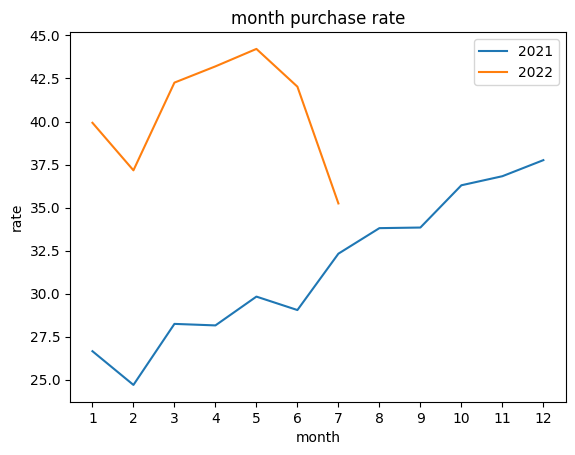

In [122]:
# 2021,2022 구매율 그래프
plt.plot(buy_2021['date_month'], buy_2021['purchase_rate'])
plt.plot(buy_2022['date_month'], buy_2022['purchase_rate'])

plt.title('month purchase rate')
plt.legend(['2021', '2022'])
plt.xticks(buy_2021['date_month'])
plt.xlabel('month')
plt.ylabel('rate')
plt.show()

In [128]:
# 2020 구매율 계산
buy_2020 = merged_pro_trans[merged_pro_trans['date_year'] == 2020].groupby('date_month')['Unnamed: 0'].count()
customer_num = customer['customer_id'].count()

buy_2020 = buy_2020.to_frame()
buy_2020 = buy_2020.rename(columns={'Unnamed: 0':'count'}).reset_index()
buy_2020['purchase_rate'] = 0

for i in range(len(buy_2020)):
    count = buy_2020['count'][i]
    rate = (count / customer_num) * 100
    buy_2020.loc[buy_2020.index[i], 'purchase_rate'] = rate

In [129]:
# 2019 구매율 계산
buy_2019 = merged_pro_trans[merged_pro_trans['date_year'] == 2019].groupby('date_month')['Unnamed: 0'].count()
customer_num = customer['customer_id'].count()

buy_2019 = buy_2019.to_frame()
buy_2019 = buy_2019.rename(columns={'Unnamed: 0':'count'}).reset_index()
buy_2019['purchase_rate'] = 0

for i in range(len(buy_2019)):
    count = buy_2019['count'][i]
    rate = (count / customer_num) * 100
    buy_2019.loc[buy_2019.index[i], 'purchase_rate'] = rate

In [132]:
# 2018 구매율 계산
buy_2018 = merged_pro_trans[merged_pro_trans['date_year'] == 2018].groupby('date_month')['Unnamed: 0'].count()
customer_num = customer['customer_id'].count()

buy_2018 = buy_2018.to_frame()
buy_2018 = buy_2018.rename(columns={'Unnamed: 0':'count'}).reset_index()
buy_2018['purchase_rate'] = 0

for i in range(len(buy_2018)):
    count = buy_2018['count'][i]
    rate = (count / customer_num) * 100
    buy_2018.loc[buy_2018.index[i], 'purchase_rate'] = rate

In [131]:
# 만개 기준으로 18년도부터 계산
merged_pro_trans.groupby('date_year').count()

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,subCategory,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_month
date_year,,,,,,,,,,,,,,,,,,,,,
2016,7039,7039,7039,7039,7039,7039,7039,7039,3297,7039,...,7037,7037,7035,7035,7037,6995,7037,7039,7039,7039
2017,50171,50171,50171,50171,50171,50171,50171,50171,22397,50171,...,50146,50146,50128,50120,50145,49796,50137,50171,50171,50171
2018,107789,107789,107789,107789,107789,107789,107789,107789,48036,107789,...,107746,107746,107711,107699,107746,106969,107731,107789,107789,107789
2019,171472,171472,171472,171472,171472,171472,171472,171472,76190,171472,...,171398,171398,171348,171316,171392,170204,171373,171472,171472,171472
2020,254983,254983,254983,254983,254983,254983,254983,254983,104112,254983,...,254843,254843,254755,254721,254841,253035,254809,254983,254983,254983
2021,377427,377427,377427,377427,377427,377427,377427,377427,135581,377427,...,377227,377227,377094,377046,377215,374601,377176,377427,377427,377427
2022,285704,285704,285704,285704,285704,285704,285704,285704,91526,285704,...,285569,285569,285488,285426,285562,283495,285530,285704,285704,285704


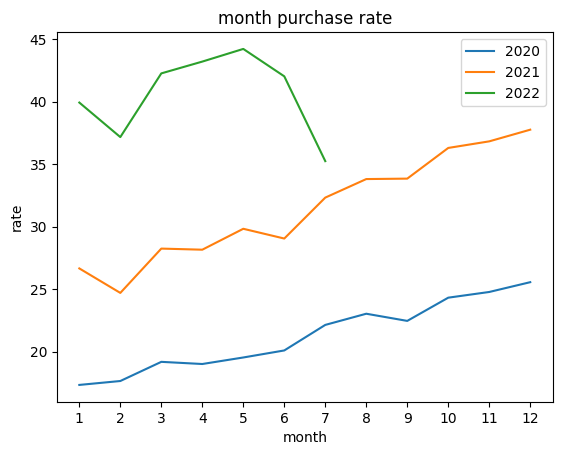

In [134]:
# 2020-2022 구매율 그래프
#plt.plot(buy_2018['date_month'], buy_2018['purchase_rate'])
#plt.plot(buy_2019['date_month'], buy_2019['purchase_rate'])
plt.plot(buy_2020['date_month'], buy_2020['purchase_rate'])
plt.plot(buy_2021['date_month'], buy_2021['purchase_rate'])
plt.plot(buy_2022['date_month'], buy_2022['purchase_rate'])

plt.title('month purchase rate')
plt.legend(['2020','2021', '2022'])
plt.xticks(buy_2021['date_month'])
plt.xlabel('month')
plt.ylabel('rate')
plt.show()

### 일별 구매량 확인

In [147]:
merged_pro_trans_2years

,index,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
0,27,2020-08-20 11:41:15.365620+00:00,4774,784746bd-9adb-4c82-98f1-b51eeff756dc,e1a22441-74b7-409a-87eb-85b3192e5bed,Credit Card,Success,0,NaN,10000,...,Bangle,Gold,Summer,2012.0,Ethnic,Royal Diadem Set of 2 Golden Bangles,20200820,11:41:15.365620Z,2020,8
1,28,2020-10-06 11:51:47.365620+00:00,4774,dc3db6d2-20e7-4408-9fc7-37f6541da2fe,31dc3335-0759-428f-963a-80b8684c1fe5,Credit Card,Success,0,NaN,10000,...,Tshirts,White,Summer,2011.0,Casual,Myntra Men's Friend White T-shirt,20201006,11:51:47.365620Z,2020,10
2,29,2020-11-22 11:43:41.365620+00:00,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Rasasi Women Emotion Perfume,20201122,11:43:41.365620Z,2020,11
3,30,2020-11-22 11:43:41.365620+00:00,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Tshirts,Navy Blue,Summer,2012.0,Casual,Jack & Jones Men Note Navy Blue T-shirt,20201122,11:43:41.365620Z,2020,11
4,31,2021-01-08 11:24:54.365620+00:00,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,...,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,20210108,11:24:54.365620Z,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781561,1254575,2022-07-07 09:48:29.144627+00:00,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,...,Earrings,Silver,Winter,2016.0,Ethnic,Fabindia Women Anusuya Silver Earrings,20220707,09:48:29.144627Z,2022,7
781562,1254579,2020-11-12 18:19:20.074873+00:00,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,...,Belts,Grey,Summer,2012.0,Casual,French Connection Women Grey Belt,20201112,18:19:20.074873Z,2020,11
781563,1254580,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,...,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,20210921,22:10:05.074873Z,2021,9
781564,1254581,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,...,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,20211209,07:35:18.222046Z,2021,12


In [149]:
merged_pro_trans_2years['date_str']

0         20200820
1         20201006
2         20201122
3         20201122
4         20210108
            ...   
781561    20220707
781562    20201112
781563    20210921
781564    20211209
781565    20211211
Name: date_str, Length: 781566, dtype: int64

In [155]:
merged_pro_trans_2years['date_day'] = 0
for i, date in enumerate(merged_pro_trans_2years['date_str']):
    value = str(date)
    merged_pro_trans_2years.loc[i, 'date_day'] = int(value[-2:])

# or
# merged_pro_trans_2years['date_day'] = merged_pro_trans_2years['date_str'].str[-2:].astype(int)

In [203]:
buy_day_2021 = merged_pro_trans_2years[merged_pro_trans_2years['date_year'] == 2021].groupby(['date_month','date_day'])['customer_id'].count()
buy_day_2021 = buy_day_2021.to_frame()
buy_day_2021 = buy_day_2021.rename(columns={'index':'count'}).reset_index()
buy_day_2021

,date_month,date_day,customer_id
0,1,1,713
1,1,2,899
2,1,3,897
3,1,4,838
4,1,5,882
...,...,...,...
360,12,27,1356
361,12,28,1171
362,12,29,1075
363,12,30,1112


In [204]:
# # 2021 구매율 계산
# customer_num = customer['customer_id'].count()

# for i in range(len(buy_day_2021)):
#     count = buy_day_2021['count'][i]
#     rate = (count / customer_num) * 100
#     buy_day_2021.loc[buy_day_2021.index[i], 'purchase_rate'] = rate

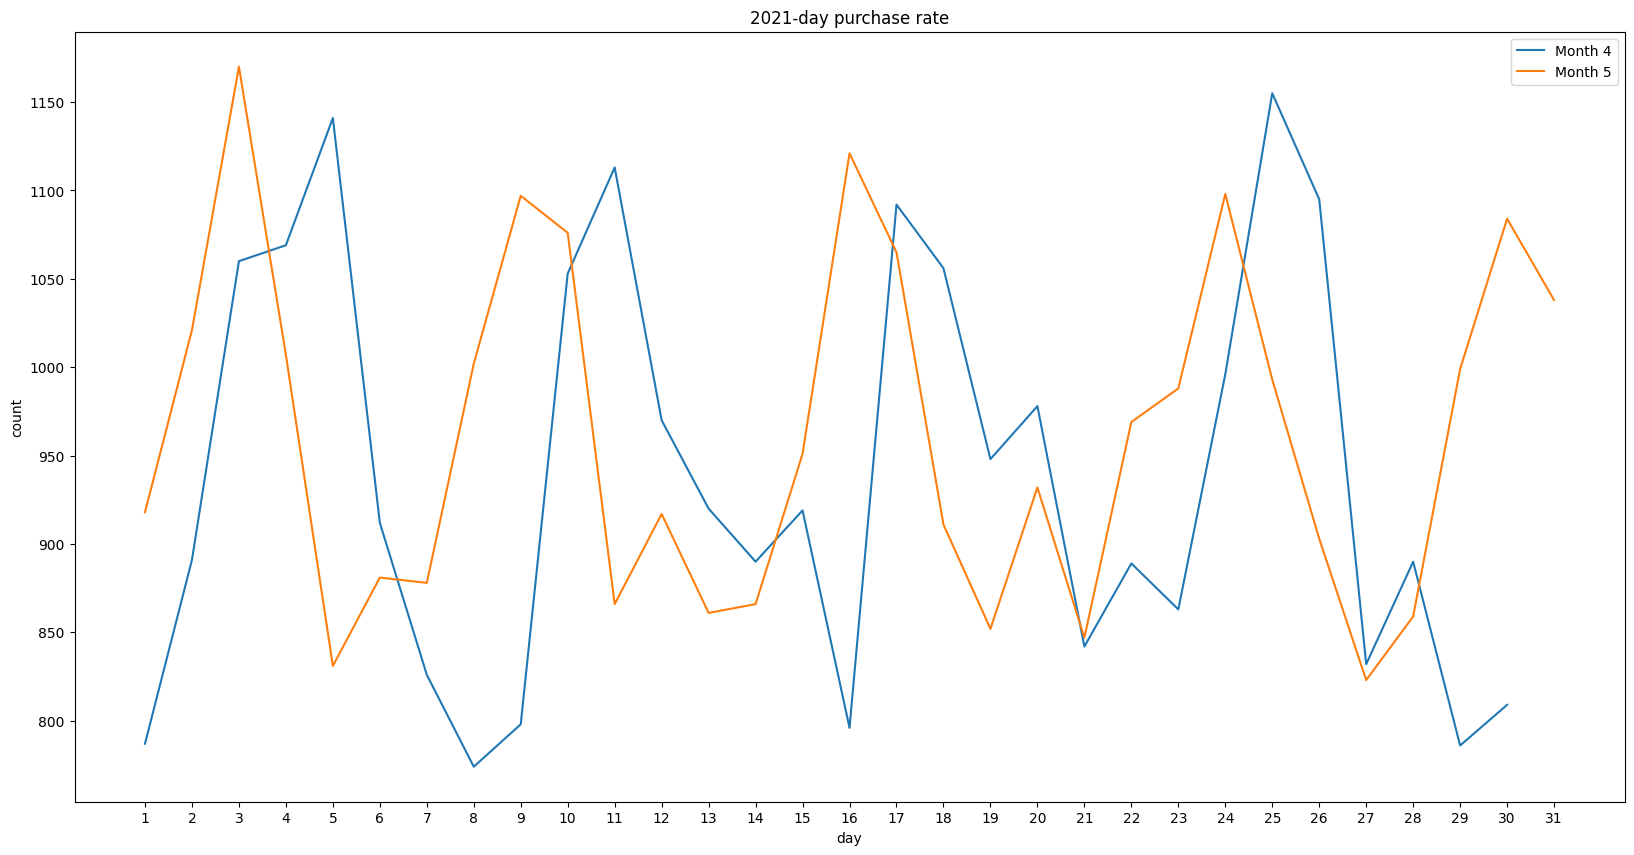

In [228]:
plt.figure(figsize=(20, 10))

# month_1 = buy_day_2021[buy_day_2021['date_month']==1]
# plt.plot(month_1['date_day'], month_1['count'], marker='o')
# month_2 = buy_day_2021[buy_day_2021['date_month']==2]
# plt.plot(month_2['date_day'], month_2['count'], marker='o')

# 월별 그래프 그리기
for month in range(4, 6):
    month_data = buy_day_2021[buy_day_2021['date_month'] == month]
    #plt.plot(month_data['date_day'], month_data['count'], label=f'Month {month}')
    plt.plot(month_data['date_day'], month_data['customer_id'], label=f'Month {month}')

plt.title('2021-day purchase rate')
plt.xticks(month_data['date_day'])
plt.xlabel('day')
plt.ylabel('count')
plt.legend()
plt.show()

연휴였던 5.12 - 5.16, 시작일인 12일과 16일에 구매량이 높다.

4.13-5.12에는 17일과 27일에 판매량이 많은데 라마단 기간에도 구매를 안하진 않는듯하다.

In [215]:
buy_day_2022 = merged_pro_trans_2years[merged_pro_trans_2years['date_year'] == 2022].groupby(['date_month','date_day'])['customer_id'].count()
buy_day_2022 = buy_day_2022.to_frame()
buy_day_2022 = buy_day_2022.rename(columns={'customer_id':'count'}).reset_index()
buy_day_2022

,date_month,date_day,count
0,1,1,1209
1,1,2,1422
2,1,3,1403
3,1,4,1276
4,1,5,1153
...,...,...,...
206,7,26,1275
207,7,27,990
208,7,28,844
209,7,29,715


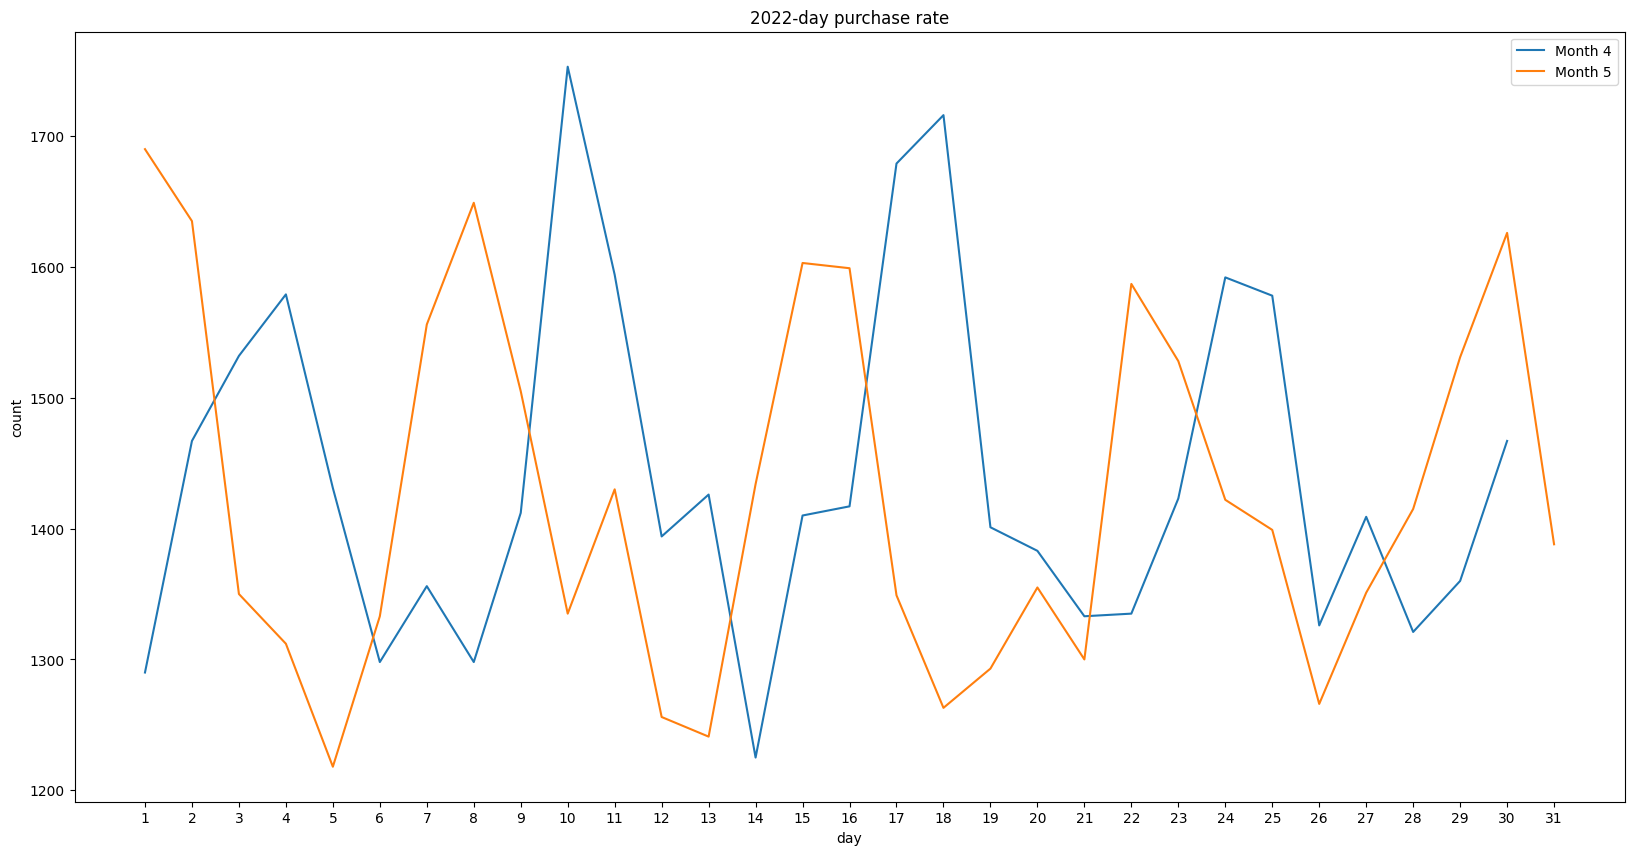

In [229]:
plt.figure(figsize=(20, 10))

# 월별 그래프 그리기
for month in range(4, 6):
    month_data = buy_day_2022[buy_day_2022['date_month'] == month]
    #plt.plot(month_data['date_day'], month_data['count'], label=f'Month {month}')
    plt.plot(month_data['date_day'], month_data['count'], label=f'Month {month}')

plt.title('2022-day purchase rate')
plt.xticks(month_data['date_day'])
plt.xlabel('day')
plt.ylabel('count')
plt.legend()
plt.show()

22년도 르바란 05.02가 5월의 최고 구매량

22년도 그래프도 마찬가지로 라마단 기간동안 구매하지 않는건 아니다

In [222]:
buy_day_2021.groupby('date_month')['customer_id'].sum()

date_month
1     26651
2     24691
3     28238
4     28150
5     29824
6     29043
7     32319
8     33803
9     33838
10    36294
11    36821
12    37755
Name: customer_id, dtype: int64

In [223]:
buy_day_2022.groupby('date_month')['count'].sum()

date_month
1    39926
2    37163
3    42261
4    43205
5    44219
6    42025
7    35238
Name: count, dtype: int64

의미가 없다... 라마단 기간에 구매량이 젤 적지가 않다^^;;

일반적으로 구매량을 측정할 때, 동일한 개인이 동일한 날짜에 여러 번 구매한 경우에는 하나의 구매로 취급하는 것이 일반적입니다. 이는 개인의 독립적인 구매 행동을 기준으로 하여 구매 횟수를 중복해서 계산하지 않는 것입니다. -> 그래서 customer_id로 구분

In [236]:
merged_pro_trans['date_str']

0          20180729
1          20180730
2          20180915
3          20181101
4          20181218
             ...   
1254580    20210921
1254581    20211209
1254582    20211211
1254583    20191218
1254584    20191219
Name: date_str, Length: 1254585, dtype: int64

In [237]:
# 2020년도 확인
data = merged_pro_trans['date_str'].astype('str')
merged_pro_trans['date_day'] = data.str[-2:].astype(int)

buy_day_2020 = merged_pro_trans[merged_pro_trans['date_year'] == 2020].groupby(['date_month','date_day'])['customer_id'].count()
buy_day_2020 = buy_day_2020.to_frame()
buy_day_2020 = buy_day_2020.rename(columns={'customer_id':'count'}).reset_index()
buy_day_2020

,date_month,date_day,count
0,1,1,549
1,1,2,542
2,1,3,431
3,1,4,602
4,1,5,626
...,...,...,...
361,12,27,964
362,12,28,973
363,12,29,682
364,12,30,709


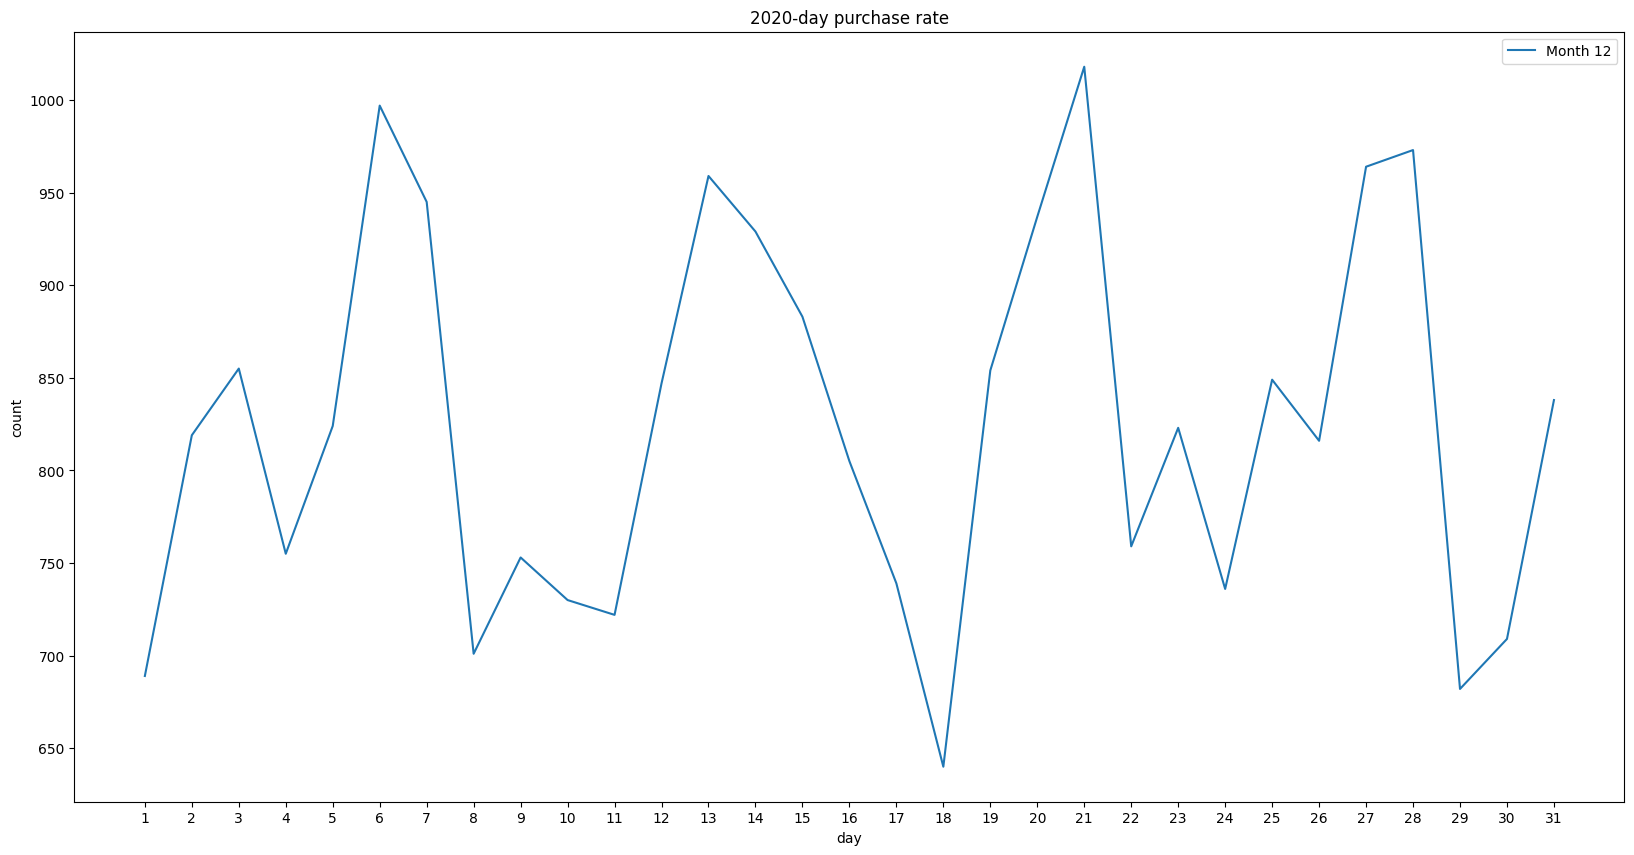

In [239]:
plt.figure(figsize=(20, 10))

# 월별 그래프 그리기
for month in range(12, 13):
    month_data = buy_day_2020[buy_day_2020['date_month'] == month]
    #plt.plot(month_data['date_day'], month_data['count'], label=f'Month {month}')
    plt.plot(month_data['date_day'], month_data['count'], label=f'Month {month}')

plt.title('2020-day purchase rate')
plt.xticks(month_data['date_day'])
plt.xlabel('day')
plt.ylabel('count')
plt.legend()
plt.show()

### 상품 성별, usage별 그래프

In [224]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [248]:
product.count()

id                    44424
gender                44424
masterCategory        44424
subCategory           44424
articleType           44424
baseColour            44409
season                44403
year                  44423
usage                 44107
productDisplayName    44417
dtype: int64

In [240]:
# 상품 성별df
gender = product.groupby('gender')['id'].count()
gender = gender.to_frame()
gender = gender.rename(columns={'id':'count'}).reset_index()

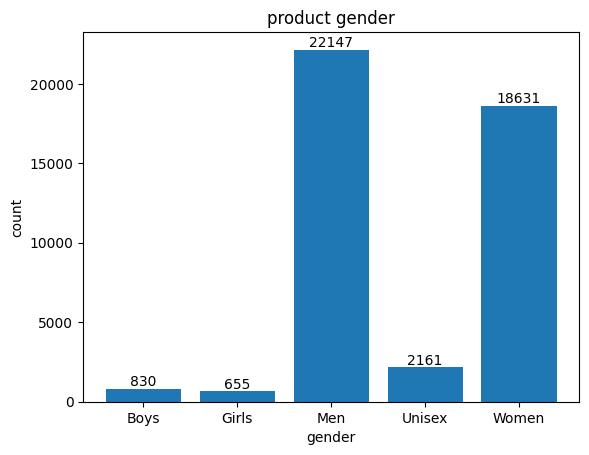

In [247]:
plt.bar(gender['gender'], gender['count'])

plt.title('product gender')

# 개수 표시
for i, count in enumerate(gender['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [252]:
# 상품 용도
p_use = product.groupby('usage')['id'].count()
p_use = p_use.to_frame()
p_use = p_use.rename(columns={'id':'count'}).reset_index()

In [256]:
p_use

,usage,count
0,Casual,34406
1,Ethnic,3208
2,Formal,2345
3,Home,1
4,Party,29
5,Smart Casual,67
6,Sports,4025
7,Travel,26


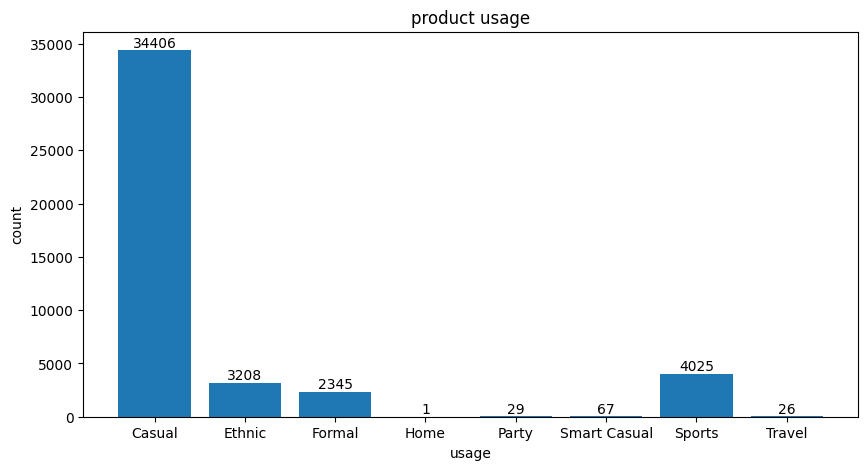

In [262]:
plt.figure(figsize=(10,5))

plt.bar(p_use['usage'],p_use['count'])

plt.title('product usage')

# 개수 표시
for i, count in enumerate(p_use['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('usage')
plt.ylabel('count')
plt.show()

### 가격을 단위 나눠서 구매율/구매 완료 (success )전환율
#### (세션 정의 기준 30분)

In [5]:
# merged_pro_trans = pd.read_csv('merged_pro_trans.csv')
# merged_pro_trans = merged_pro_trans.drop(columns='Unnamed: 0', axis=1)
# merged_pro_trans[(merged_pro_trans['customer_id'] == 4774) & (merged_pro_trans['created_at']=="2019-08-10T12:14:24.365620Z")]

In [6]:
# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 금액대별 확인
transaction_sort = transaction.sort_values(['created_at', 'customer_id'])
transaction_price = transaction_sort.groupby(['created_at', 'customer_id']).first().reset_index()

In [7]:
print(transaction['created_at'].count())
print(transaction_price['created_at'].count())

1254585
852584


In [8]:
transaction_sort[(transaction_sort['customer_id'] == 4774) & (transaction_sort['created_at']=="2019-08-10T12:14:24.365620Z")]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,46352,1,241945
11,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,6352,1,297248
12,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,26620,1,191138
13,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,22849,1,78559
14,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,56247,1,193870


In [9]:
transaction_price[(transaction_price['customer_id'] == 4774) & (transaction_price['created_at']=="2019-08-10T12:14:24.365620Z")]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
177108,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052


In [12]:
print(df.session_id.nunique())
print(transaction_price.session_id.nunique())

5904346
852584


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995246 entries, 0 to 7995245
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  duration_time    object             
dtypes: datetime64[ns, UTC](1), float64(4), object(8)
memory usage: 854.0+ MB


In [31]:
df[df['event_time'].dt.year == 2020]

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
153,0000d71b-9a1e-42fb-909a-f9460a1476a8_28,HOMEPAGE,2020-10-22 10:26:25.814291+00:00,56a1f414-a02a-4746-8688-4c13dacd7494,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
154,0000d71b-9a1e-42fb-909a-f9460a1476a8_29,ADD_TO_CART,2020-10-22 12:08:57.814291+00:00,3adf0fb5-72b8-4585-a5d0-1bee1d603e6a,MOBILE,11207.0,1.0,138991.0,NaN,NaN,NaN,NaN,0 days 00:01:32
155,0000d71b-9a1e-42fb-909a-f9460a1476a8_29,ADD_TO_CART,2020-10-22 12:10:29.814291+00:00,fb4dfe8f-0c39-46b9-a0a4-0ab3c78fcd90,MOBILE,14419.0,1.0,471651.0,NaN,NaN,NaN,NaN,0 days 00:01:32
156,0000d71b-9a1e-42fb-909a-f9460a1476a8_30,SEARCH,2020-10-22 13:56:05.814291+00:00,afda8e26-c7e1-4070-bdea-3159ce15364f,MOBILE,NaN,NaN,NaN,NaN,여성 가방,NaN,NaN,0 days 00:00:00
157,0000d71b-9a1e-42fb-909a-f9460a1476a8_31,CLICK,2020-10-22 15:41:07.814291+00:00,f89c52b8-4b8c-4710-9172-d27891d18bcc,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995226,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353934,HOMEPAGE,2020-11-10 17:01:12.117552+00:00,02daecde-be03-429e-b8c6-20c9aed7df88,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995227,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353935,PROMO_PAGE,2020-11-10 21:26:39.117552+00:00,b619458e-1048-4e19-ae46-f6e77f68f5a0,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995228,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353936,CLICK,2020-11-11 01:52:10.117552+00:00,fcad5bfd-4efc-4d2e-a2c1-c7bb435f5d8c,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995229,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353937,CLICK,2020-11-11 06:19:08.117552+00:00,8640ec35-c65e-4511-8681-4307597a63a8,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00


In [33]:
# 20년도의 총 세션수
print(df[df['event_time'].dt.year == 2020]['session_id'].nunique())

# 2020년도 금액 단위 나누기
transaction_price[transaction_price['created_at'].str[:4] == '2020']


908975


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
228865,2020-01-01T00:02:40.626652Z,91689,3fafbe9f-65ce-41e7-a039-121a0063cbc1,4f423e38-cfa6-4a6b-ac53-1a0fb4f4c9c3,Gopay,Success,0,None,25000,2020-01-04T16:27:03.649463Z,-3.518594,126.555651,254550,55110,1,229550
228866,2020-01-01T00:06:29.960472Z,44571,5111f0b6-fd79-4380-a02c-c743158527ed,dd13fe3c-a3f5-48a5-9fdd-f54ed0eaf1ae,Credit Card,Success,5862,AZ2022,10000,2020-01-02T22:21:58.375047Z,-7.889879,110.632550,294956,44581,1,290818
228867,2020-01-01T00:10:44.080962Z,82962,d8a4ed5c-c462-422b-8699-e7d5d62a1a7d,699137d3-cdde-46de-a41f-8dd32d02d3dc,Credit Card,Success,0,None,5000,2020-01-03T20:36:38.661819Z,-7.194829,111.188915,175651,13263,1,170651
228868,2020-01-01T00:18:48.566429Z,2241,d49966d5-65f6-4dcc-8efc-e9e4ee5b87a4,2374b138-14b2-4e56-8617-8b2980e29ba5,Credit Card,Success,0,None,0,2020-01-04T15:15:27.580391Z,-6.214934,106.787769,211863,5763,1,211863
228869,2020-01-01T00:40:03.203866Z,32874,9c2168ba-3cc1-4c94-be86-3276e7ce081a,fd441219-31ef-493a-97cc-62ab98fc03a1,LinkAja,Success,0,None,0,2020-01-06T01:20:42.188622Z,-7.308047,109.006161,449484,11607,3,149828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401768,2020-12-31T23:49:19.158876Z,84247,9ad37d8b-2074-439a-bda4-5c99c355c55e,dc043b3e-4fab-4115-8a90-f5ea47e02782,Debit Card,Success,0,None,10000,2021-01-03T00:43:14.284799Z,-6.823786,111.196896,349468,9420,1,339468
401769,2020-12-31T23:49:19.543336Z,74063,9477a1c6-63a4-4c76-9108-6185d4efe1e3,02e88d89-bb2b-440f-ae7e-39138a85f2c2,Credit Card,Success,0,None,10000,2021-01-04T05:54:22.370495Z,0.949062,114.895727,570194,41361,1,560194
401770,2020-12-31T23:50:35.463871Z,23239,fc34d47e-0a38-44dd-9928-19332c3cbd92,0a04acc7-e292-4164-b83c-f1c46c95dd28,OVO,Success,2663,AZ2022,10000,2021-01-05T00:33:45.424669Z,-1.500905,115.519239,596422,58135,1,168683
401771,2020-12-31T23:50:51.970324Z,494,0963df5f-cc75-4cb8-a619-0a86bd18b51d,09f62c79-42bb-43a9-99bd-338bdf6b46de,OVO,Success,0,None,50000,2021-01-03T01:38:07.891462Z,-8.575818,116.329009,622002,21641,1,572002


In [56]:
# 금액 범위
#transaction_price[transaction_price['created_at'].str[:4] == '2020']['total_amount'].min()

transaction_price[transaction_price['created_at'].str[:4] == '2020']['total_amount'].describe()

count    1.729080e+05
mean     5.520185e+05
std      8.268658e+05
min      1.089800e+04
25%      2.034005e+05
50%      3.026360e+05
75%      5.158705e+05
max      2.350449e+07
Name: total_amount, dtype: float64

In [57]:
count = 1.729080e+05
mean = 5.520185e+05
std = 8.268658e+05
min_val = 1.089800e+04
q1 = 2.034005e+05
median = 3.026360e+05
q3 = 5.158705e+05
max_val = 2.350449e+07

formatted_count = f"{count:.0f}"
formatted_mean = f"{mean:.0f}"
formatted_std = f"{std:.0f}"
formatted_min = f"{min_val:.0f}"
formatted_q1 = f"{q1:.0f}"
formatted_median = f"{median:.0f}"
formatted_q3 = f"{q3:.0f}"
formatted_max = f"{max_val:.0f}"

print(formatted_count)
print(formatted_mean)
print(formatted_std)
print(formatted_min)
print(formatted_q1)
print(formatted_median)
print(formatted_q3)
print(formatted_max)


172908
552018
826866
10898
203400
302636
515870
23504490


In [58]:
transaction_price[transaction_price['created_at'].str[:4] == '2020'].sort_values('total_amount')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
393094,2020-12-16T10:01:46.861914Z,20608,cf56a44f-babe-48a4-871c-91afe1d54854,3655b08e-2faa-4846-9b21-d52336bdd752,Credit Card,Success,0,None,0,2020-12-19T01:13:10.081784Z,-7.320398,106.875943,10898,24742,1,10898
401113,2020-12-30T20:42:51.608662Z,80812,5f72ea3e-6561-4d16-aafd-d98dbfed4022,4f2fddeb-4f97-46e3-a095-33641cea5c73,Credit Card,Success,4887,BUYMORE,10000,2021-01-02T22:42:42.084209Z,-3.296778,114.693259,17515,15681,1,12402
350392,2020-09-28T23:04:38.560531Z,3680,0e714e30-bb63-4ce3-9245-594f6e961edb,86957cec-419b-4602-b702-44309bad8d6b,LinkAja,Success,8749,AZ2022,10000,2020-10-03T01:31:43.580584Z,-2.555073,115.923000,21902,46694,1,20651
272205,2020-04-17T01:23:33.677357Z,34420,8004810d-729c-4533-b3bb-051337a07fc5,16078eb9-d31c-4592-b7de-23ede1434e0f,Credit Card,Success,4789,AZ2022,10000,2020-04-18T15:44:58.655718Z,-7.566639,108.774697,25038,33519,1,19827
242590,2020-02-04T23:20:10.090380Z,33133,3663687f-bf4c-4966-a32c-7aad84609815,0b19eb5c-8dfd-48c7-a195-105e7b1e1c46,Gopay,Success,2347,XX2022,0,2020-02-10T12:26:36.545100Z,-4.529960,120.083994,25781,9209,1,28128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364817,2020-10-26T06:29:14.312037Z,92732,aff7afd4-2c51-4172-8cad-def8269ea4a8,f1be44be-f8f1-4dbc-9d8b-ae3d1eb87eed,Credit Card,Success,0,None,0,2020-10-30T06:44:40.319230Z,0.964512,118.804082,16545348,8760,1,175968
337807,2020-09-04T21:30:44.763632Z,71018,be37f6b8-a6ea-4f69-9b57-9e587f2552a8,f197979c-b722-4af0-bae2-bcc945a666dd,Credit Card,Success,7815,BUYMORE,10000,2020-09-08T22:52:52.149778Z,-7.464938,107.615822,16978873,28166,16,1061043
299716,2020-06-19T02:41:41.852686Z,44515,321b648b-0e14-4321-ab4d-47c50c3305ec,83c7caec-4652-4496-9366-ba31eb13a2b5,OVO,Success,5012,AZ2022,10000,2020-06-21T03:45:50.060969Z,-7.093022,110.995103,17227543,32803,6,147749
266115,2020-04-02T17:16:04.459094Z,73718,ff32e095-a587-44e1-8218-9a7721988158,5dc07f48-1332-40f3-b127-11881371cbb2,Credit Card,Success,0,None,10000,2020-04-04T05:45:08.611156Z,-6.283353,106.849304,19298582,8407,1,549595


In [74]:
# 구매 완료 세션수 / 총세션수 * 100
total_session = df[df['event_time'].dt.year == 2020]['session_id'].nunique()
print('100000루피아 미만 :',s1/total_session*100)
print('200000루피아 미만 :',s2/total_session*100)
print('300000루피아 미만 :',s3/total_session*100)

100000루피아 미만 : 0.5465496850848484
200000루피아 미만 : 3.849280783299871
300000루피아 미만 : 4.6065073296845345


In [107]:
# 2020년도 구매전환율 구하기 위한 df 생성
transaction_price_2020 = transaction_price[transaction_price['created_at'].str[:4] == '2020']

session_counts_2020 = pd.DataFrame(columns=['Range', 'Session_Count'])

for i in range(1, 101):
    lower_bound = (i - 1) * 100000
    upper_bound = i * 100000
    session_count = transaction_price_2020[
        (transaction_price_2020['total_amount'] >= lower_bound) &
        (transaction_price_2020['total_amount'] < upper_bound) &
        (transaction_price_2020['payment_status'] == 'Success')
    ]['session_id'].nunique()

    session_counts_2020 = pd.concat([session_counts_2020, pd.DataFrame({'Range': f'{lower_bound}', 'Session_Count': session_count}, index=[0])],ignore_index=True)

# 추가 범위 계산
lower_bound = 10000000
session_count = transaction_price_2020[
    (transaction_price_2020['total_amount'] >= lower_bound) &
    (transaction_price_2020['payment_status'] == 'Success')
]['session_id'].nunique()

session_counts_2020.loc[100] = {'Range': f'{lower_bound}', 'Session_Count': session_count}

In [112]:
session_counts_2020

,Range,Session_Count
0,0,4968
1,100000,34989
2,200000,41872
3,300000,26716
4,400000,14077
...,...,...
96,9600000,5
97,9700000,5
98,9800000,4
99,9900000,4


In [113]:
# 2020년도의 총 세션수
total_session = df[df['event_time'].dt.year == 2020]['session_id'].nunique()

session_counts_2020['Rate'] = 0

# 구매완료 전환율
for i in range(len(session_counts_2020)):
    count = session_counts_2020['Session_Count'][i]
    rate = (count / total_session) * 100
    session_counts_2020['Rate'][i] = rate

C:\Users\user\AppData\Local\Temp\ipykernel_13264\3070170782.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_counts_2020['Rate'][i] = rate


In [114]:
session_counts_2020

,Range,Session_Count,Rate
0,0,4968,0.546550
1,100000,34989,3.849281
2,200000,41872,4.606507
3,300000,26716,2.939135
4,400000,14077,1.548667
...,...,...,...
96,9600000,5,0.000550
97,9700000,5,0.000550
98,9800000,4,0.000440
99,9900000,4,0.000440


In [108]:
# 2021년도 구매전환율 구하기 위한 df 생성
transaction_price_2021 = transaction_price[transaction_price['created_at'].str[:4] == '2021']

session_counts_2021 = pd.DataFrame(columns=['Range', 'Session_Count'])

for i in range(1, 101):
    lower_bound = (i - 1) * 100000
    upper_bound = i * 100000
    session_count = transaction_price_2021[
        (transaction_price_2021['total_amount'] >= lower_bound) &
        (transaction_price_2021['total_amount'] < upper_bound) &
        (transaction_price_2021['payment_status'] == 'Success')
    ]['session_id'].nunique()

    session_counts_2021 = pd.concat([session_counts_2021, pd.DataFrame({'Range': f'{lower_bound}', 'Session_Count': session_count}, index=[0])],ignore_index=True)

# 추가 범위 계산
lower_bound = 10000000
session_count = transaction_price_2021[
    (transaction_price_2021['total_amount'] >= lower_bound) &
    (transaction_price_2021['payment_status'] == 'Success')
]['session_id'].nunique()

session_counts_2021.loc[100] = {'Range': f'{lower_bound}', 'Session_Count': session_count}

In [116]:
# 2021년도의 총 세션수
total_session = df[df['event_time'].dt.year == 2021]['session_id'].nunique()

session_counts_2021['Rate'] = 0

# 구매완료 전환율
for i in range(len(session_counts_2021)):
    count = session_counts_2021['Session_Count'][i]
    rate = (count / total_session) * 100
    session_counts_2021['Rate'][i] = rate

C:\Users\user\AppData\Local\Temp\ipykernel_13264\49494804.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_counts_2021['Rate'][i] = rate


In [117]:
session_counts_2021

,Range,Session_Count,Rate
0,0,7142,0.248814
1,100000,51314,1.787684
2,200000,62487,2.176930
3,300000,39571,1.378580
4,400000,21104,0.735224
...,...,...,...
96,9600000,10,0.000348
97,9700000,8,0.000279
98,9800000,6,0.000209
99,9900000,11,0.000383


In [109]:
# 2022년도 구매전환율 구하기 위한 df 생성
transaction_price_2022 = transaction_price[transaction_price['created_at'].str[:4] == '2022']

session_counts_2022 = pd.DataFrame(columns=['Range', 'Session_Count'])

for i in range(1, 101):
    lower_bound = (i - 1) * 100000
    upper_bound = i * 100000
    session_count = transaction_price_2022[
        (transaction_price_2022['total_amount'] >= lower_bound) &
        (transaction_price_2022['total_amount'] < upper_bound) &
        (transaction_price_2022['payment_status'] == 'Success')
    ]['session_id'].nunique()

    session_counts_2022 = pd.concat([session_counts_2022, pd.DataFrame({'Range': f'{lower_bound}', 'Session_Count': session_count}, index=[0])],ignore_index=True)

# 추가 범위 계산
lower_bound = 10000000
session_count = transaction_price_2022[
    (transaction_price_2022['total_amount'] >= lower_bound) &
    (transaction_price_2022['payment_status'] == 'Success')
]['session_id'].nunique()

session_counts_2022.loc[100] = {'Range': f'{lower_bound}', 'Session_Count': session_count}

In [119]:
# 2022년도의 총 세션수
total_session = df[df['event_time'].dt.year == 2022]['session_id'].nunique()

session_counts_2022['Rate'] = 0

# 구매완료 전환율
for i in range(len(session_counts_2022)):
    count = session_counts_2022['Session_Count'][i]
    rate = (count / total_session) * 100
    session_counts_2022['Rate'][i] = rate

C:\Users\user\AppData\Local\Temp\ipykernel_13264\3073797497.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_counts_2022['Rate'][i] = rate


In [121]:
session_counts_2022

,Range,Session_Count,Rate
0,0,5408,0.254495
1,100000,38997,1.835162
2,200000,47079,2.215494
3,300000,30521,1.436290
4,400000,16077,0.756569
...,...,...,...
96,9600000,1,0.000047
97,9700000,7,0.000329
98,9800000,2,0.000094
99,9900000,3,0.000141


In [218]:
print('20년도 세션 수 :' ,session_counts_2020['Session_Count'].count())
print('20년도 총 세션 수: ', df[df['event_time'].dt.year == 2020]['session_id'].nunique())
print('21년도 세션 수 :' ,session_counts_2021['Session_Count'].count())
print('21년도 총 세션 수: ', df[df['event_time'].dt.year == 2021]['session_id'].nunique())
print('22년도 세션 수 :' ,session_counts_2022['Session_Count'].count())
print('22년도 총 세션 수: ', df[df['event_time'].dt.year == 2022]['session_id'].nunique())

20년도 세션 수 : 101
20년도 총 세션 수:  908975
21년도 세션 수 : 101
21년도 총 세션 수:  2870418
22년도 세션 수 : 101
22년도 총 세션 수:  2124989


In [129]:
session_counts_2020.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
      dtype='int64', length=101)

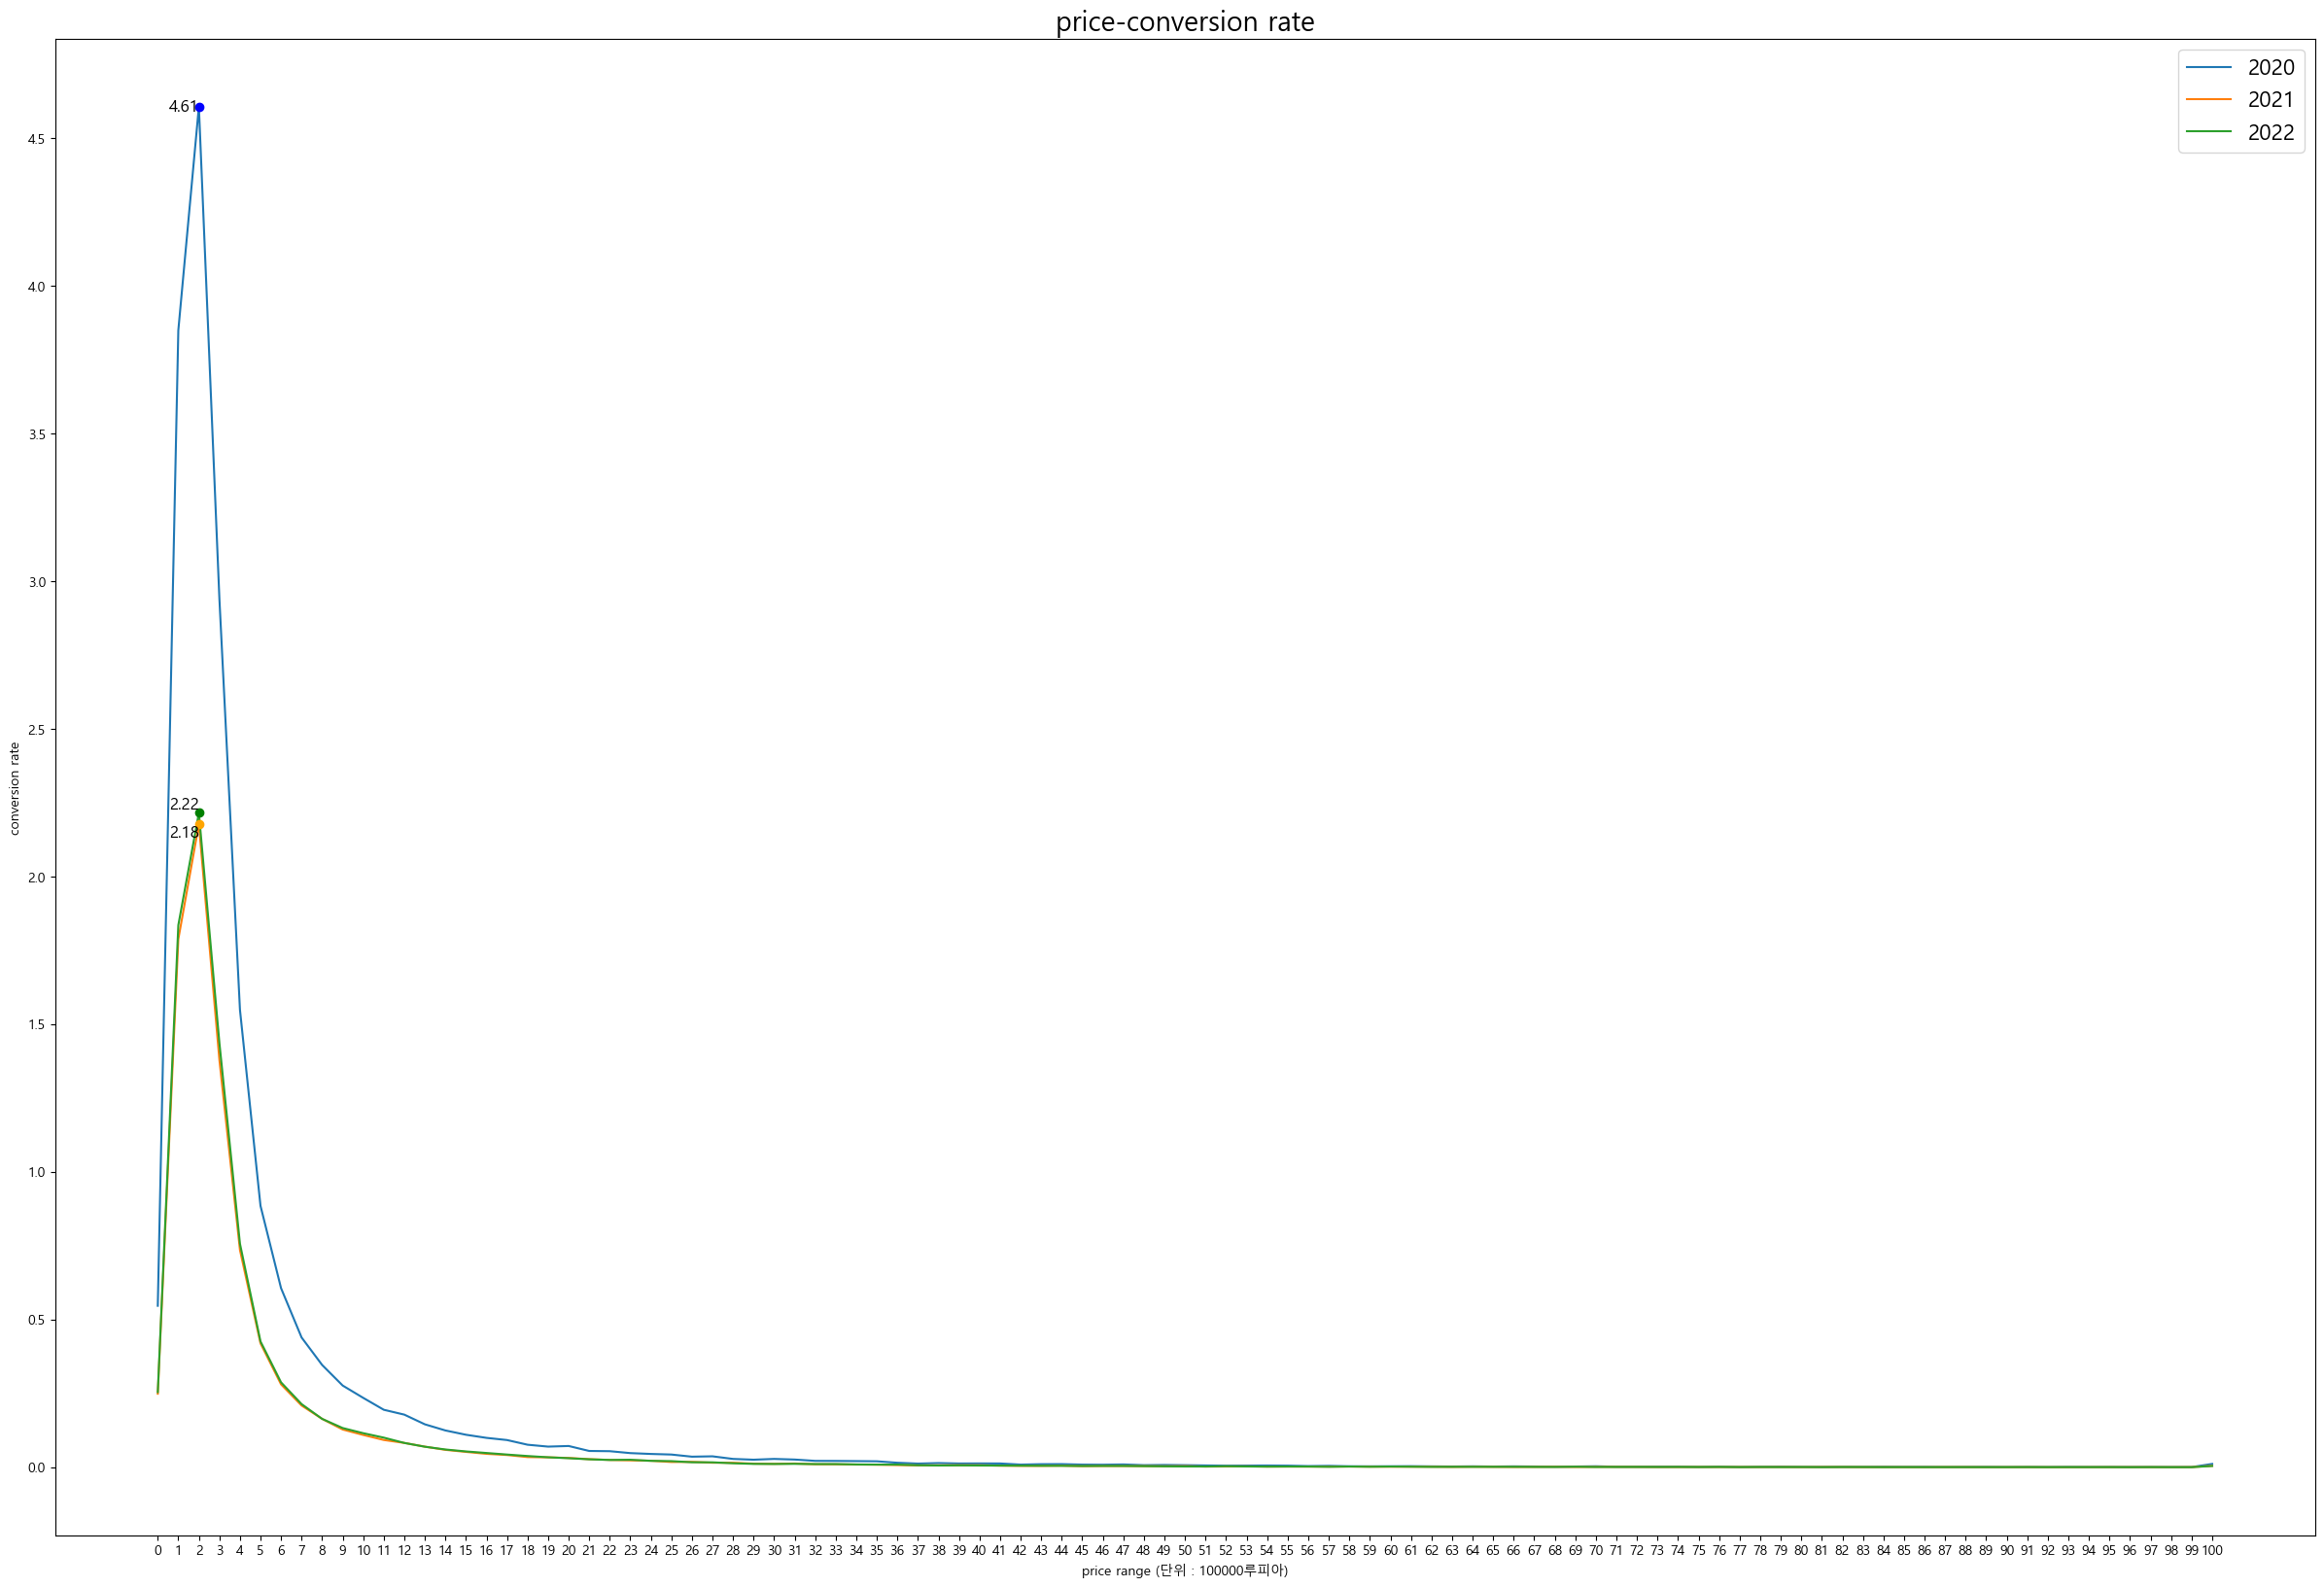

In [153]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(30,20))
plt.plot(session_counts_2020.index, session_counts_2020['Rate'], label='2020')
plt.plot(session_counts_2021.index, session_counts_2021['Rate'], label='2021')
plt.plot(session_counts_2022.index, session_counts_2022['Rate'], label='2022')

plt.title('price-conversion rate', fontsize=20)

plt.xlabel('price range (단위 : 100000루피아)')
plt.ylabel('conversion rate')
plt.xticks(session_counts_2020.index)

yticks = np.arange(0, session_counts_2020['Rate'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = session_counts_2020['Rate'].idxmax()
max_rate_2020 = session_counts_2020.loc[max_index_2020, 'Rate']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = session_counts_2021['Rate'].idxmax()
max_rate_2021 = session_counts_2021.loc[max_index_2021, 'Rate']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = session_counts_2022['Rate'].idxmax()
max_rate_2022 = session_counts_2022.loc[max_index_2022, 'Rate']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

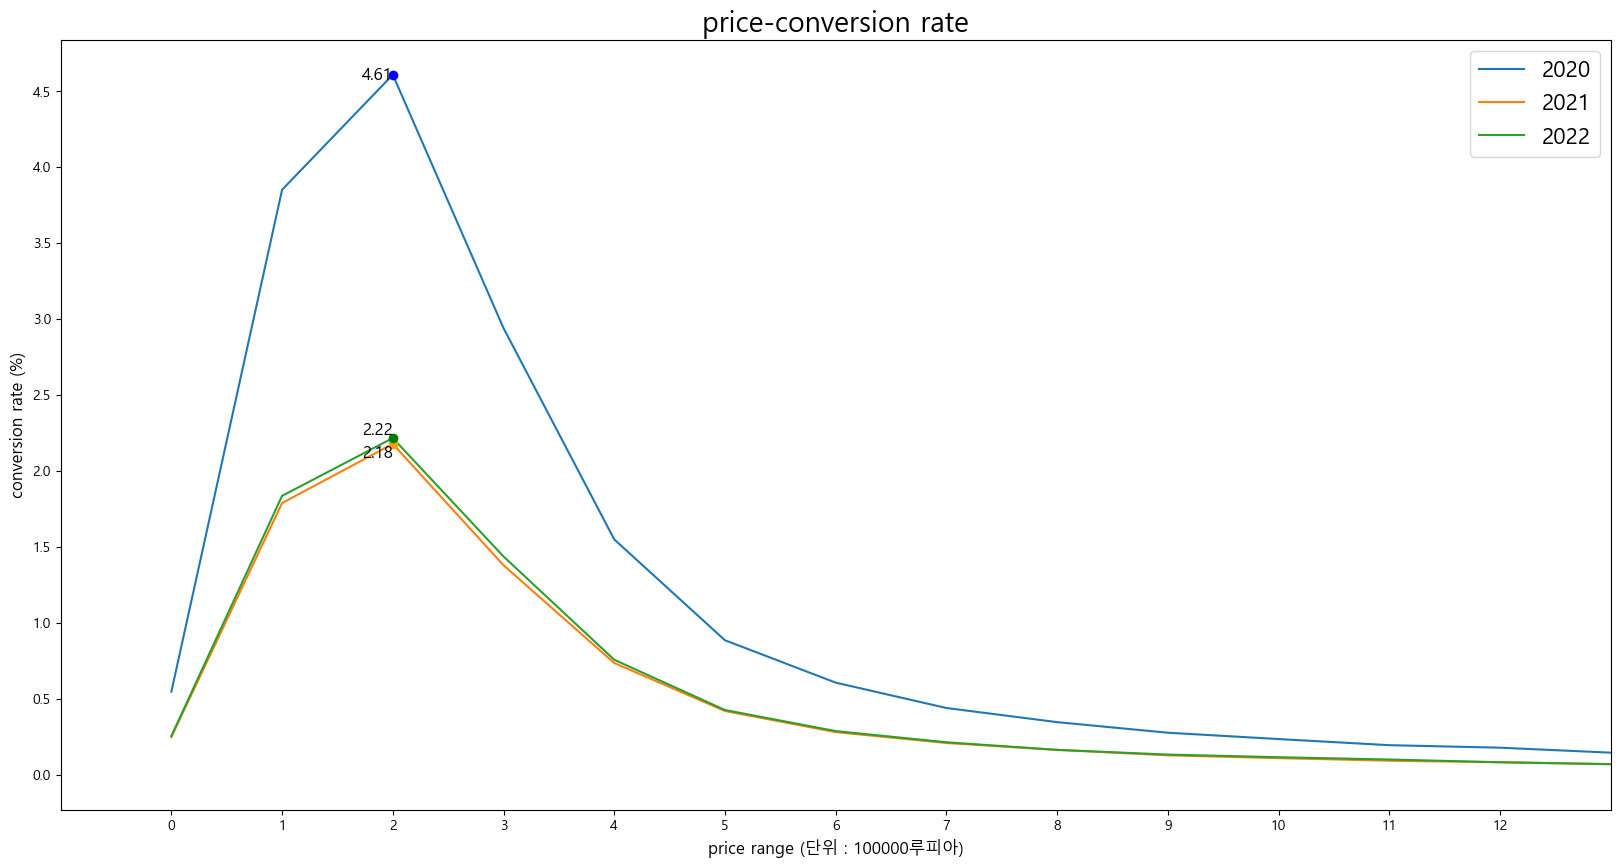

In [220]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(session_counts_2020.index, session_counts_2020['Rate'], label='2020')
plt.plot(session_counts_2021.index, session_counts_2021['Rate'], label='2021')
plt.plot(session_counts_2022.index, session_counts_2022['Rate'], label='2022')

plt.title('price-conversion rate', fontsize=20)

plt.xlabel('price range (단위 : 100000루피아)', fontsize = 12)
plt.ylabel('conversion rate (%)', fontsize = 12)
plt.xlim(-1, 13)
plt.xticks(np.arange(13))

yticks = np.arange(0, session_counts_2020['Rate'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = session_counts_2020['Rate'].idxmax()
max_rate_2020 = session_counts_2020.loc[max_index_2020, 'Rate']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = session_counts_2021['Rate'].idxmax()
max_rate_2021 = session_counts_2021.loc[max_index_2021, 'Rate']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = session_counts_2022['Rate'].idxmax()
max_rate_2022 = session_counts_2022.loc[max_index_2022, 'Rate']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

In [5]:
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [6]:
price_range_200k_to_300k = merged_pro_trans[(merged_pro_trans['total_amount'] >= 200000) & (merged_pro_trans['total_amount'] < 300000)]
price_range_200k_to_300k.groupby('season').count()

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,subCategory,articleType,baseColour,year,usage,productDisplayName,date_str,time_str,date_year,date_month
season,,,,,,,,,,,,,,,,,,,,,
Fall,56295,56295,56295,56295,56295,56295,56295,56295,21335,56295,...,56295,56295,56273,56295,56247,56295,56295,56295,56295,56295
Spring,14884,14884,14884,14884,14884,14884,14884,14884,5662,14884,...,14884,14884,14841,14884,13613,14868,14884,14884,14884,14884
Summer,106282,106282,106282,106282,106282,106282,106282,106282,40286,106282,...,106282,106282,106282,106282,106115,106274,106282,106282,106282,106282
Winter,41974,41974,41974,41974,41974,41974,41974,41974,15971,41974,...,41974,41974,41974,41974,41946,41974,41974,41974,41974,41974


In [7]:
p_final = price_range_200k_to_300k[
    (price_range_200k_to_300k['created_at'].str[:4] == '2020')
    | (price_range_200k_to_300k['created_at'].str[:4] == '2021')
    | (price_range_200k_to_300k['created_at'].str[:4] == '2022')]

In [180]:
# 구매 실패 건수 없음
p_final[p_final['payment_status']=='False']

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month


In [93]:
p_final.head(2).T

,29,30
Unnamed: 0,29,30
created_at,2020-11-22T11:43:41.365620Z,2020-11-22T11:43:41.365620Z
customer_id,4774,4774
booking_id,878f079d-93d8-428e-8f29-c4fd339d8309,878f079d-93d8-428e-8f29-c4fd339d8309
session_id,5fc7f66d-d6d5-4245-9b05-72f39ae75640,5fc7f66d-d6d5-4245-9b05-72f39ae75640
payment_method,Credit Card,Credit Card
payment_status,Success,Success
promo_amount,0,0
promo_code,NaN,NaN
shipment_fee,5000,5000


In [95]:
print(p_final.groupby('masterCategory')['quantity'].sum().sort_values(ascending=False))
print('-----------------')
print(p_final.groupby('season')['quantity'].sum().sort_values(ascending=False))
print('-----------------')
print(p_final.groupby('subCategory')['quantity'].sum().sort_values(ascending=False))

masterCategory
Apparel           81073
Accessories       42079
Footwear          35276
Personal Care      9087
Free Items          364
Sporting Goods      115
Home                  3
Name: quantity, dtype: int64
-----------------
season
Summer    81403
Fall      43093
Winter    32091
Spring    11325
Name: quantity, dtype: int64
-----------------
subCategory
Topwear                     58088
Shoes                       28061
Bags                        11533
Bottomwear                  10349
Watches                      9371
Innerwear                    6861
Jewellery                    4004
Eyewear                      3977
Fragrance                    3840
Sandal                       3738
Flip Flops                   3477
Wallets                      3466
Belts                        3088
Socks                        2632
Lips                         1994
Dress                        1839
Loungewear and Nightwear     1824
Saree                        1654
Nails                       

In [96]:
# print(p_final.groupby('masterCategory')['masterCategory'].count().sort_values(ascending=False))
# print('-----------------')
# print(p_final.groupby('season')['season'].count().sort_values(ascending=False))
# print('-----------------')
# print(p_final.groupby('subCategory')['subCategory'].count().sort_values(ascending=False))

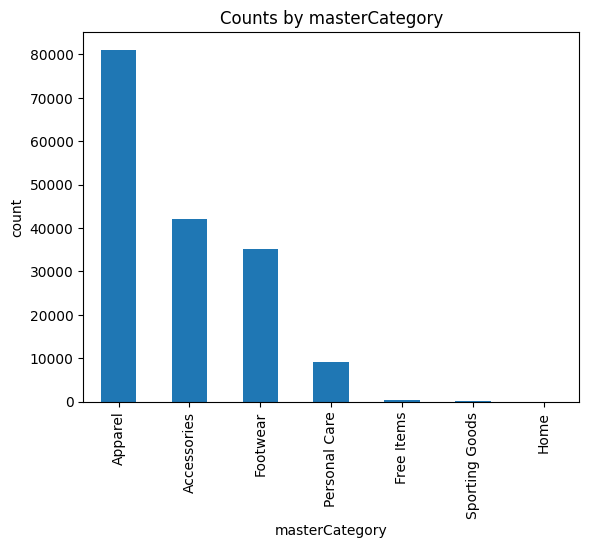

In [97]:
a = p_final.groupby('masterCategory')['quantity'].sum().sort_values(ascending=False)
a.plot(kind='bar')

plt.title('Counts by masterCategory')
plt.xlabel('masterCategory')
plt.ylabel('count')

plt.show()

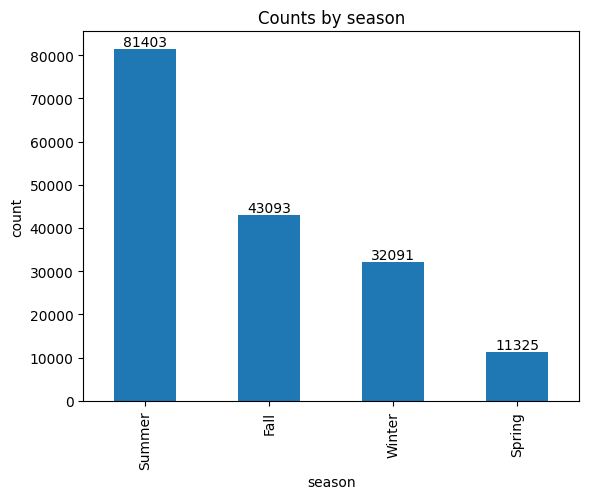

In [98]:
b = p_final.groupby('season')['quantity'].sum().sort_values(ascending=False)
ax = b.plot(kind='bar')
for i, v in enumerate(b):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Counts by season')
plt.xlabel('season')
plt.ylabel('count')

plt.show()

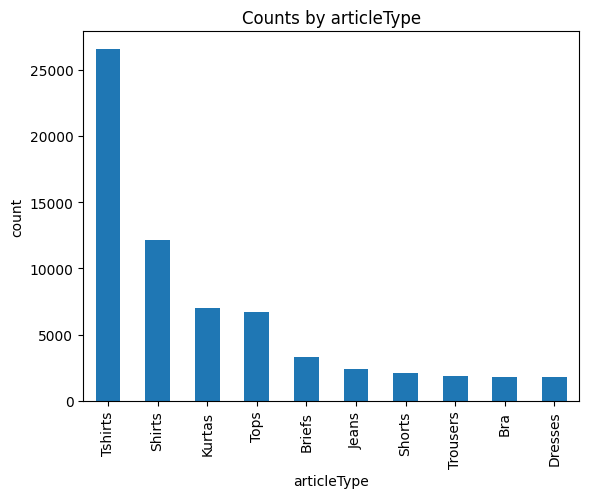

In [99]:
c = p_final[p_final['masterCategory']=='Apparel'].groupby('articleType')['quantity'].sum().sort_values(ascending=False)

top_10 = c.head(10)  # 상위 10개

top_10.plot(kind='bar')

plt.title('Counts by articleType')
plt.xlabel('articleType')
plt.ylabel('count')

plt.show()

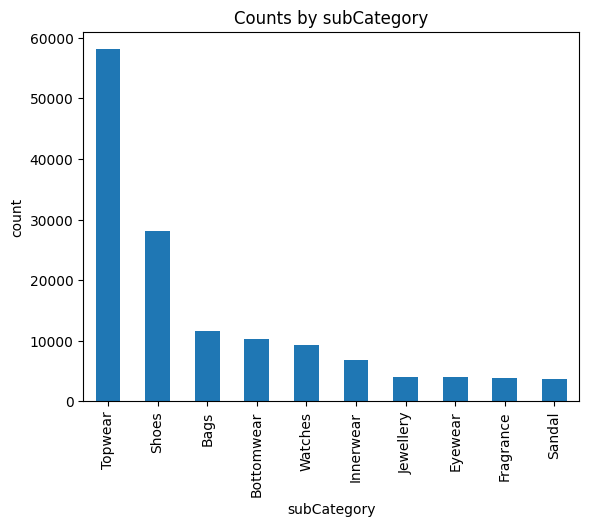

In [101]:
d = p_final.groupby('subCategory')['quantity'].sum().sort_values(ascending=False)
d.plot(kind='bar')

top_10 = d.head(10)  # 상위 10개

top_10.plot(kind='bar')

plt.title('Counts by subCategory')
plt.xlabel('subCategory')
plt.ylabel('count')

plt.show()

In [226]:
p_final[p_final['customer_id']==4774]

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
29,29,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Rasasi Women Emotion Perfume,20201122,11:43:41.365620Z,2020,11
30,30,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Tshirts,Navy Blue,Summer,2012.0,Casual,Jack & Jones Men Note Navy Blue T-shirt,20201122,11:43:41.365620Z,2020,11
32,32,2021-02-24T10:35:41.365620Z,4774,3e8d1505-80ad-4438-a82b-2a017e0c551e,57b6d108-9ec4-48ef-8d66-cdd17c4942ba,Gopay,Success,3855,BUYMORE,10000,...,Kurtas,Green,Summer,2011.0,Ethnic,W Women Printed Green Kurtas,20210224,10:35:41.365620Z,2021,2
43,43,2022-06-09T12:18:09.365620Z,4774,7ab6eac3-ff92-46d7-9030-296301ee920a,1688279e-d03f-466a-a20e-57846de4c179,Credit Card,Success,3329,XX2022,50000,...,Casual Shoes,Yellow,Fall,2011.0,Casual,Puma Men Yacht Lifevest Yellow Casual Shoes,20220609,12:18:09.365620Z,2022,6


In [233]:
# 고객 session 겹치는 경우 중복 처리
print(p_final[p_final['promo_amount']==0].groupby('session_id').size().count())
print(p_final[p_final['promo_amount']!=0].groupby('session_id').size().count())

101958
56475


In [5]:
# df = df.rename(columns={'session_id': 'new_session_id'})
# df['session_id'] = df['new_session_id'].apply(lambda x: x[:36])

In [6]:
# 가격을 단위 나눠서 구매율/구매 완료 (success )전환율
# 세션 정의 기준 30분으로

In [7]:
# merged_tran_new_session = df.merge(transaction, on='session_id', how='left')

### 명재님 분석을 통해 얻은 결과 → 7월에 어떤 season 제품이 많이 나갔는지 확인


In [20]:
July_product = merged_pro_trans_2years[merged_pro_trans_2years['date_month']==7]

In [29]:
July_product.groupby('season').size().sort_values(ascending=False)

season
Summer    32861
Fall      17105
Winter    12961
Spring     4572
dtype: int64

In [30]:
July_product.groupby('subCategory').size().sort_values(ascending=False)

subCategory
Topwear                     23350
Shoes                       11305
Bags                         4700
Bottomwear                   4107
Watches                      3843
Innerwear                    2676
Jewellery                    1634
Eyewear                      1619
Fragrance                    1509
Sandal                       1464
Wallets                      1385
Flip Flops                   1365
Belts                        1281
Socks                        1074
Lips                          801
Dress                         722
Loungewear and Nightwear      690
Saree                         661
Nails                         527
Makeup                        487
Headwear                      451
Ties                          371
Accessories                   180
Scarves                       173
Free Gifts                    166
Cufflinks                     156
Stoles                        150
Apparel Set                   148
Skin Care                     113
Sk

In [31]:
July_product.groupby('masterCategory').size().sort_values(ascending=False)

masterCategory
Apparel           32374
Accessories       17167
Footwear          14134
Personal Care      3646
Free Items          167
Sporting Goods       42
Home                  1
dtype: int64

In [32]:
July_product.groupby('articleType').size().sort_values(ascending=False)

articleType
Tshirts               10644
Shirts                 4967
Casual Shoes           4385
Watches                3843
Sports Shoes           3156
                      ...  
Rain Trousers             1
Ties and Cufflinks        1
Ipad                      1
Shoe Laces                1
Tablet Sleeve             1
Length: 142, dtype: int64

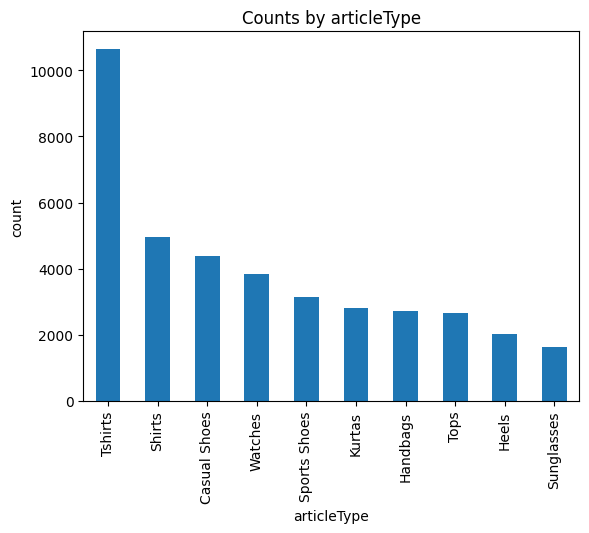

In [48]:
aa = July_product.groupby('articleType').size().sort_values(ascending=False)

top_10 = aa.head(10)  # 상위 10개

top_10.plot(kind='bar')

plt.title('Counts by articleType')
plt.xlabel('articleType')
plt.ylabel('count')

plt.show()

In [50]:
# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 프로모션만 확인
July_product_promo_sort = July_product.sort_values(['created_at', 'customer_id'])
July_product_promo = July_product_promo_sort.groupby(['created_at', 'customer_id']).first().reset_index()

In [60]:
print(July_product_promo[July_product_promo['promo_amount']==0].shape[0])
print(July_product_promo[July_product_promo['promo_amount']!=0].shape[0])

31535
14660


In [61]:
# 같은 날짜에 같은 아이디가 있는 경우 첫 번째 행만 선택 → 월별 프로모션 
transaction_sort = transaction.sort_values(['created_at', 'customer_id'])
transaction_prmo = transaction_sort.groupby(['created_at', 'customer_id']).first().reset_index()

In [63]:
# 20-22년도
transaction_prmo_2years = transaction_prmo[
    (transaction_prmo['created_at'].str[:4] == '2020')
    | (transaction_prmo['created_at'].str[:4] == '2021')
    | (transaction_prmo['created_at'].str[:4] == '2022')]

In [68]:
transaction_prmo_2years

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
228865,2020-01-01T00:02:40.626652Z,91689,3fafbe9f-65ce-41e7-a039-121a0063cbc1,4f423e38-cfa6-4a6b-ac53-1a0fb4f4c9c3,Gopay,Success,0,None,25000,2020-01-04T16:27:03.649463Z,-3.518594,126.555651,254550,55110,1,229550
228866,2020-01-01T00:06:29.960472Z,44571,5111f0b6-fd79-4380-a02c-c743158527ed,dd13fe3c-a3f5-48a5-9fdd-f54ed0eaf1ae,Credit Card,Success,5862,AZ2022,10000,2020-01-02T22:21:58.375047Z,-7.889879,110.632550,294956,44581,1,290818
228867,2020-01-01T00:10:44.080962Z,82962,d8a4ed5c-c462-422b-8699-e7d5d62a1a7d,699137d3-cdde-46de-a41f-8dd32d02d3dc,Credit Card,Success,0,None,5000,2020-01-03T20:36:38.661819Z,-7.194829,111.188915,175651,13263,1,170651
228868,2020-01-01T00:18:48.566429Z,2241,d49966d5-65f6-4dcc-8efc-e9e4ee5b87a4,2374b138-14b2-4e56-8617-8b2980e29ba5,Credit Card,Success,0,None,0,2020-01-04T15:15:27.580391Z,-6.214934,106.787769,211863,5763,1,211863
228869,2020-01-01T00:40:03.203866Z,32874,9c2168ba-3cc1-4c94-be86-3276e7ce081a,fd441219-31ef-493a-97cc-62ab98fc03a1,LinkAja,Success,0,None,0,2020-01-06T01:20:42.188622Z,-7.308047,109.006161,449484,11607,3,149828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2022-07-31T23:58:50.469277Z,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,None,0,2022-08-04T21:34:30.005045Z,-6.125269,106.961855,852675,13458,1,210360
852580,2022-07-31T23:58:53.821469Z,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,-6.723003,111.355794,144842,17773,1,140642
852581,2022-07-31T23:59:03.408424Z,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,None,5000,2022-08-05T14:56:15.207147Z,0.185578,112.415543,155339,27404,1,150339
852582,2022-07-31T23:59:19.821469Z,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,None,5000,2022-08-04T15:27:36.340498Z,-6.235832,106.783260,202327,25189,1,197327


In [64]:
transaction_prmo_2years[transaction_prmo_2years['promo_amount']==0].shape[0]

398882

In [65]:
transaction_prmo_2years[transaction_prmo_2years['promo_amount']!=0].shape[0]

224837

In [71]:
transaction_prmo_2years['month']= transaction_prmo_2years['created_at'].str[5:7]

C:\Users\user\AppData\Local\Temp\ipykernel_23976\1124943182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_prmo_2years['month']= transaction_prmo_2years['created_at'].str[5:7]


In [88]:
transaction_prmo_2years.groupby('month')['session_id'].count()

month
01    57327
02    53931
03    60928
04    60869
05    63500
06    61808
07    62398
08    38779
09    38411
10    41125
11    41851
12    42792
Name: session_id, dtype: int64

In [86]:
transaction_prmo_2years[transaction_prmo_2years['promo_amount']==0].groupby('month')['session_id'].count()

month
01    36011
02    34068
03    38984
04    38947
05    40375
06    40028
07    41464
08    24280
09    24282
10    26199
11    26864
12    27380
Name: session_id, dtype: int64

In [87]:
transaction_prmo_2years[transaction_prmo_2years['promo_amount']!=0].groupby('month')['session_id'].count()

month
01    21316
02    19863
03    21944
04    21922
05    23125
06    21780
07    20934
08    14499
09    14129
10    14926
11    14987
12    15412
Name: session_id, dtype: int64

In [89]:
month_purchase_rate = transaction_prmo_2years[transaction_prmo_2years['promo_amount']!=0].groupby('month').count()
month_purchase_rate = month_purchase_rate.rename(columns={'promo_amount': 'purchase_count'})
month_purchase_rate['purchase_rate'] = (month_purchase_rate['purchase_count'] / month_purchase_rate['purchase_count'].sum()) * 100
month_purchase_rate = month_purchase_rate[['purchase_rate']]

In [90]:
# 월별 프로모션 사용 구매건 비율
month_purchase_rate

,purchase_rate
month,
01,9.480646
02,8.834400
03,9.759959
04,9.750175
05,10.285229
06,9.687018
07,9.310745
08,6.448672
09,6.284108


In [91]:
transaction_prmo_2years

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,month
228865,2020-01-01T00:02:40.626652Z,91689,3fafbe9f-65ce-41e7-a039-121a0063cbc1,4f423e38-cfa6-4a6b-ac53-1a0fb4f4c9c3,Gopay,Success,0,None,25000,2020-01-04T16:27:03.649463Z,-3.518594,126.555651,254550,55110,1,229550,01
228866,2020-01-01T00:06:29.960472Z,44571,5111f0b6-fd79-4380-a02c-c743158527ed,dd13fe3c-a3f5-48a5-9fdd-f54ed0eaf1ae,Credit Card,Success,5862,AZ2022,10000,2020-01-02T22:21:58.375047Z,-7.889879,110.632550,294956,44581,1,290818,01
228867,2020-01-01T00:10:44.080962Z,82962,d8a4ed5c-c462-422b-8699-e7d5d62a1a7d,699137d3-cdde-46de-a41f-8dd32d02d3dc,Credit Card,Success,0,None,5000,2020-01-03T20:36:38.661819Z,-7.194829,111.188915,175651,13263,1,170651,01
228868,2020-01-01T00:18:48.566429Z,2241,d49966d5-65f6-4dcc-8efc-e9e4ee5b87a4,2374b138-14b2-4e56-8617-8b2980e29ba5,Credit Card,Success,0,None,0,2020-01-04T15:15:27.580391Z,-6.214934,106.787769,211863,5763,1,211863,01
228869,2020-01-01T00:40:03.203866Z,32874,9c2168ba-3cc1-4c94-be86-3276e7ce081a,fd441219-31ef-493a-97cc-62ab98fc03a1,LinkAja,Success,0,None,0,2020-01-06T01:20:42.188622Z,-7.308047,109.006161,449484,11607,3,149828,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2022-07-31T23:58:50.469277Z,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,None,0,2022-08-04T21:34:30.005045Z,-6.125269,106.961855,852675,13458,1,210360,07
852580,2022-07-31T23:58:53.821469Z,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,-6.723003,111.355794,144842,17773,1,140642,07
852581,2022-07-31T23:59:03.408424Z,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,None,5000,2022-08-05T14:56:15.207147Z,0.185578,112.415543,155339,27404,1,150339,07
852582,2022-07-31T23:59:19.821469Z,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,None,5000,2022-08-04T15:27:36.340498Z,-6.235832,106.783260,202327,25189,1,197327,07


### 월별 소비금액별 구매전환율 → 소통결과 사용X

In [4]:
# 20년도의 총 세션수
print(df[df['event_time'].dt.year == 2020]['session_id'].nunique())

# 2020년도 금액 단위 나누기
#transaction_price[transaction_price['created_at'].str[:4] == '2020']

908975


In [7]:
transaction_price[transaction_price['created_at'].str[:4] == '2020'].duplicated().sum()

0

In [8]:
transaction_price_2020 = transaction_price[transaction_price['created_at'].str[:4] == '2020']
transaction_price_2021 = transaction_price[transaction_price['created_at'].str[:4] == '2021']
transaction_price_2022 = transaction_price[transaction_price['created_at'].str[:4] == '2022']

In [9]:
# 날짜 컬럼 datetime 형식으로 변경
transaction_price_2020['date'] = pd.to_datetime(transaction_price_2020['created_at'])

# 월(month) 추출
transaction_price_2020['month'] = transaction_price_2020['date'].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_24228\1664966099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_price_2020['date'] = pd.to_datetime(transaction_price_2020['created_at'])
C:\Users\user\AppData\Local\Temp\ipykernel_24228\1664966099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_price_2020['month'] = transaction_price_2020['date'].dt.month


In [118]:
transaction_price_2020

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,date,month
228865,2020-01-01T00:02:40.626652Z,91689,3fafbe9f-65ce-41e7-a039-121a0063cbc1,4f423e38-cfa6-4a6b-ac53-1a0fb4f4c9c3,Gopay,Success,0,None,25000,2020-01-04T16:27:03.649463Z,-3.518594,126.555651,254550,55110,1,229550,2020-01-01 00:02:40.626652+00:00,1
228866,2020-01-01T00:06:29.960472Z,44571,5111f0b6-fd79-4380-a02c-c743158527ed,dd13fe3c-a3f5-48a5-9fdd-f54ed0eaf1ae,Credit Card,Success,5862,AZ2022,10000,2020-01-02T22:21:58.375047Z,-7.889879,110.632550,294956,44581,1,290818,2020-01-01 00:06:29.960472+00:00,1
228867,2020-01-01T00:10:44.080962Z,82962,d8a4ed5c-c462-422b-8699-e7d5d62a1a7d,699137d3-cdde-46de-a41f-8dd32d02d3dc,Credit Card,Success,0,None,5000,2020-01-03T20:36:38.661819Z,-7.194829,111.188915,175651,13263,1,170651,2020-01-01 00:10:44.080962+00:00,1
228868,2020-01-01T00:18:48.566429Z,2241,d49966d5-65f6-4dcc-8efc-e9e4ee5b87a4,2374b138-14b2-4e56-8617-8b2980e29ba5,Credit Card,Success,0,None,0,2020-01-04T15:15:27.580391Z,-6.214934,106.787769,211863,5763,1,211863,2020-01-01 00:18:48.566429+00:00,1
228869,2020-01-01T00:40:03.203866Z,32874,9c2168ba-3cc1-4c94-be86-3276e7ce081a,fd441219-31ef-493a-97cc-62ab98fc03a1,LinkAja,Success,0,None,0,2020-01-06T01:20:42.188622Z,-7.308047,109.006161,449484,11607,3,149828,2020-01-01 00:40:03.203866+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401768,2020-12-31T23:49:19.158876Z,84247,9ad37d8b-2074-439a-bda4-5c99c355c55e,dc043b3e-4fab-4115-8a90-f5ea47e02782,Debit Card,Success,0,None,10000,2021-01-03T00:43:14.284799Z,-6.823786,111.196896,349468,9420,1,339468,2020-12-31 23:49:19.158876+00:00,12
401769,2020-12-31T23:49:19.543336Z,74063,9477a1c6-63a4-4c76-9108-6185d4efe1e3,02e88d89-bb2b-440f-ae7e-39138a85f2c2,Credit Card,Success,0,None,10000,2021-01-04T05:54:22.370495Z,0.949062,114.895727,570194,41361,1,560194,2020-12-31 23:49:19.543336+00:00,12
401770,2020-12-31T23:50:35.463871Z,23239,fc34d47e-0a38-44dd-9928-19332c3cbd92,0a04acc7-e292-4164-b83c-f1c46c95dd28,OVO,Success,2663,AZ2022,10000,2021-01-05T00:33:45.424669Z,-1.500905,115.519239,596422,58135,1,168683,2020-12-31 23:50:35.463871+00:00,12
401771,2020-12-31T23:50:51.970324Z,494,0963df5f-cc75-4cb8-a619-0a86bd18b51d,09f62c79-42bb-43a9-99bd-338bdf6b46de,OVO,Success,0,None,50000,2021-01-03T01:38:07.891462Z,-8.575818,116.329009,622002,21641,1,572002,2020-12-31 23:50:51.970324+00:00,12


In [120]:
transaction_price_2020['session_id'].duplicated().sum()

0

In [35]:
# 월별로 groupby 
monthly_counts = transaction_price_2020.groupby('month')['session_id'].nunique()

# 결과로 새로운 데이터프레임 생성
session_month_rate_2020 = pd.DataFrame({'month': monthly_counts.index, 'session_count': monthly_counts.values})

In [36]:
# 20년도 총 세션수
#print(df[df['event_time'].dt.year == 2020]['session_id'].nunique())

# 날짜 컬럼 datetime 형식으로 변경
df['date'] = pd.to_datetime(df['event_time'])

# 월(month) 추출
df['month'] = df['date'].dt.month

In [43]:
df[df['event_time'].dt.year == 2020]['session_id'].nunique()

908975

In [42]:
df[df['event_time'].dt.year == 2020].groupby('month')['session_id'].nunique()

month
8     171779
9     171156
10    185734
11    183307
12    197041
Name: session_id, dtype: int64

In [38]:
# 월별로 groupby 
monthly_2020 = df[df['event_time'].dt.year == 2020].groupby('month')['session_id'].nunique()

# 열 값 초기화
session_month_rate_2020['year_session_count'] = 0

# 2022년도 session 추가
for i, value in monthly_2020.items():
    session_month_rate_2020.loc[session_month_rate_2020['month'] == i, 'year_session_count'] = value
    #session_month_rate_2022['year_session_count'] = values


In [39]:
monthly_2020

month
8     171779
9     171156
10    185734
11    183307
12    197041
Name: session_id, dtype: int64

In [45]:
transaction_price_2020['session_id'].duplicated().sum()

0

In [52]:
transaction_price_2020[transaction_price_2020['payment_status']=='Failed']

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,date,month
228958,2020-01-01T07:30:49.025027Z,26852,3311acfa-07cb-4400-8654-b0d6c4cdfd89,67747f01-0812-4222-984d-ac54b6f8d4c9,Credit Card,Failed,5491,XX2022,0,2020-01-06T23:48:42.960135Z,-1.248771,113.713690,211836,7823,1,217327,2020-01-01 07:30:49.025027+00:00,1
228967,2020-01-01T07:53:26.060178Z,37394,7547e836-3357-4521-9b3e-c87870d3e328,2dd2dca3-ac36-42c6-86ee-930539e89891,Credit Card,Failed,2875,AZ2022,10000,2020-01-02T22:41:45.705806Z,-6.604098,107.541549,161947,28746,1,154822,2020-01-01 07:53:26.060178+00:00,1
228988,2020-01-01T09:17:36.807764Z,99879,1e216ed0-b02e-4e1f-943b-a84031afbc52,582874e8-d158-48e8-b44e-78a0a90ddf71,OVO,Failed,0,None,10000,2020-01-05T17:24:58.871222Z,-1.273280,101.426202,1316511,4638,1,312598,2020-01-01 09:17:36.807764+00:00,1
228995,2020-01-01T09:31:53.703348Z,67416,95e72bdd-d9ee-4561-a2da-88f503cf1174,a84fbed0-35be-4cbe-991c-48f3858ac778,OVO,Failed,9983,AZ2022,5000,2020-01-07T03:33:26.193873Z,-6.129238,106.734571,154981,49020,1,159964,2020-01-01 09:31:53.703348+00:00,1
228999,2020-01-01T09:51:13.042936Z,6139,a9d30700-ece9-4fd8-b3a5-5d4297ee1fa5,31a466c9-5684-44e5-8031-8de1fa675a0f,Credit Card,Failed,3658,BUYMORE,10000,2020-01-07T00:41:20.084310Z,-3.250693,116.037609,319529,10383,1,313187,2020-01-01 09:51:13.042936+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401651,2020-12-31T19:57:29.224094Z,49958,c3043271-2907-48c8-a009-c59bb9473ead,8edab381-5b2b-485e-a12b-109a1cdbd921,OVO,Failed,3311,AZ2022,50000,2021-01-05T08:29:39.300463Z,-7.962159,113.107126,1082460,31080,1,77863,2020-12-31 19:57:29.224094+00:00,12
401675,2020-12-31T20:44:19.576767Z,69535,565f5f43-fa5f-4733-b89d-50b3d56fb1b5,867d125d-cdbe-46a5-9451-e19f91123588,OVO,Failed,7553,BUYMORE,10000,2021-01-05T21:52:54.651724Z,-6.504452,108.434287,447949,57466,1,445502,2020-12-31 20:44:19.576767+00:00,12
401679,2020-12-31T20:47:08.269727Z,30918,aa3d560f-e7ae-45f2-a847-d897f37622cf,626cf727-64eb-4260-ad55-44bc8ffbfb13,OVO,Failed,0,None,10000,2021-01-02T12:44:00.130012Z,-6.320413,108.251082,202501,29790,1,192501,2020-12-31 20:47:08.269727+00:00,12
401740,2020-12-31T22:43:01.302711Z,26300,cc735b11-3122-4eb7-9c9d-546852f900ca,28c9fc8c-af16-4911-8d33-20f9ea9f3058,Credit Card,Failed,0,None,10000,2021-01-04T20:50:22.631092Z,2.249803,116.819578,748897,38534,1,251444,2020-12-31 22:43:01.302711+00:00,12


In [40]:
session_month_rate_2020

,month,session_count,year_session_count
0,1,11941,0
1,2,11742,0
2,3,12916,0
3,4,12814,0
4,5,13353,0
5,6,13516,0
6,7,15058,0
7,8,15843,171779
8,9,15373,171156
9,10,16449,185734


In [47]:
# 열 값 초기화
session_month_rate_2020['rate'] = 0

# 월별 전환율
# for i, session, year in session_month_rate_2022.items():
#     session_month_rate_2022['rate'][i] = (session / year) * 100
for i, (month, session, year) in enumerate(zip(session_month_rate_2020['month'], session_month_rate_2020['session_count'], session_month_rate_2020['year_session_count'])):
    if year != 0:
        session_month_rate_2020.loc[i, 'rate'] = (session / year) * 100
    else:
        session_month_rate_2020.loc[i, 'rate'] = 0

In [48]:
session_month_rate_2020

,month,session_count,year_session_count,rate
0,1,11941,0,0.000000
1,2,11742,0,0.000000
2,3,12916,0,0.000000
3,4,12814,0,0.000000
4,5,13353,0,0.000000
5,6,13516,0,0.000000
6,7,15058,0,0.000000
7,8,15843,171779,9.222897
8,9,15373,171156,8.981864
9,10,16449,185734,8.856214


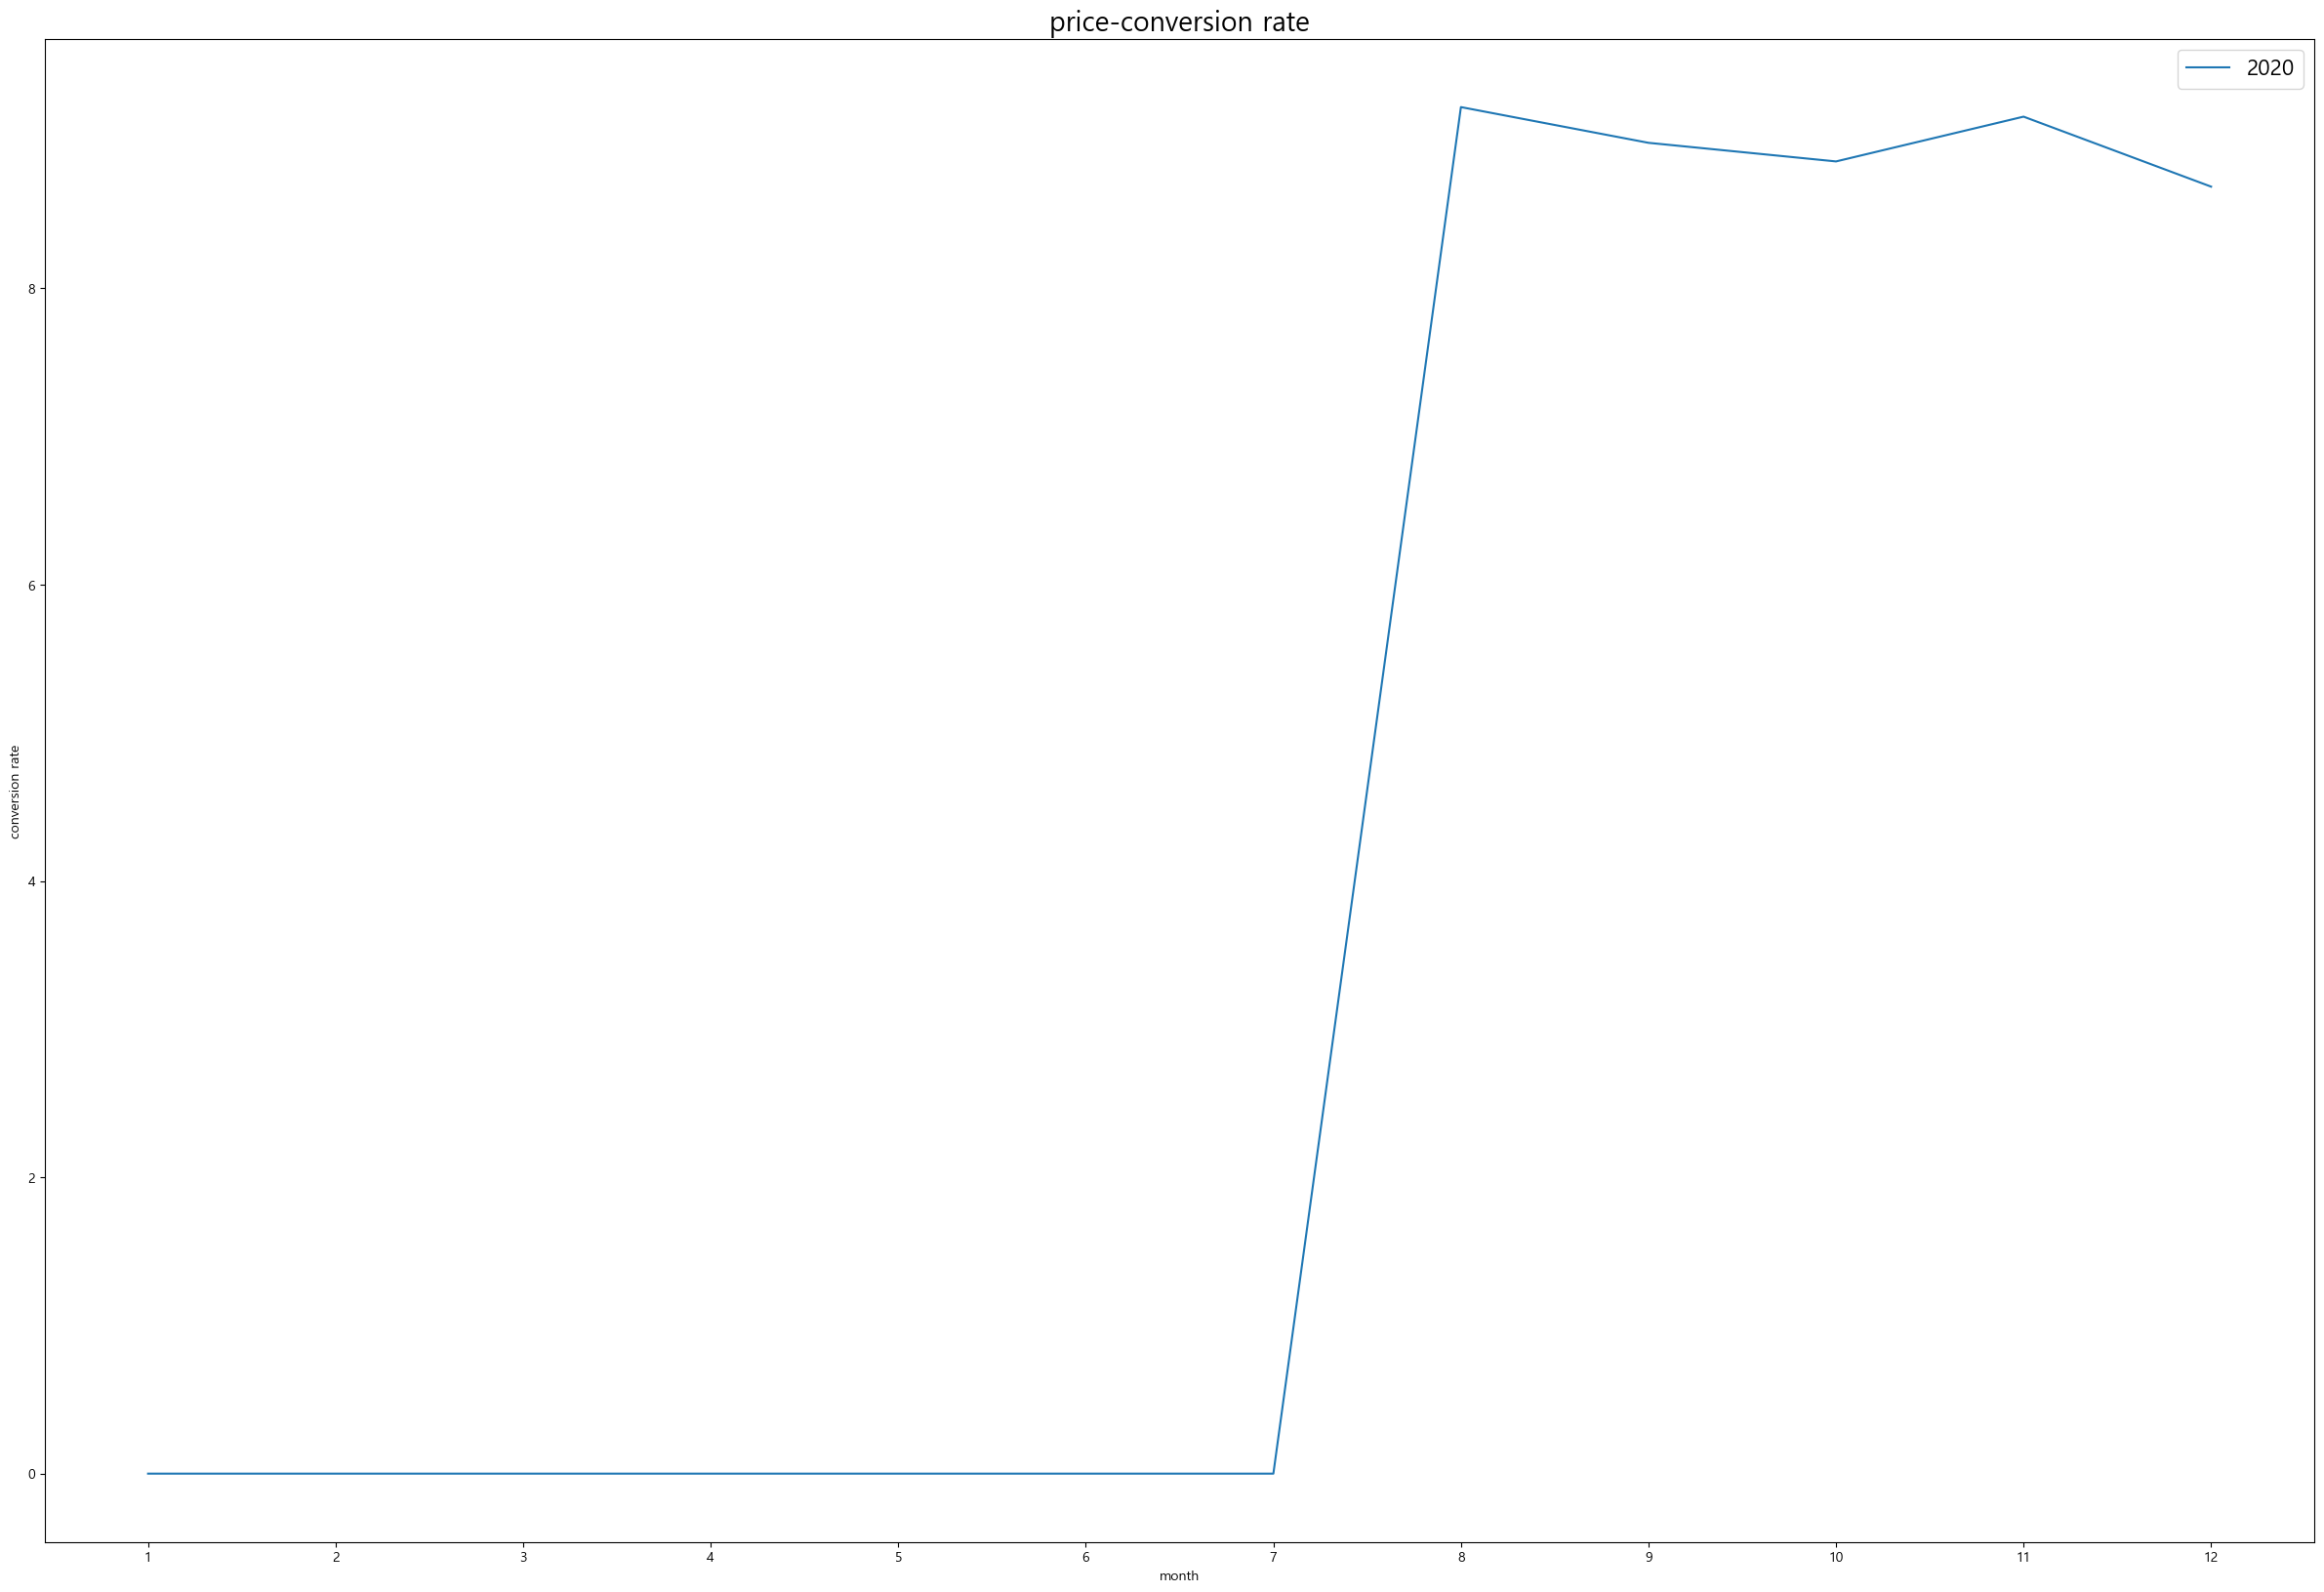

In [51]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(30,20))
plt.plot(session_month_rate_2020.month, session_month_rate_2020['rate'], label='2020')

plt.title('price-conversion rate', fontsize=20)

plt.xlabel('month')
plt.ylabel('conversion rate')
plt.xticks(session_month_rate_2020.month)

plt.legend(fontsize = 16)
plt.show()

### 상품별 구매전환율

In [61]:
product

# masterCategory : 전체 카테고리 (의류, 악세사리, 전자제품 등)
# subCategory : master의 세부 카테고리 (상의, 하의, 시계, 신발 등)
# articleType : 상품의 구체적인 유형이나 종류

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [10]:
# 연도별 총 세션수
total_session_20 = df[df['event_time'].dt.year==2020]['session_id'].nunique()
total_session_21 = df[df['event_time'].dt.year==2021]['session_id'].nunique()
total_session_22 = df[df['event_time'].dt.year==2022]['session_id'].nunique()


In [11]:
# 연도별 구매 성공 데이터프레임
success_20 = merged_pro_trans_2years[(merged_pro_trans_2years['date_year']==2020) & (merged_pro_trans_2years['payment_status'] == 'Success')]
success_21 = merged_pro_trans_2years[(merged_pro_trans_2years['date_year']==2021) & (merged_pro_trans_2years['payment_status'] == 'Success')]
success_22 = merged_pro_trans_2years[(merged_pro_trans_2years['date_year']==2022) & (merged_pro_trans_2years['payment_status'] == 'Success')]

In [12]:
success_20.groupby('masterCategory')['session_id'].size()

masterCategory
Accessories       29085
Apparel           55288
Footwear          24102
Free Items          265
Home                  1
Personal Care      6178
Sporting Goods       65
Name: session_id, dtype: int64

In [13]:
success_21.groupby('masterCategory')['session_id'].size()

masterCategory
Accessories        91454
Apparel           173921
Footwear           75090
Free Items           911
Home                   4
Personal Care      19557
Sporting Goods       215
Name: session_id, dtype: int64

In [14]:
success_22.groupby('masterCategory')['session_id'].size()

masterCategory
Accessories        68616
Apparel           131041
Footwear           56373
Free Items           620
Home                   5
Personal Care      14841
Sporting Goods       120
Name: session_id, dtype: int64

In [15]:
success_merged = pd.concat([success_20.groupby('masterCategory')['session_id'].size(),
                      success_21.groupby('masterCategory')['session_id'].size(),
                      success_22.groupby('masterCategory')['session_id'].size()], axis=1, keys=['session_id_20', 'session_id_21', 'session_id_22'])

In [16]:
success_merged

,session_id_20,session_id_21,session_id_22
masterCategory,,,
Accessories,29085,91454,68616
Apparel,55288,173921,131041
Footwear,24102,75090,56373
Free Items,265,911,620
Home,1,4,5
Personal Care,6178,19557,14841
Sporting Goods,65,215,120


In [17]:
success_merged['rate_20'] = (success_merged['session_id_20'] / total_session_20) * 100
success_merged['rate_21'] = (success_merged['session_id_21'] / total_session_21) * 100
success_merged['rate_22'] = (success_merged['session_id_22'] / total_session_22) * 100

In [18]:
success_merged

,session_id_20,session_id_21,session_id_22,rate_20,rate_21,rate_22
masterCategory,,,,,,
Accessories,29085,91454,68616,3.199758,3.186086,3.229005
Apparel,55288,173921,131041,6.082456,6.059083,6.166667
Footwear,24102,75090,56373,2.651558,2.615995,2.652861
Free Items,265,911,620,0.029154,0.031738,0.029177
Home,1,4,5,0.000110,0.000139,0.000235
Personal Care,6178,19557,14841,0.679667,0.681329,0.698404
Sporting Goods,65,215,120,0.007151,0.007490,0.005647


In [21]:
success_merged.index

Index(['Accessories', 'Apparel', 'Footwear', 'Free Items', 'Home',
       'Personal Care', 'Sporting Goods'],
      dtype='object', name='masterCategory')

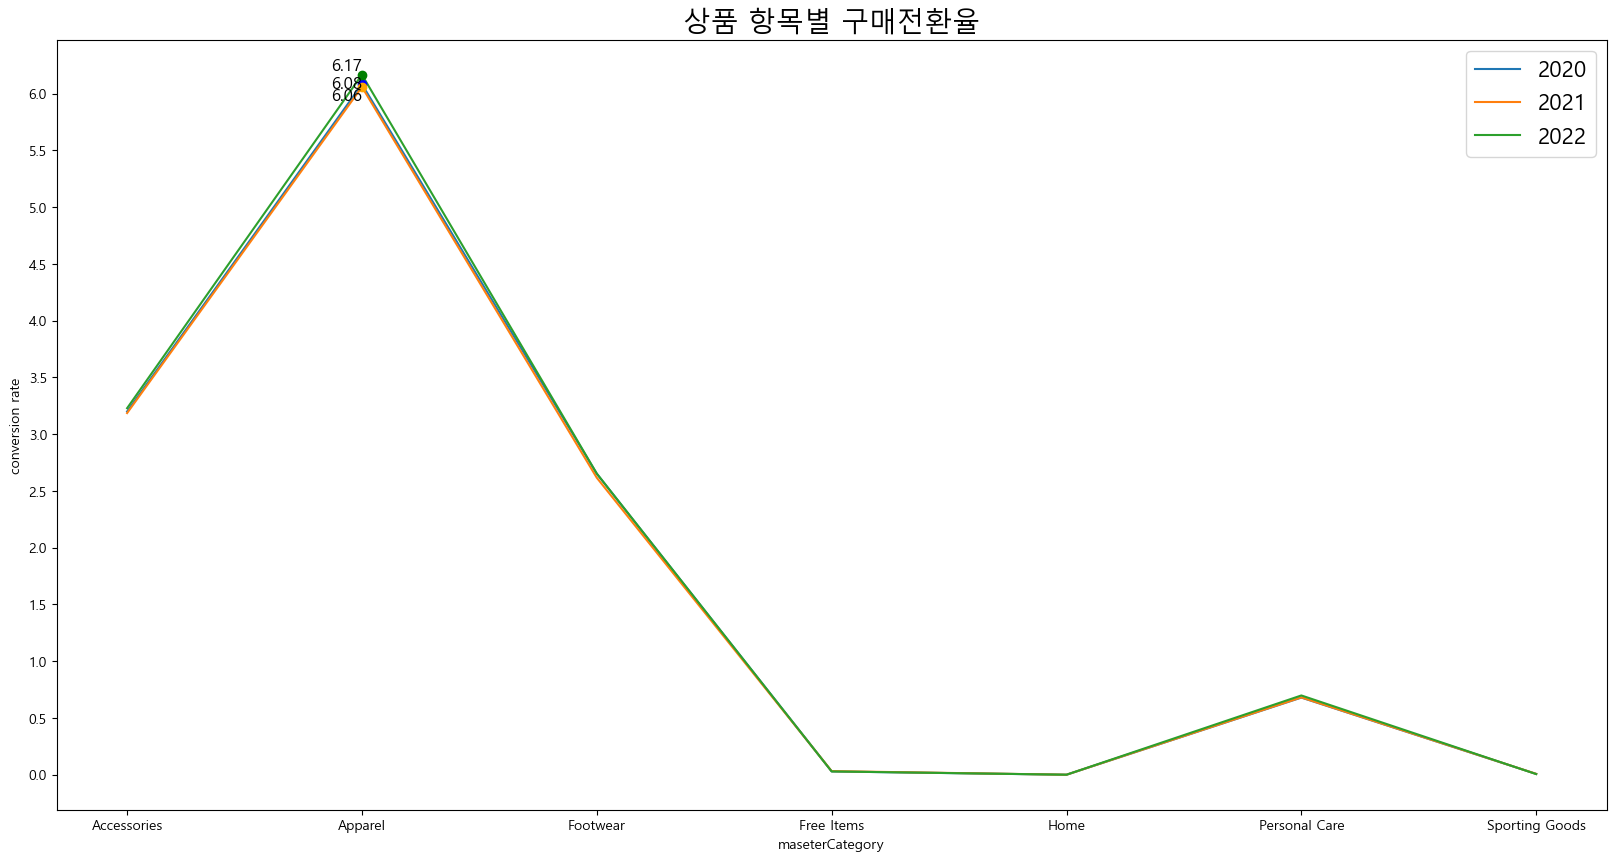

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(success_merged.index, success_merged['rate_20'], label='2020')
plt.plot(success_merged.index, success_merged['rate_21'], label='2021')
plt.plot(success_merged.index, success_merged['rate_22'], label='2022')

plt.title('상품 항목별 구매전환율', fontsize=20)

plt.xlabel('maseterCategory')
plt.ylabel('conversion rate')
plt.xticks(success_merged.index)

yticks = np.arange(0, success_merged['rate_20'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = success_merged['rate_20'].idxmax()
max_rate_2020 = success_merged.loc[max_index_2020, 'rate_20']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = success_merged['rate_21'].idxmax()
max_rate_2021 = success_merged.loc[max_index_2021, 'rate_21']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = success_merged['rate_22'].idxmax()
max_rate_2022 = success_merged.loc[max_index_2022, 'rate_22']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

#### apperal에서 상품구매전환율

In [28]:
success_20[success_20['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size()

subCategory
Apparel Set                   282
Bottomwear                   6946
Dress                        1321
Innerwear                    4674
Loungewear and Nightwear     1245
Saree                        1153
Socks                          30
Topwear                     39637
Name: session_id, dtype: int64

In [29]:
success_21[success_21['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size()

subCategory
Apparel Set                    825
Bottomwear                   21757
Dress                         3850
Innerwear                    14823
Loungewear and Nightwear      3883
Saree                         3527
Socks                          112
Topwear                     125144
Name: session_id, dtype: int64

In [30]:
success_22[success_22['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size()

subCategory
Apparel Set                   632
Bottomwear                  16626
Dress                        2955
Innerwear                   11222
Loungewear and Nightwear     2862
Saree                        2583
Socks                          79
Topwear                     94082
Name: session_id, dtype: int64

In [32]:
success_merged_Apparel = pd.concat([success_20[success_20['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size(),
                      success_21[success_21['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size(),
                      success_22[success_22['masterCategory']=='Apparel'].groupby('subCategory')['session_id'].size()], axis=1, keys=['session_id_20', 'session_id_21', 'session_id_22'])

In [33]:
success_merged_Apparel['rate_20'] = (success_merged_Apparel['session_id_20'] / total_session_20) * 100
success_merged_Apparel['rate_21'] = (success_merged_Apparel['session_id_21'] / total_session_21) * 100
success_merged_Apparel['rate_22'] = (success_merged_Apparel['session_id_22'] / total_session_22) * 100

In [34]:
success_merged_Apparel

,session_id_20,session_id_21,session_id_22,rate_20,rate_21,rate_22
subCategory,,,,,,
Apparel Set,282,825,632,0.031024,0.028741,0.029741
Bottomwear,6946,21757,16626,0.764157,0.757973,0.782404
Dress,1321,3850,2955,0.145329,0.134127,0.139060
Innerwear,4674,14823,11222,0.514206,0.516406,0.528097
Loungewear and Nightwear,1245,3883,2862,0.136967,0.135276,0.134683
Saree,1153,3527,2583,0.126846,0.122874,0.121554
Socks,30,112,79,0.003300,0.003902,0.003718
Topwear,39637,125144,94082,4.360626,4.359783,4.427411


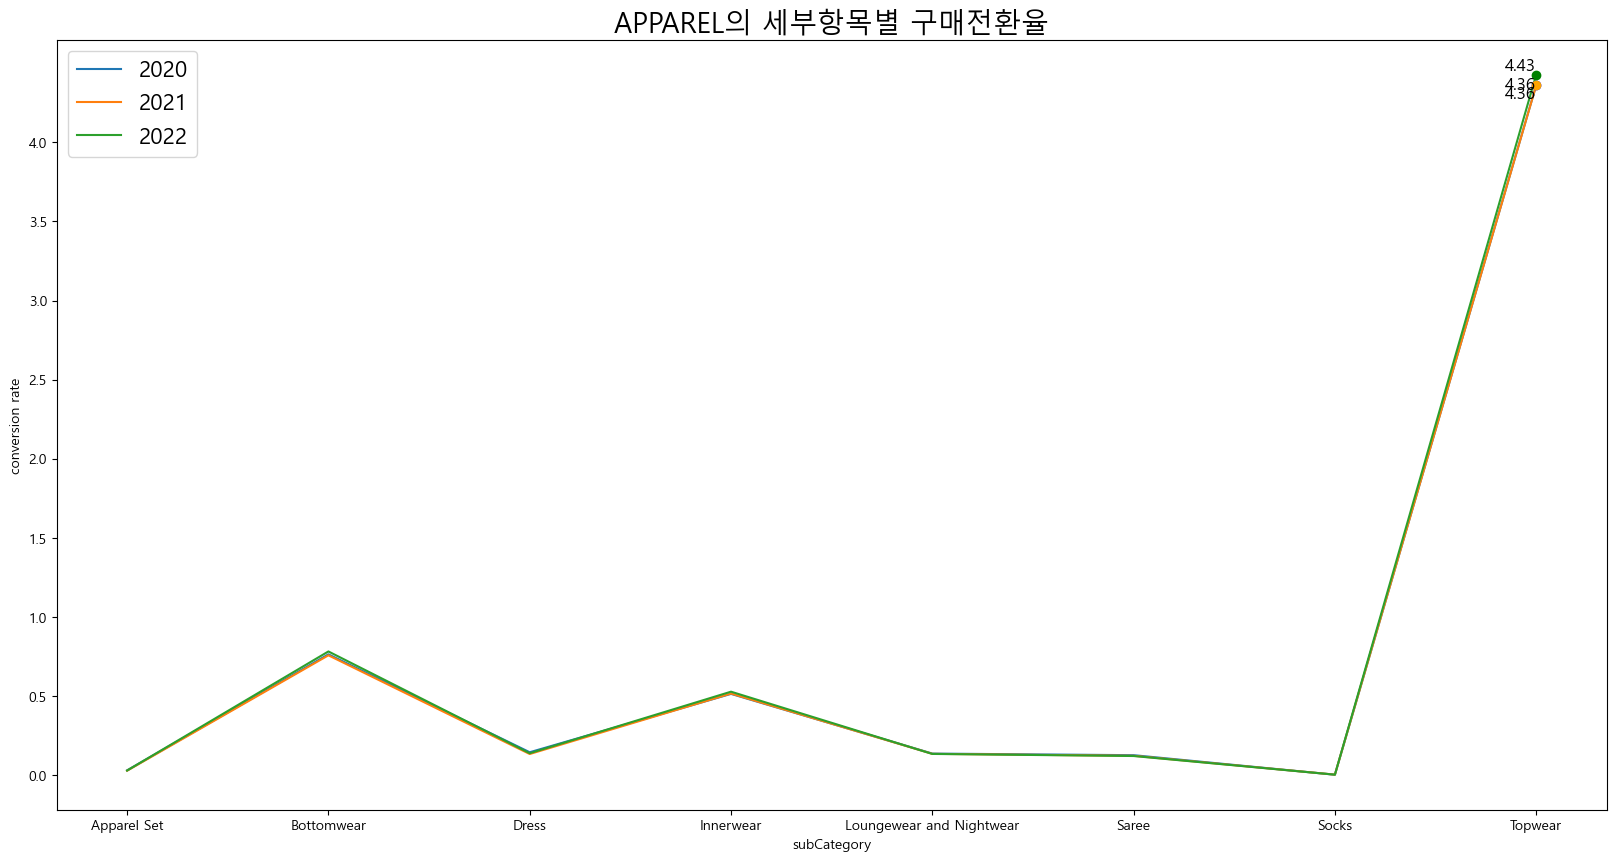

In [35]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(success_merged_Apparel.index, success_merged_Apparel['rate_20'], label='2020')
plt.plot(success_merged_Apparel.index, success_merged_Apparel['rate_21'], label='2021')
plt.plot(success_merged_Apparel.index, success_merged_Apparel['rate_22'], label='2022')

plt.title('APPAREL의 세부항목별 구매전환율', fontsize=20)

plt.xlabel('subCategory')
plt.ylabel('conversion rate')
plt.xticks(success_merged_Apparel.index)

yticks = np.arange(0, success_merged_Apparel['rate_20'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = success_merged_Apparel['rate_20'].idxmax()
max_rate_2020 = success_merged_Apparel.loc[max_index_2020, 'rate_20']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = success_merged_Apparel['rate_21'].idxmax()
max_rate_2021 = success_merged_Apparel.loc[max_index_2021, 'rate_21']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = success_merged_Apparel['rate_22'].idxmax()
max_rate_2022 = success_merged_Apparel.loc[max_index_2022, 'rate_22']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

#### Topwear의 상품구매전환율

In [36]:
success_20[success_20['subCategory']=='Topwear'].groupby('articleType')['session_id'].size()

articleType
Belts                4
Blazers             15
Dresses              5
Dupatta            306
Jackets            638
Kurtas            4730
Kurtis             605
Lehenga Choli       13
Nehru Jackets        8
Rain Jacket         42
Rompers             27
Shirts            8348
Shrug               16
Suits                4
Suspenders         108
Sweaters           708
Sweatshirts        756
Tops              4514
Tshirts          18127
Tunics             630
Waistcoat           33
Name: session_id, dtype: int64

In [38]:
success_21[success_21['subCategory']=='Topwear'].groupby('articleType')['session_id'].size()

articleType
Belts               32
Blazers             63
Dresses             11
Dupatta            970
Jackets           2087
Kurtas           15037
Kurtis            1856
Lehenga Choli       39
Nehru Jackets       48
Rain Jacket        144
Rompers             95
Shirts           26198
Shrug               47
Suits               12
Suspenders         329
Sweaters          2316
Sweatshirts       2319
Tops             14162
Tshirts          57411
Tunics            1830
Waistcoat          138
Name: session_id, dtype: int64

In [37]:
success_22[success_22['subCategory']=='Topwear'].groupby('articleType')['session_id'].size()

articleType
Belts               18
Blazers             42
Dresses             15
Dupatta            713
Jackets           1565
Kurtas           11175
Kurtis            1462
Lehenga Choli       18
Nehru Jackets       38
Rain Jacket         99
Rompers             73
Shirts           19832
Shrug               38
Suits                7
Suspenders         240
Sweaters          1724
Sweatshirts       1704
Tops             10687
Tshirts          43140
Tunics            1403
Waistcoat           89
Name: session_id, dtype: int64

In [40]:
success_merged_Topwear = pd.concat([success_20[success_20['subCategory']=='Topwear'].groupby('articleType')['session_id'].size(),
                      success_21[success_21['subCategory']=='Topwear'].groupby('articleType')['session_id'].size(),
                      success_22[success_22['subCategory']=='Topwear'].groupby('articleType')['session_id'].size()], axis=1, keys=['session_id_20', 'session_id_21', 'session_id_22'])

In [41]:
success_merged_Topwear['rate_20'] = (success_merged_Topwear['session_id_20'] / total_session_20) * 100
success_merged_Topwear['rate_21'] = (success_merged_Topwear['session_id_21'] / total_session_21) * 100
success_merged_Topwear['rate_22'] = (success_merged_Topwear['session_id_22'] / total_session_22) * 100

In [42]:
success_merged_Topwear

,session_id_20,session_id_21,session_id_22,rate_20,rate_21,rate_22
articleType,,,,,,
Belts,4,32,18,0.000440,0.001115,0.000847
Blazers,15,63,42,0.001650,0.002195,0.001976
Dresses,5,11,15,0.000550,0.000383,0.000706
Dupatta,306,970,713,0.033664,0.033793,0.033553
Jackets,638,2087,1565,0.070189,0.072707,0.073647
Kurtas,4730,15037,11175,0.520366,0.523861,0.525885
Kurtis,605,1856,1462,0.066558,0.064660,0.068800
Lehenga Choli,13,39,18,0.001430,0.001359,0.000847
Nehru Jackets,8,48,38,0.000880,0.001672,0.001788


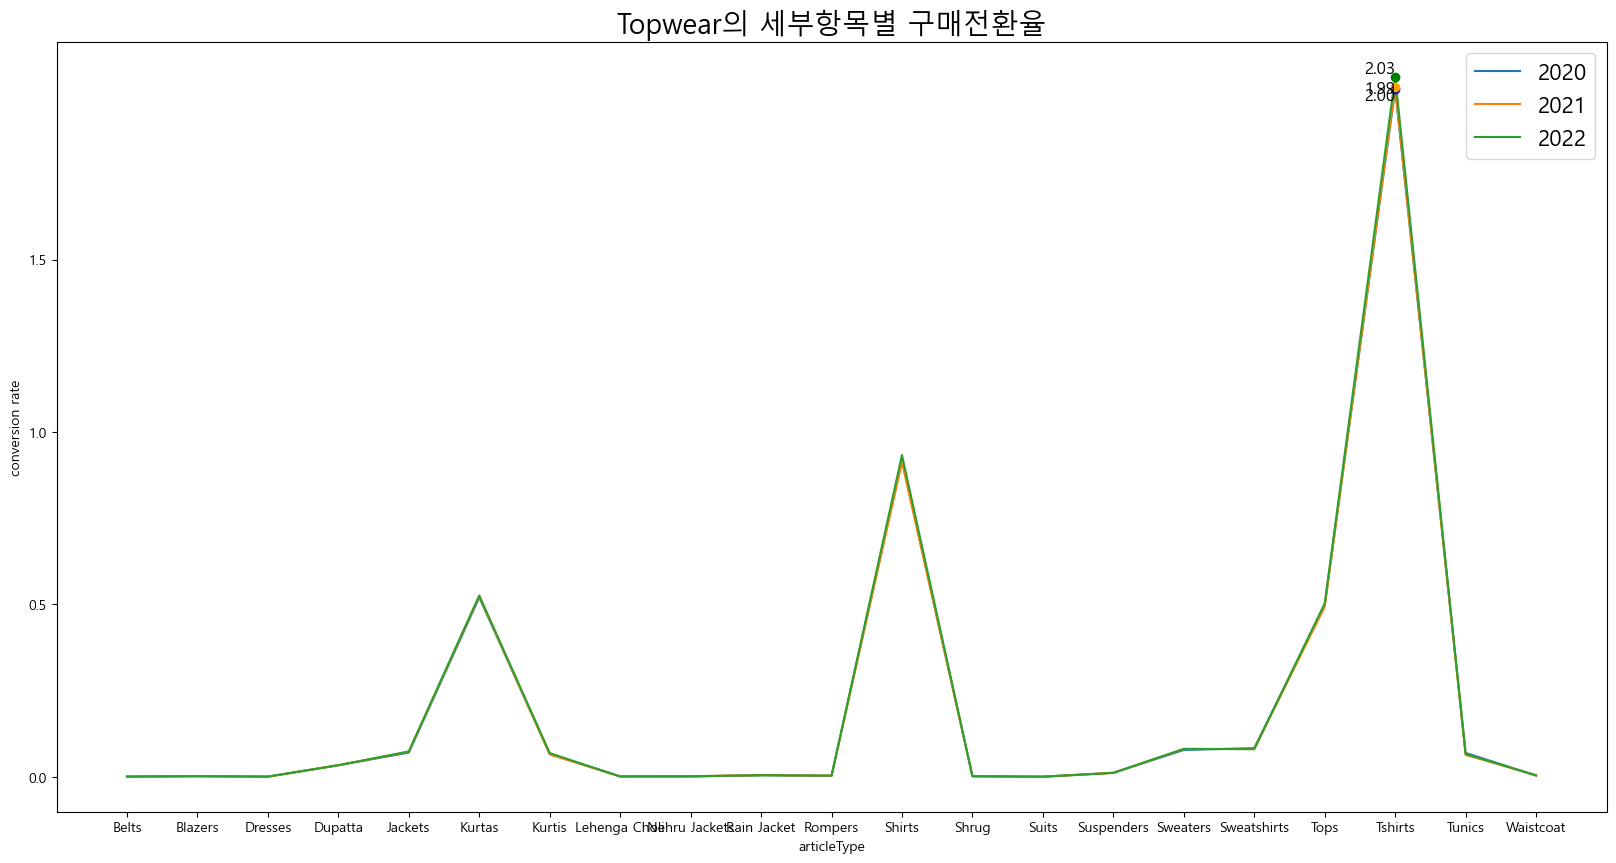

In [43]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(success_merged_Topwear.index, success_merged_Topwear['rate_20'], label='2020')
plt.plot(success_merged_Topwear.index, success_merged_Topwear['rate_21'], label='2021')
plt.plot(success_merged_Topwear.index, success_merged_Topwear['rate_22'], label='2022')

plt.title('Topwear의 세부항목별 구매전환율', fontsize=20)

plt.xlabel('articleType')
plt.ylabel('conversion rate')
plt.xticks(success_merged_Topwear.index)

yticks = np.arange(0, success_merged_Topwear['rate_20'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = success_merged_Topwear['rate_20'].idxmax()
max_rate_2020 = success_merged_Topwear.loc[max_index_2020, 'rate_20']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = success_merged_Topwear['rate_21'].idxmax()
max_rate_2021 = success_merged_Topwear.loc[max_index_2021, 'rate_21']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = success_merged_Topwear['rate_22'].idxmax()
max_rate_2022 = success_merged_Topwear.loc[max_index_2022, 'rate_22']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

#### 악세사리 구매전환율

In [50]:
success_20[success_20['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size()

subCategory
Accessories            332
Bags                  7838
Belts                 2127
Cufflinks              275
Eyewear               2813
Gloves                  45
Headwear               724
Jewellery             2818
Mufflers               105
Scarves                312
Shoe Accessories        55
Socks                 1716
Sports Accessories      10
Stoles                 242
Ties                   626
Umbrellas               15
Wallets               2417
Watches               6595
Water Bottle            20
Name: session_id, dtype: int64

In [51]:
success_21[success_21['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size()

subCategory
Accessories            1060
Bags                  24744
Belts                  6532
Cufflinks               830
Eyewear                8696
Gloves                  155
Headwear               2361
Jewellery              8620
Mufflers                312
Perfumes                 11
Scarves                 939
Shoe Accessories        186
Socks                  5686
Sports Accessories       29
Stoles                  769
Ties                   2054
Umbrellas                51
Wallets                7609
Watches               20752
Water Bottle             58
Name: session_id, dtype: int64

In [52]:
success_22[success_22['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size()

subCategory
Accessories             778
Bags                  18788
Belts                  5047
Cufflinks               676
Eyewear                6427
Gloves                  142
Headwear               1758
Jewellery              6554
Mufflers                228
Perfumes                  7
Scarves                 753
Shoe Accessories        162
Socks                  4222
Sports Accessories       16
Stoles                  564
Ties                   1563
Umbrellas                40
Wallets                5721
Watches               15127
Water Bottle             43
Name: session_id, dtype: int64

In [53]:
success_merged_Acc = pd.concat([success_20[success_20['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size(),
                      success_21[success_21['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size(),
                      success_22[success_22['masterCategory']=='Accessories'].groupby('subCategory')['session_id'].size()], axis=1, keys=['session_id_20', 'session_id_21', 'session_id_22'])

In [54]:
success_merged_Acc['rate_20'] = (success_merged_Acc['session_id_20'] / total_session_20) * 100
success_merged_Acc['rate_21'] = (success_merged_Acc['session_id_21'] / total_session_21) * 100
success_merged_Acc['rate_22'] = (success_merged_Acc['session_id_22'] / total_session_22) * 100

In [55]:
success_merged_Acc

,session_id_20,session_id_21,session_id_22,rate_20,rate_21,rate_22
subCategory,,,,,,
Accessories,332.0,1060,778,0.036525,0.036928,0.036612
Bags,7838.0,24744,18788,0.862290,0.862035,0.884146
Belts,2127.0,6532,5047,0.234000,0.227563,0.237507
Cufflinks,275.0,830,676,0.030254,0.028916,0.031812
Eyewear,2813.0,8696,6427,0.309469,0.302952,0.302449
Gloves,45.0,155,142,0.004951,0.005400,0.006682
Headwear,724.0,2361,1758,0.079650,0.082253,0.082730
Jewellery,2818.0,8620,6554,0.310020,0.300305,0.308425
Mufflers,105.0,312,228,0.011551,0.010869,0.010729


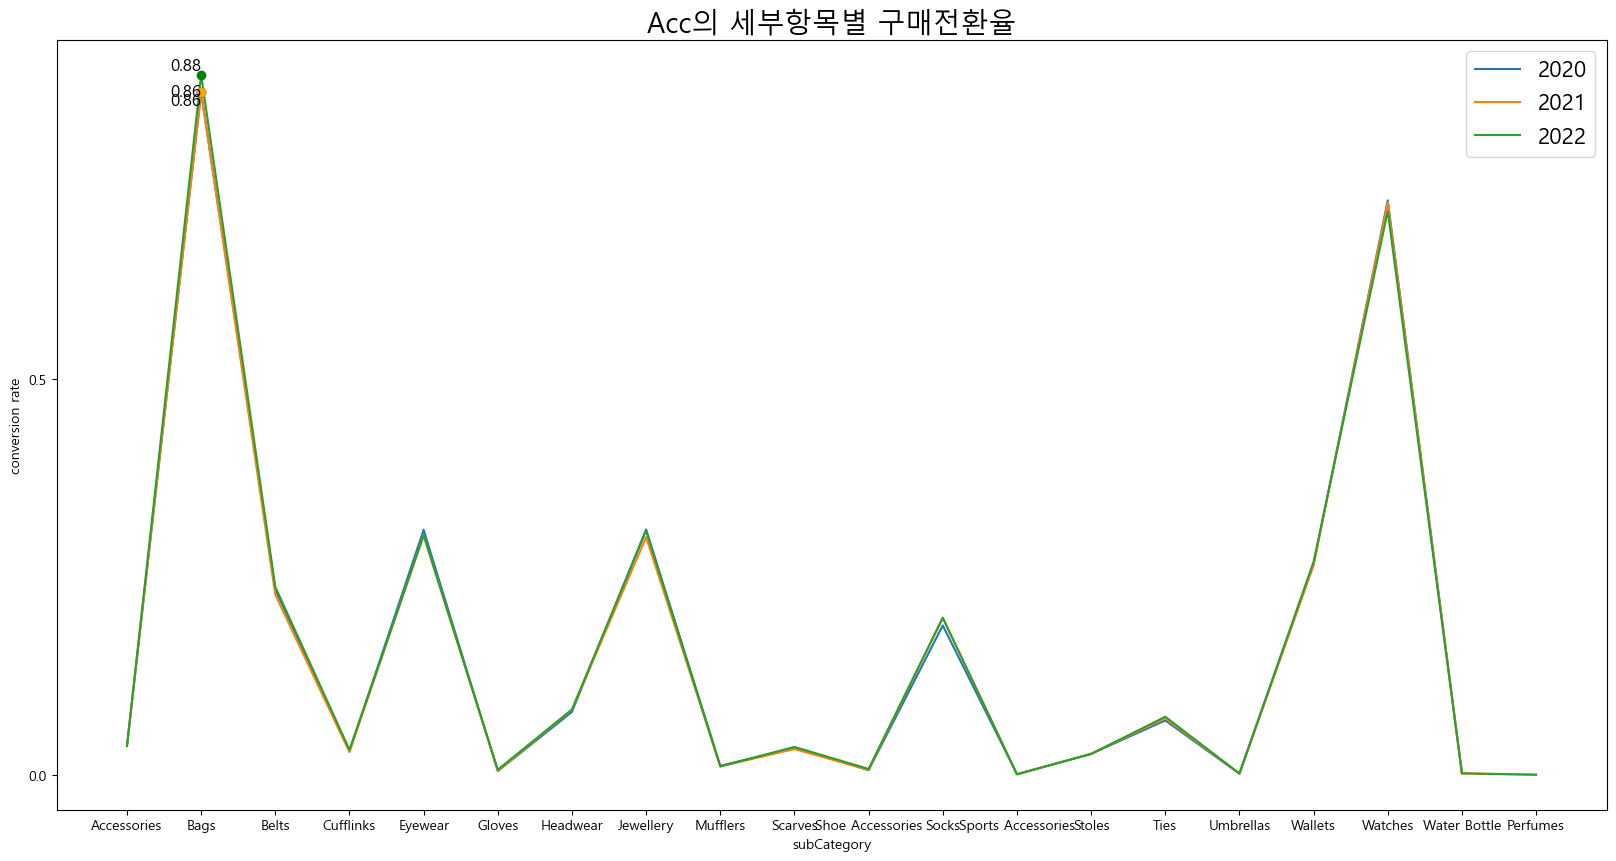

In [56]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(success_merged_Acc.index, success_merged_Acc['rate_20'], label='2020')
plt.plot(success_merged_Acc.index, success_merged_Acc['rate_21'], label='2021')
plt.plot(success_merged_Acc.index, success_merged_Acc['rate_22'], label='2022')

plt.title('Acc의 세부항목별 구매전환율', fontsize=20)

plt.xlabel('subCategory')
plt.ylabel('conversion rate')
plt.xticks(success_merged_Acc.index)

yticks = np.arange(0, success_merged_Acc['rate_20'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = success_merged_Acc['rate_20'].idxmax()
max_rate_2020 = success_merged_Acc.loc[max_index_2020, 'rate_20']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = success_merged_Acc['rate_21'].idxmax()
max_rate_2021 = success_merged_Acc.loc[max_index_2021, 'rate_21']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = success_merged_Acc['rate_22'].idxmax()
max_rate_2022 = success_merged_Acc.loc[max_index_2022, 'rate_22']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

#### Bags의 구매전환율

In [57]:
success_20[success_20['subCategory']=='Bags'].groupby('articleType')['session_id'].size()

articleType
Backpacks        1819
Clutches          732
Duffel Bag        218
Handbags         4574
Laptop Bag        202
Messenger Bag      81
Mobile Pouch      131
Rucksacks          27
Tablet Sleeve       7
Trolley Bag         6
Waist Pouch        35
Wallets             6
Name: session_id, dtype: int64

In [59]:
success_merged_bags = pd.concat([success_20[success_20['subCategory']=='Bags'].groupby('articleType')['session_id'].size(),
                      success_21[success_21['subCategory']=='Bags'].groupby('articleType')['session_id'].size(),
                      success_22[success_22['subCategory']=='Bags'].groupby('articleType')['session_id'].size()], axis=1, keys=['session_id_20', 'session_id_21', 'session_id_22'])

In [60]:
success_merged_bags['rate_20'] = (success_merged_bags['session_id_20'] / total_session_20) * 100
success_merged_bags['rate_21'] = (success_merged_bags['session_id_21'] / total_session_21) * 100
success_merged_bags['rate_22'] = (success_merged_bags['session_id_22'] / total_session_22) * 100

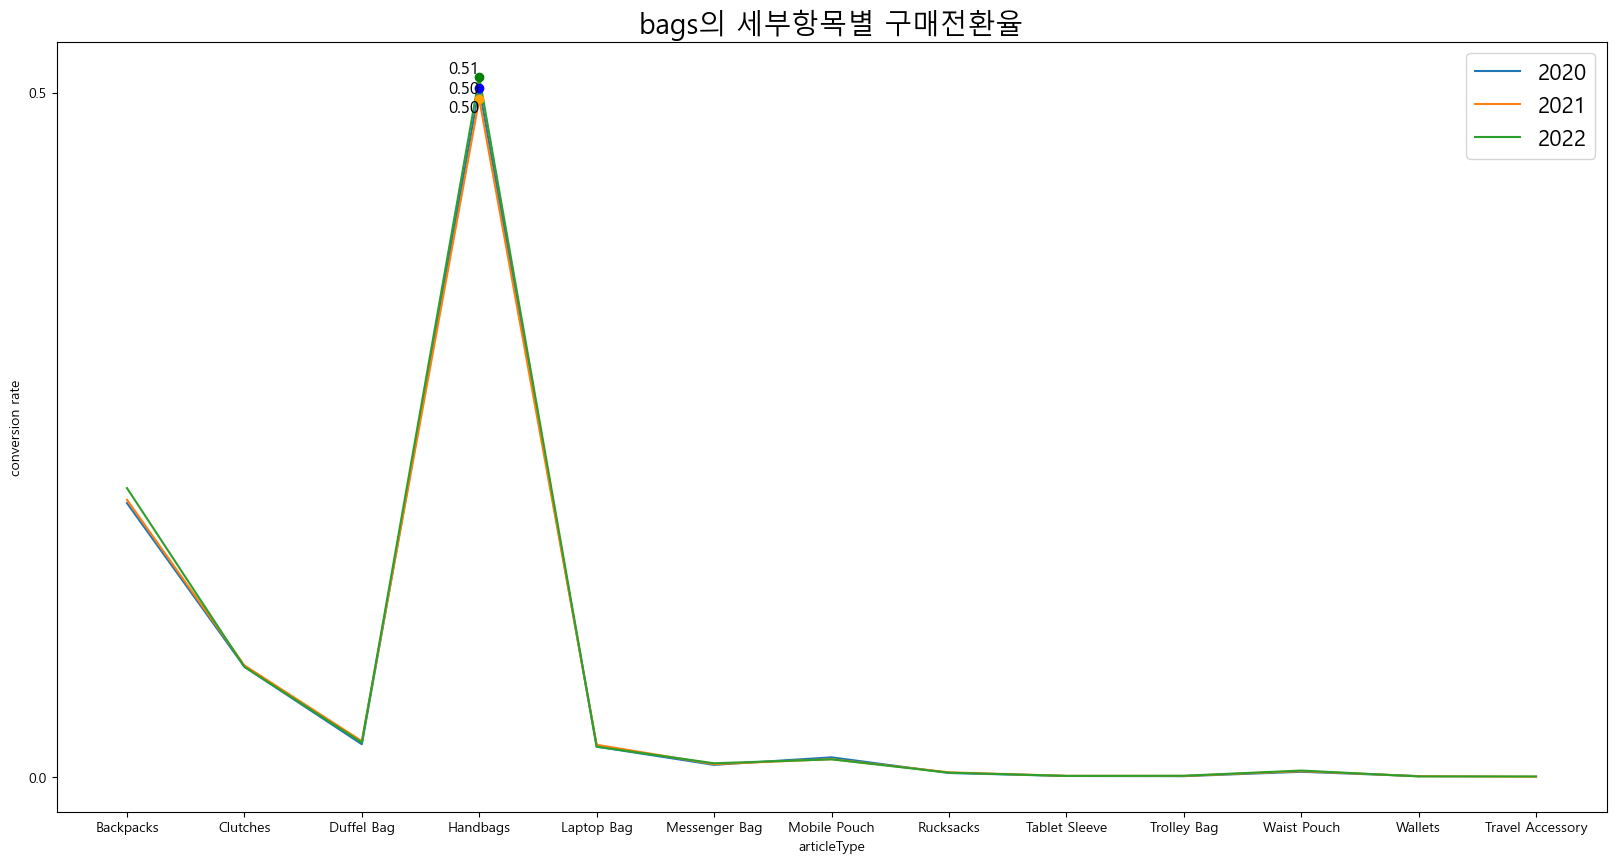

In [61]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 20,21,22년도 가격별 구매 전환율
plt.figure(figsize=(20,10))
plt.plot(success_merged_bags.index, success_merged_bags['rate_20'], label='2020')
plt.plot(success_merged_bags.index, success_merged_bags['rate_21'], label='2021')
plt.plot(success_merged_bags.index, success_merged_bags['rate_22'], label='2022')

plt.title('bags의 세부항목별 구매전환율', fontsize=20)

plt.xlabel('articleType')
plt.ylabel('conversion rate')
plt.xticks(success_merged_bags.index)

yticks = np.arange(0, success_merged_bags['rate_20'].max(), 0.5)
plt.yticks(yticks)

max_index_2020 = success_merged_bags['rate_20'].idxmax()
max_rate_2020 = success_merged_bags.loc[max_index_2020, 'rate_20']
plt.text(max_index_2020, max_rate_2020, f'{max_rate_2020:.2f}', ha='right', va='center', fontsize=12)
plt.plot(max_index_2020, max_rate_2020, 'o', color='blue')

max_index_2021 = success_merged_bags['rate_21'].idxmax()
max_rate_2021 = success_merged_bags.loc[max_index_2021, 'rate_21']
plt.text(max_index_2021, max_rate_2021, f'{max_rate_2021:.2f}', ha='right', va='top', fontsize=12)
plt.plot(max_index_2021, max_rate_2021, 'o', color='orange')

max_index_2022 = success_merged_bags['rate_22'].idxmax()
max_rate_2022 = success_merged_bags.loc[max_index_2022, 'rate_22']
plt.text(max_index_2022, max_rate_2022, f'{max_rate_2022:.2f}', ha='right', va='bottom', fontsize=12)
plt.plot(max_index_2022, max_rate_2022, 'o', color='green')

plt.legend(fontsize = 16)
plt.show()

#### watch의 구매전환율

In [62]:
success_20[success_20['subCategory']=='Watches'].groupby('articleType')['session_id'].size()

articleType
Watches    6595
Name: session_id, dtype: int64

### 상품 판매건수

In [11]:
product_count = merged_pro_trans_2years[['customer_id','session_id','product_id','quantity','item_price','masterCategory','subCategory','usage']]

In [12]:
product_count

,customer_id,session_id,product_id,quantity,item_price,masterCategory,subCategory,usage
0,4774,e1a22441-74b7-409a-87eb-85b3192e5bed,43711,1,165789,Accessories,Jewellery,Ethnic
1,4774,31dc3335-0759-428f-963a-80b8684c1fe5,4063,1,118487,Apparel,Topwear,Casual
2,4774,5fc7f66d-d6d5-4245-9b05-72f39ae75640,46728,1,108259,Personal Care,Fragrance,Casual
3,4774,5fc7f66d-d6d5-4245-9b05-72f39ae75640,36558,1,158359,Apparel,Topwear,Casual
4,4774,8f3c25e3-6529-469f-9b47-2acac609d93a,31302,1,174419,Apparel,Topwear,Formal
...,...,...,...,...,...,...,...,...
781561,99675,0aa7c9aa-517e-4c79-b691-137861f4e9af,35318,1,488722,Accessories,Jewellery,Ethnic
781562,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,42915,1,277688,Accessories,Belts,Casual
781563,25121,484eecde-9f4a-42de-a8df-7ce6668101f4,30642,2,113410,Apparel,Topwear,Casual
781564,34829,954e1211-4d45-4d0b-ba84-53e80119592c,19394,1,354213,Apparel,Topwear,Casual


In [13]:
sales_by_product = product_count.groupby('product_id')['quantity'].sum()

In [14]:
sales_by_product

product_id
1163     28
1164     15
1165     19
1525     37
1526     23
         ..
59995    13
59996    23
59998    28
59999    14
60000    21
Name: quantity, Length: 44446, dtype: int64

In [15]:
sales_by_product.index

Index([ 1163,  1164,  1165,  1525,  1526,  1528,  1529,  1530,  1531,  1532,
       ...
       59990, 59991, 59992, 59993, 59994, 59995, 59996, 59998, 59999, 60000],
      dtype='int64', name='product_id', length=44446)

In [17]:
sales_by_product_df = pd.DataFrame({'product_id': sales_by_product.index, 'sales': sales_by_product.values})
sales_by_product_df = sales_by_product_df.rename(columns={'product_id':'id'})

product = product.merge(sales_by_product_df, how='left', on='id')
product['sales'] = product['sales'].fillna(0)

In [18]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,sales
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,33
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,17
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,30
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,31
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,23
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,28
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,43
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,15
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,15


In [26]:
# 상품 개수
print(product.groupby('gender').size().sort_values(ascending=False))
print('--------------------')
print(product.groupby('usage').size().sort_values(ascending=False))
print('--------------------')
print(product.groupby('masterCategory').size().sort_values(ascending=False))
print('--------------------')
print(product.groupby('subCategory').size().sort_values(ascending=False))
print('--------------------')
print(product.groupby('articleType').size().sort_values(ascending=False))

gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
dtype: int64
--------------------
usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
dtype: int64
--------------------
masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
dtype: int64
--------------------
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                     

In [25]:
# 최근 2년간 상품 총판매량 (판매건수)
print(product.groupby('gender')['sales'].sum().sort_values(ascending=False))
print('--------------------')
print(product.groupby('usage')['sales'].sum().sort_values(ascending=False))
print('--------------------')
print(product.groupby('masterCategory')['sales'].sum().sort_values(ascending=False))
print('--------------------')
print(product.groupby('subCategory')['sales'].sum().sort_values(ascending=False))
print('--------------------')
print(product.groupby('articleType')['sales'].sum().sort_values(ascending=False))

gender
Men       575198
Women     482978
Unisex     55379
Boys       21536
Girls      16511
Name: sales, dtype: int64
--------------------
usage
Casual          891141
Sports          105136
Ethnic           83324
Formal           60401
Smart Casual      1731
Party              843
Travel             724
Home                19
Name: sales, dtype: int64
--------------------
masterCategory
Apparel           554310
Accessories       291212
Footwear          239909
Personal Care      62774
Free Items          2755
Sporting Goods       623
Home                  19
Name: sales, dtype: int64
--------------------
subCategory
Topwear                     398981
Shoes                       191631
Bags                         79170
Bottomwear                   69198
Watches                      65636
Innerwear                    47238
Eyewear                      27884
Jewellery                    27792
Fragrance                    26152
Sandal                       24490
Wallets                  

In [27]:
product[product['masterCategory']=='Free Items']

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,sales
352,53598,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Sports,Q&Q Men Black Digital Watch,27
826,49696,Men,Free Items,Free Gifts,Ties,Blue,Summer,2012.0,Formal,Park Avenue Blue Patterned Tie,28
874,53591,Men,Free Items,Free Gifts,Free Gifts,White,Winter,2016.0,Casual,Q&Q Men White Dial Watch,33
1137,45894,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Casual,Maxima Men Black Dial Watch,24
1360,53596,Men,Free Items,Free Gifts,Free Gifts,Navy Blue,Winter,2016.0,Casual,Q&Q Men Navy Blue Digital Watch,30
...,...,...,...,...,...,...,...,...,...,...,...
43321,54969,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Dynamic Energy Deo,35
43803,54967,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Olympic Flame Deo,31
44004,36346,Men,Free Items,Free Gifts,Free Gifts,Maroon,Summer,2012.0,Casual,Reid & Taylor Men Maroon Checked Tie,26
44303,51081,Women,Free Items,Free Gifts,Free Gifts,Yellow,Summer,2012.0,Ethnic,Satya Paul Yellow & Black Saree,19


#### 5년간 product 판매량 추이

In [35]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [54]:
product_count = pd.read_csv('product.csv', on_bad_lines='skip')

In [55]:
# 5년간의 데이터셋
years = ['2018', '2019', '2020','2021','2022']

product_sales_by_year = {}

for year in years:
    product_sales_by_year[year] = transaction[transaction['created_at'].str[:4] == year].groupby('product_id')['quantity'].sum()


In [56]:
product_sales_by_year

{'2018': product_id
 1163     3
 1164     5
 1525     4
 1526     2
 1528     1
         ..
 59994    1
 59995    5
 59996    1
 59999    1
 60000    1
 Name: quantity, Length: 40490, dtype: int64,
 '2019': product_id
 1163      2
 1164      3
 1165      7
 1525      4
 1526      5
          ..
 59995     7
 59996     4
 59998     2
 59999    10
 60000    19
 Name: quantity, Length: 43462, dtype: int64,
 '2020': product_id
 1163     11
 1164      4
 1165      7
 1525      3
 1526      2
          ..
 59995     5
 59996     3
 59998    10
 59999     6
 60000    12
 Name: quantity, Length: 44292, dtype: int64,
 '2021': product_id
 1163     10
 1164      8
 1165     10
 1525     30
 1526     12
          ..
 59995     5
 59996     5
 59998     7
 59999     6
 60000    11
 Name: quantity, Length: 44442, dtype: int64,
 '2022': product_id
 1163     11
 1164      6
 1165      5
 1525      5
 1526     10
          ..
 59995     3
 59996    15
 59998    14
 59999     6
 60000     8
 Name: quant

In [57]:
product_sales_df = pd.DataFrame(product_sales_by_year, dtype=int)

product_count = product_count.merge(product_sales_df, how='left', left_on='id', right_index=True)


In [61]:
# 5년간의 데이터셋
years = ['2018', '2019', '2020','2021','2022']

for year in years:
    product_count[year] = product_count[year].fillna(0).astype('int')


In [62]:
product_count

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,2018,2019,2020,2021,2022
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,2,2,5,25,7
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,7,4,9,8,5
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,14,2,9,16,10
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,4,2,10,13,16
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,1,2,14,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,3,3,8,11,16
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,1,7,7,19,22
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,7,15,4,5,8
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,1,10,4,10,2


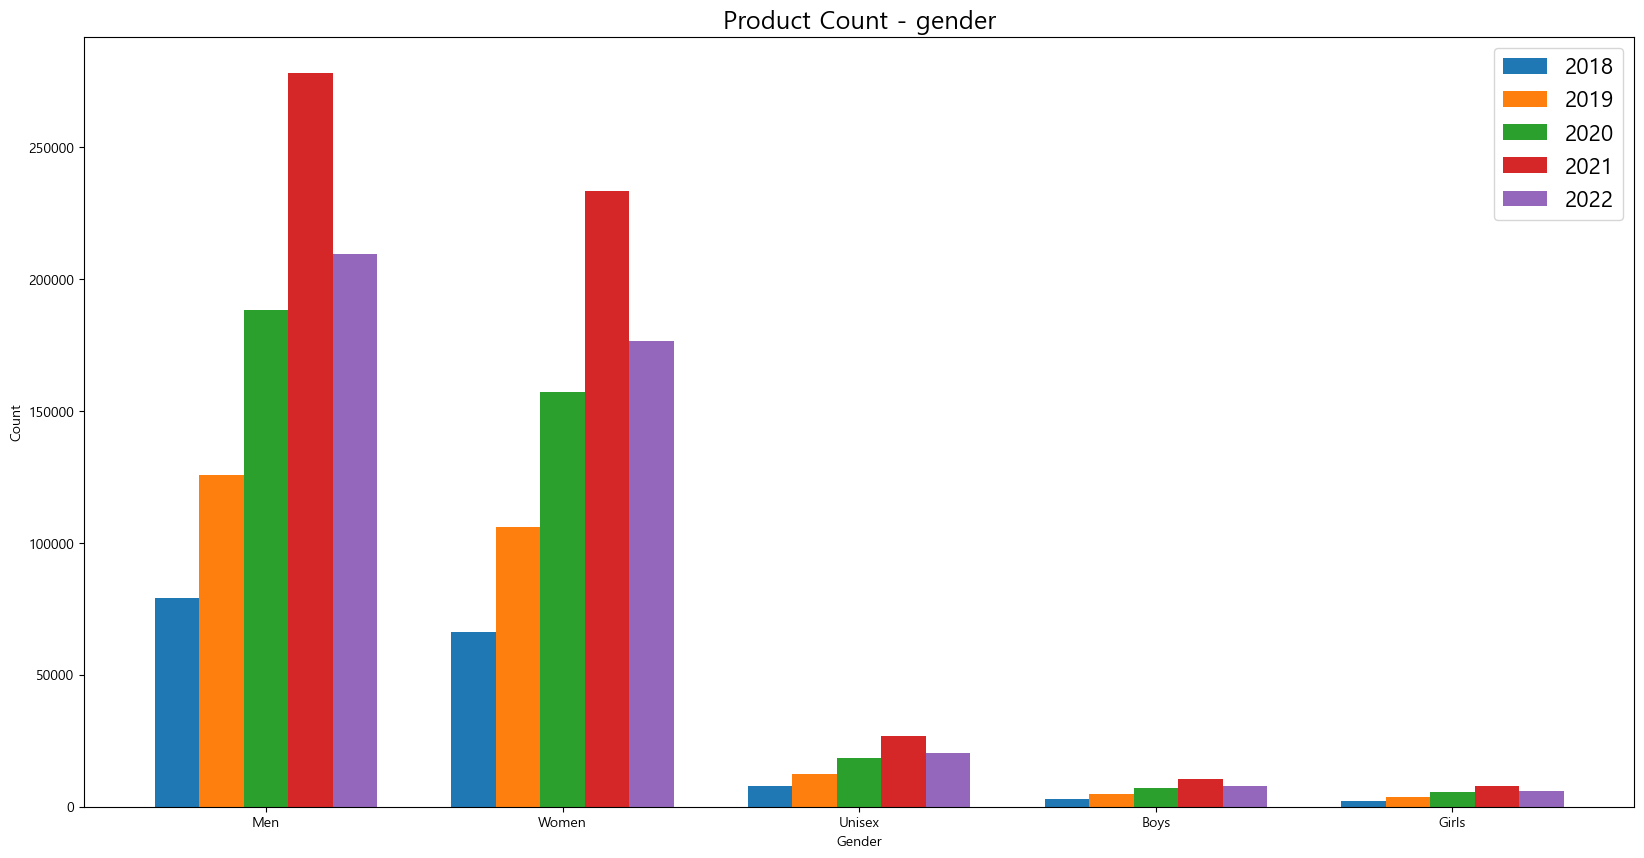

In [94]:
import matplotlib.pyplot as plt

# 연도별 gender 상품 판매 개수
plt.rcParams['font.family'] = 'Malgun Gothic'

y1 = product_count.groupby('gender')['2018'].sum().sort_values(ascending=False)
y2 = product_count.groupby('gender')['2019'].sum().sort_values(ascending=False)
y3 = product_count.groupby('gender')['2020'].sum().sort_values(ascending=False)
y4 = product_count.groupby('gender')['2021'].sum().sort_values(ascending=False)
y5 = product_count.groupby('gender')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - gender', fontsize=18)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()


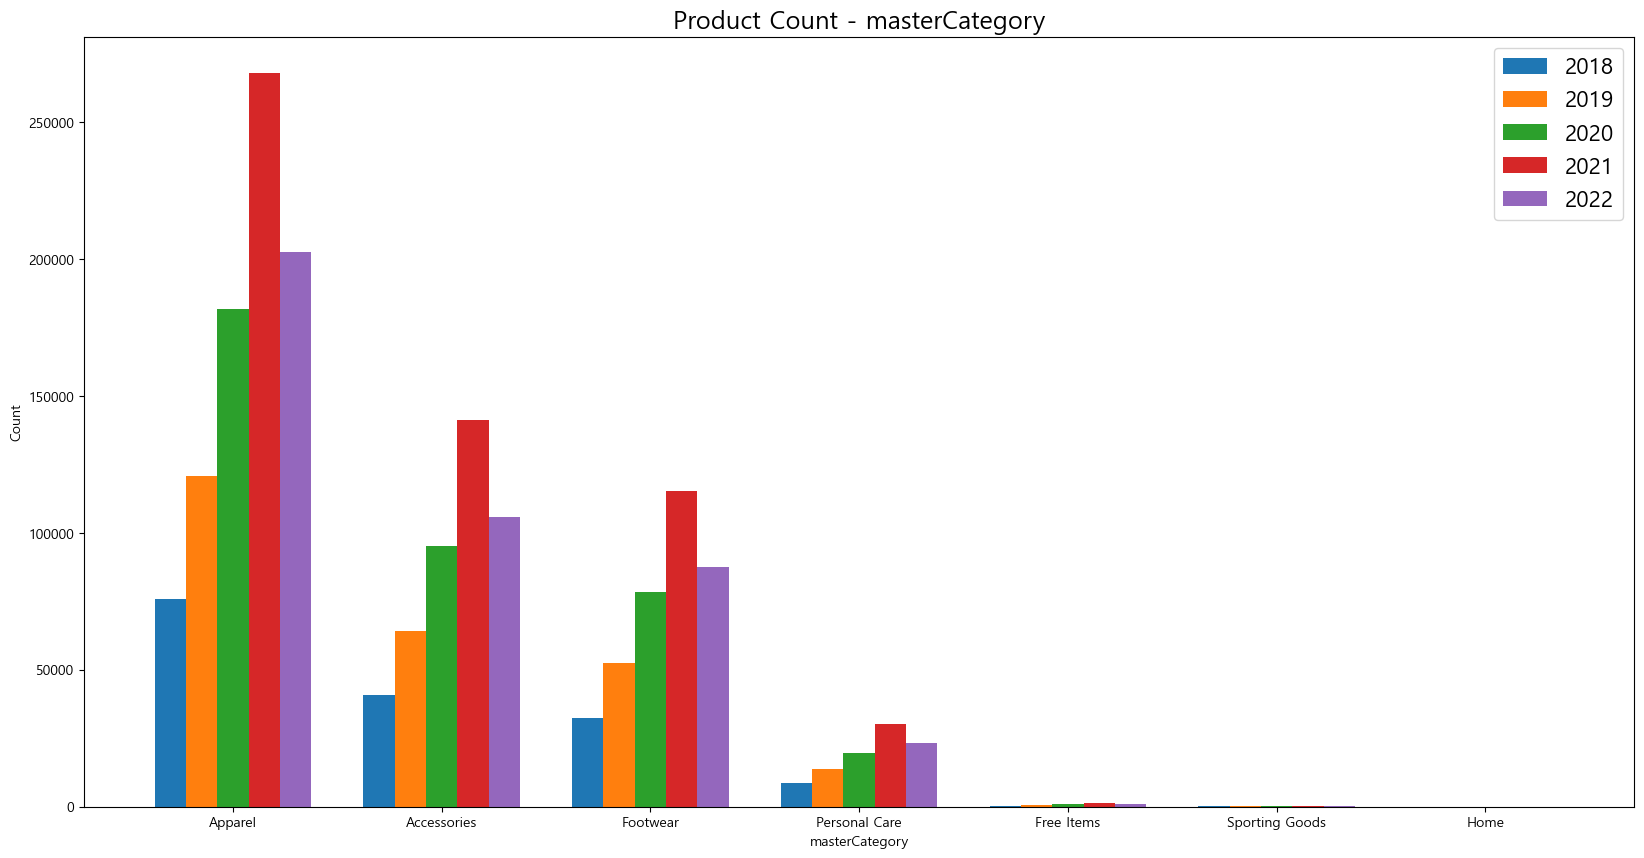

In [95]:
import matplotlib.pyplot as plt

# 연도별 masterCategory 상품 판매 개수
plt.rcParams['font.family'] = 'Malgun Gothic'

y1 = product_count.groupby('masterCategory')['2018'].sum().sort_values(ascending=False)
y2 = product_count.groupby('masterCategory')['2019'].sum().sort_values(ascending=False)
y3 = product_count.groupby('masterCategory')['2020'].sum().sort_values(ascending=False)
y4 = product_count.groupby('masterCategory')['2021'].sum().sort_values(ascending=False)
y5 = product_count.groupby('masterCategory')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - masterCategory', fontsize=18)
plt.xlabel('masterCategory')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()


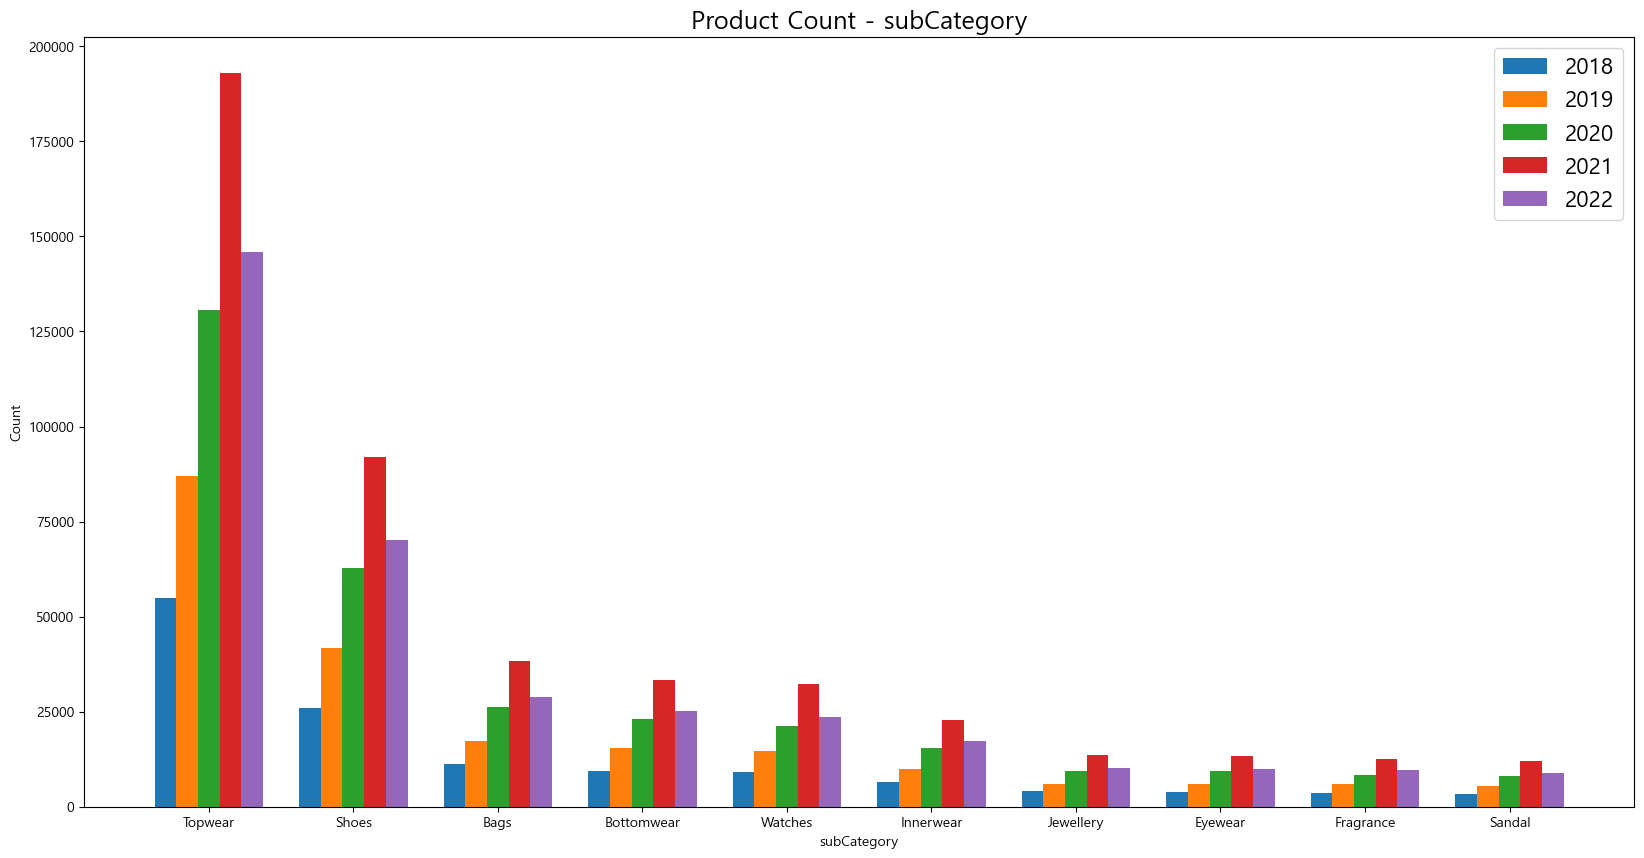

In [96]:
import matplotlib.pyplot as plt

# 연도별 season 상품 판매 개수
plt.rcParams['font.family'] = 'Malgun Gothic'

y1 = product_count.groupby('subCategory')['2018'].sum().sort_values(ascending=False).head(10)
y2 = product_count.groupby('subCategory')['2019'].sum().sort_values(ascending=False).head(10)
y3 = product_count.groupby('subCategory')['2020'].sum().sort_values(ascending=False).head(10)
y4 = product_count.groupby('subCategory')['2021'].sum().sort_values(ascending=False).head(10)
y5 = product_count.groupby('subCategory')['2022'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - subCategory', fontsize=18)
plt.xlabel('subCategory')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()


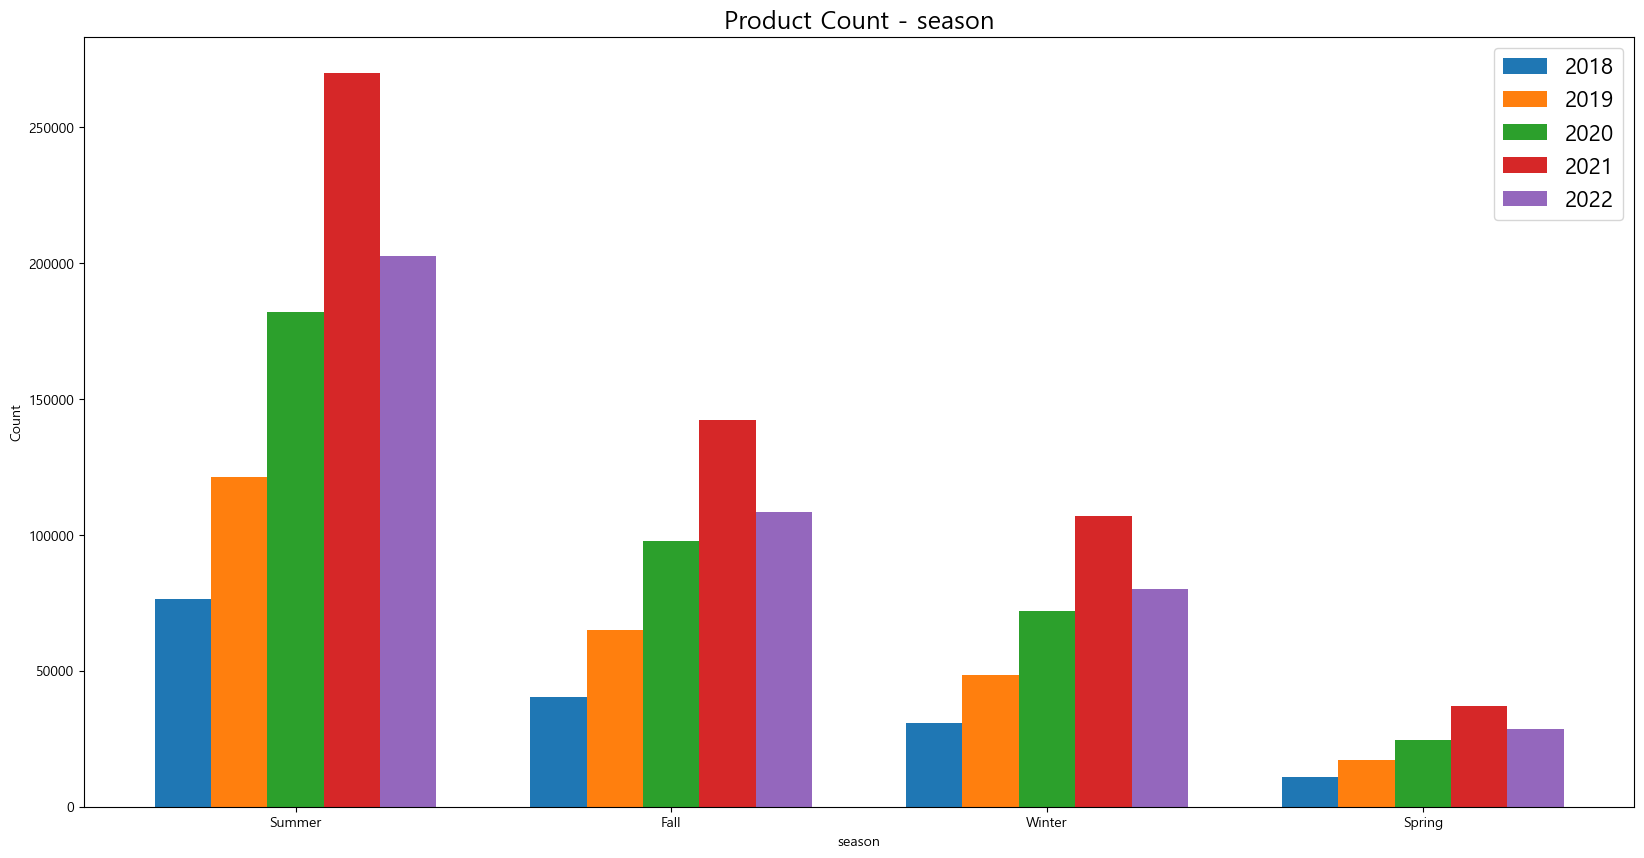

In [98]:
import matplotlib.pyplot as plt

# 연도별 season 상품 판매 개수
plt.rcParams['font.family'] = 'Malgun Gothic'

y1 = product_count.groupby('season')['2018'].sum().sort_values(ascending=False)
y2 = product_count.groupby('season')['2019'].sum().sort_values(ascending=False)
y3 = product_count.groupby('season')['2020'].sum().sort_values(ascending=False)
y4 = product_count.groupby('season')['2021'].sum().sort_values(ascending=False)
y5 = product_count.groupby('season')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - season', fontsize=18)
plt.xlabel('season')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()


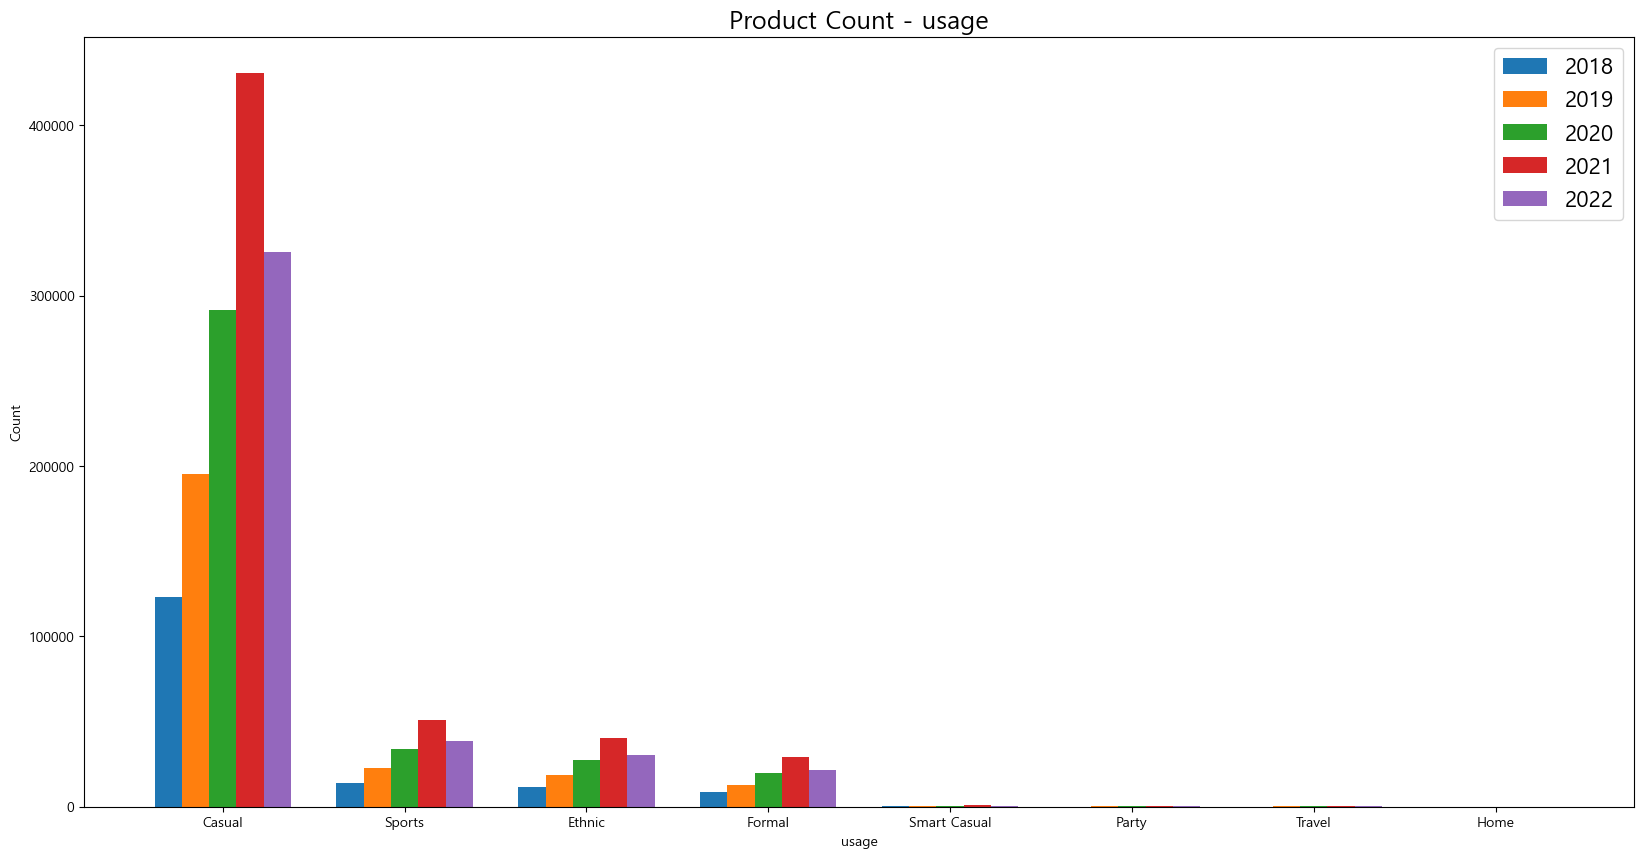

In [99]:
import matplotlib.pyplot as plt

# 연도별 usage 상품 판매 개수
plt.rcParams['font.family'] = 'Malgun Gothic'

y1 = product_count.groupby('usage')['2018'].sum().sort_values(ascending=False)
y2 = product_count.groupby('usage')['2019'].sum().sort_values(ascending=False)
y3 = product_count.groupby('usage')['2020'].sum().sort_values(ascending=False)
y4 = product_count.groupby('usage')['2021'].sum().sort_values(ascending=False)
y5 = product_count.groupby('usage')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - usage', fontsize=18)
plt.xlabel('usage')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()


In [104]:
product_count[(product_count['2018'] ==0) &
                (product_count['2019'] ==0) |
                (product_count['2020'] ==0) &
                (product_count['2021'] ==0) &
                (product_count['2022'] ==0) ]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,2018,2019,2020,2021,2022
809,38433,Women,Accessories,Bags,Mobile Pouch,Green,Summer,2012.0,Casual,Baggit Women Green Mobile Pouch,0,0,14,16,6
1854,6672,Women,Footwear,Shoes,Casual Shoes,White,Summer,2011.0,Casual,Nike Women Dunk Skinny White Red Shoe,0,0,21,19,10
3428,41603,Men,Apparel,Topwear,Shirts,Black,Summer,2012.0,Casual,Basics Men Black Shirt,0,0,5,13,13
5035,16130,Women,Apparel,Topwear,Tops,Pink,Fall,2011.0,Casual,Tokyo Talkies Women Printed Pink Top,0,0,10,7,6
5232,34267,Women,Apparel,Topwear,Dupatta,Green,Summer,2012.0,Ethnic,Fabindia Women Green Silk Dupatta,0,0,10,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42449,18827,Men,Accessories,Wallets,Wallets,Black,Summer,2011.0,Formal,Peter England Men Statements Black Wallet,0,0,6,13,14
42480,52205,Women,Accessories,Jewellery,Pendant,White,Fall,2012.0,Casual,Lencia Sterling Silver Pendant,0,0,7,35,7
42673,13438,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.0,Casual,United Colors of Benetton Men Solid Blue Polo ...,0,0,3,7,11
43320,6665,Men,Footwear,Shoes,Sports Shoes,Grey,Summer,2011.0,Sports,Nike Men's Lunarglide 2 Grey Yellow Shoe,0,0,10,14,10


In [113]:
product_count[product_count['subCategory']=='Dress']['usage'].unique()

array(['Casual', 'Party', 'Smart Casual', 'Formal'], dtype=object)

In [112]:
dress['2018'].sum()

1710

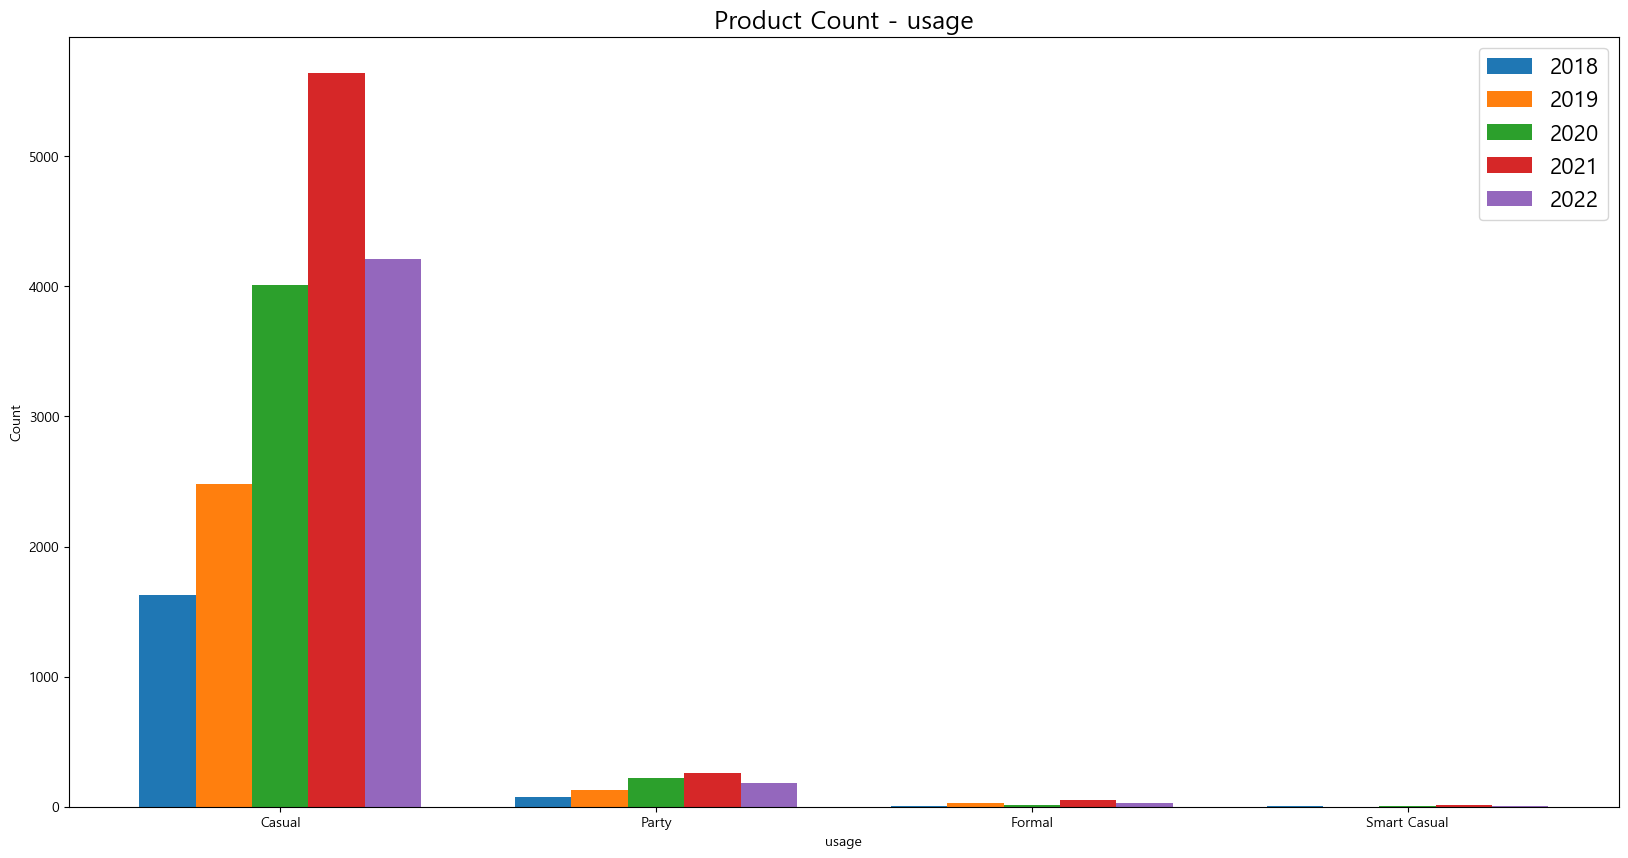

In [114]:
import matplotlib.pyplot as plt

# 드레스 구매추이
plt.rcParams['font.family'] = 'Malgun Gothic'

dress = product_count[product_count['subCategory']=='Dress']

y1 = dress.groupby('usage')['2018'].sum().sort_values(ascending=False)
y2 = dress.groupby('usage')['2019'].sum().sort_values(ascending=False)
y3 = dress.groupby('usage')['2020'].sum().sort_values(ascending=False)
y4 = dress.groupby('usage')['2021'].sum().sort_values(ascending=False)
y5 = dress.groupby('usage')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
width = 0.15

x1 = range(len(y1))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
x5 = [x + width for x in x4]

plt.bar(x1, y1.values, width=width, label='2018')
plt.bar(x2, y2.values, width=width, label='2019')
plt.bar(x3, y3.values, width=width, label='2020')
plt.bar(x4, y4.values, width=width, label='2021')
plt.bar(x5, y5.values, width=width, label='2022')

plt.title('Product Count - usage', fontsize=18)
plt.xlabel('usage')
plt.ylabel('Count')
plt.xticks([x + 2 * width for x in x1], y1.index)

plt.legend(fontsize=16)
plt.show()
